# Springboard Capstone 02 - Energy price prediction based on weather
## EDA

In [1]:
#Import libraries
import pandas as pd
import seaborn as sns
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
from datetime import datetime
from dateutil import tz
from pytz import timezone
import missingno as msno
import matplotlib
from pandas import Grouper
from pandas import concat
from pandas import DataFrame
from windrose import WindroseAxes
import matplotlib.ticker as mtick

# 1.0 Import data

The relevant data are: energy_data.csv, weather_data.csv, eng_grouped_max.csv, wea_grouped_max.csv and energy_weather.csv

## 1.1 Importing base energy data

In [2]:
#Import data, convert to datetime in Madrid and set date as index
energy_data = pd.read_csv("data/energy_data.csv")
energy_data['time'] = pd.to_datetime(energy_data['time'], utc=True)
#Convert to Madrid timezone
energy_data.time = energy_data.time.dt.tz_convert('Europe/Madrid')

energy_data.set_index('time', inplace=True)
energy_data.head()

generation biomass  \
time                                            
2015-01-01 00:00:00+01:00               447.0   
2015-01-01 01:00:00+01:00               449.0   
2015-01-01 02:00:00+01:00               448.0   
2015-01-01 03:00:00+01:00               438.0   
2015-01-01 04:00:00+01:00               428.0   

                           generation fossil brown coal/lignite  \
time                                                              
2015-01-01 00:00:00+01:00                                 329.0   
2015-01-01 01:00:00+01:00                                 328.0   
2015-01-01 02:00:00+01:00                                 323.0   
2015-01-01 03:00:00+01:00                                 254.0   
2015-01-01 04:00:00+01:00                                 187.0   

                           generation fossil gas  generation fossil hard coal  \
time                                                                            
2015-01-01 00:00:00+01:00                 4844.0                       4821.0   
2015-01-01 01:00:00+01:00                 5196.0                       4755.0   
2015-01-01 02:00:00+01:00                 4857.0                       4581.0   
2015-01-01 03:00:00+01:00                 4314.0                       4131.0   
2015-01-01 04:00:00+01:00                 4130.0                       3840.0   

                           generation fossil oil  \
time                                               
2015-01-01 00:00:00+01:00                  162.0   
2015-01-01 01:00:00+01:00                  158.0   
2015-01-01 02:00:00+01:00                  157.0   
2015-01-01 03:00:00+01:00                  160.0   
2015-01-01 04:00:00+01:00                  156.0   

                           generation hydro pumped storage consumption  \
time                                                                     
2015-01-01 00:00:00+01:00                                        863.0   
2015-01-01 01:00:00+01:00                                        920.0   
2015-01-01 02:00:00+01:00                                       1164.0   
2015-01-01 03:00:00+01:00                                       1503.0   
2015-01-01 04:00:00+01:00                                       1826.0   

                           generation hydro run-of-river and poundage  \
time                                                                    
2015-01-01 00:00:00+01:00                                      1051.0   
2015-01-01 01:00:00+01:00                                      1009.0   
2015-01-01 02:00:00+01:00                                       973.0   
2015-01-01 03:00:00+01:00                                       949.0   
2015-01-01 04:00:00+01:00                                       953.0   

                           generation hydro water reservoir  \
time                                                          
2015-01-01 00:00:00+01:00                            1899.0   
2015-01-01 01:00:00+01:00                            1658.0   
2015-01-01 02:00:00+01:00                            1371.0   
2015-01-01 03:00:00+01:00                             779.0   
2015-01-01 04:00:00+01:00                             720.0   

                           generation nuclear  generation other  ...  \
time                                                             ...   
2015-01-01 00:00:00+01:00              7096.0              43.0  ...   
2015-01-01 01:00:00+01:00              7096.0              43.0  ...   
2015-01-01 02:00:00+01:00              7099.0              43.0  ...   
2015-01-01 03:00:00+01:00              7098.0              43.0  ...   
2015-01-01 04:00:00+01:00              7097.0              43.0  ...   

                           generation waste  generation wind onshore  \
time                                                                   
2015-01-01 00:00:00+01:00             196.0                   6378.0   
2015-01-01 01:00:00+01:00             195.0                   5890.0   
2015-01-01 02:

In [3]:
#energy_data.drop(columns='generation marine', inplace=True)
energy_data.columns

Index(['generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil gas', 'generation fossil hard coal',
       'generation fossil oil', 'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation nuclear',
       'generation other', 'generation other renewable', 'generation solar',
       'generation waste', 'generation wind onshore',
       'forecast solar day ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual', 'gen_total', 'diff_gen_load'],
      dtype='object')

In [4]:
energy_data.describe()

generation biomass  generation fossil brown coal/lignite  \
count        35045.000000                          35046.000000   
mean           383.513540                            448.059208   
std             85.353943                            354.568590   
min              0.000000                              0.000000   
25%            333.000000                              0.000000   
50%            367.000000                            509.000000   
75%            433.000000                            757.000000   
max            592.000000                            999.000000   

       generation fossil gas  generation fossil hard coal  \
count           35046.000000                 35046.000000   
mean             5622.737488                  4256.065742   
std              2201.830478                  1961.601013   
min                 0.000000                     0.000000   
25%              4126.000000                  2527.000000   
50%              4969.000000                  4474.000000   
75%              6429.000000                  5838.750000   
max             20034.000000                  8359.000000   

       generation fossil oil  generation hydro pumped storage consumption  \
count           35045.000000                                 35045.000000   
mean              298.319789                                   475.577343   
std                52.520673                                   792.406614   
min                 0.000000                                     0.000000   
25%               263.000000                                     0.000000   
50%               300.000000                                    68.000000   
75%               330.000000                                   616.000000   
max               449.000000                                  4523.000000   

       generation hydro run-of-river and poundage  \
count                                35045.000000   
mean                                   972.116108   
std                                    400.777536   
min                                      0.000000   
25%                                    637.000000   
50%                                    906.000000   
75%                                   1250.000000   
max                                   2000.000000   

       generation hydro water reservoir  generation nuclear  generation other  \
count                      35046.000000        35047.000000      35046.000000   
mean                        2605.114735         6263.907039         60.228585   
std                         1835.199745          839.667958         20.238381   
min                            0.000000            0.000000          0.000000   
25%                         1077.250000         5760.000000         53.000000   
50%                         2164.000000         6566.000000         57.000000   
75%                         3757.000000         7025.000000         80.000000   
max                         9728.000000         7117.000000        106.000000   

       ...  generation waste  generation wind onshore  \
count  ...      35045.000000             35046.000000   
mean   ...        269.452133              5464.479769   
std    ...         50.195536              3213.691587   
min    ...          0.000000                 0.000000   
25%    ...        240.000000              2933.000000   
50%    ...        279.000000              4849.000000   
75%    ...        310.000000              7398.000000   
max    ...        357.000000             17436.000000   

       forecast solar day ahead  forecast wind onshore day ahead  \
count              35064.000000                     35064.000000   
mean                1439.066735                      5471.216689   
std                 1677.703355                      3176.312853   
min                    0.000000                       237.000000   
25%                   69.000000                      2979.000000   
50%                  576.0000

## 1.2 Importing base weather data

In [5]:
#Import data, convert to datetime in Madrid and set date as index
weather_data = pd.read_csv("data/weather_data.csv")
weather_data['dt_iso'] = pd.to_datetime(weather_data['dt_iso'], utc=True)
#Convert to Madrid timezone
weather_data.dt_iso = weather_data.dt_iso.dt.tz_convert('Europe/Madrid')
weather_data.set_index('dt_iso', inplace=True)
weather_data.head()

city_name   temp  pressure  humidity  wind_speed  \
dt_iso                                                                       
2015-01-01 00:00:00+01:00  Valencia -2.675      1001        77           1   
2015-01-01 01:00:00+01:00  Valencia -2.675      1001        77           1   
2015-01-01 02:00:00+01:00  Valencia -3.464      1002        78           0   
2015-01-01 03:00:00+01:00  Valencia -3.464      1002        78           0   
2015-01-01 04:00:00+01:00  Valencia -3.464      1002        78           0   

                           wind_deg  rain_1h  rain_3h  snow_3h  clouds_all  
dt_iso                                                                      
2015-01-01 00:00:00+01:00        62      0.0      0.0      0.0           0  
2015-01-01 01:00:00+01:00        62      0.0      0.0      0.0           0  
2015-01-01 02:00:00+01:00        23      0.0      0.0      0.0           0  
2015-01-01 03:00:00+01:00        23      0.0      0.0      0.0           0  
2015-01-01 04:00:00+01:00        23      0.0      0.0      0.0           0

### 1.2.1 Converting temperature from Kelvin to Celcius

In [6]:
# #Convert temp columns to Celcius
# weather_data['temp'] = weather_data['temp']-273.15
# weather_data.head()

In [7]:
df = weather_data[weather_data['city_name'] == 'Barcelona']
df.head()

city_name   temp  pressure  humidity  wind_speed  \
dt_iso                                                                        
2015-01-01 00:00:00+01:00  Barcelona  8.475      1035       100           7   
2015-01-01 01:00:00+01:00  Barcelona  8.475      1035       100           7   
2015-01-01 02:00:00+01:00  Barcelona  8.136      1036       100           7   
2015-01-01 03:00:00+01:00  Barcelona  8.136      1036       100           7   
2015-01-01 04:00:00+01:00  Barcelona  8.136      1036       100           7   

                           wind_deg  rain_1h  rain_3h  snow_3h  clouds_all  
dt_iso                                                                      
2015-01-01 00:00:00+01:00        58      0.0      0.0      0.0           0  
2015-01-01 01:00:00+01:00        58      0.0      0.0      0.0           0  
2015-01-01 02:00:00+01:00        48      0.0      0.0      0.0           0  
2015-01-01 03:00:00+01:00        48      0.0      0.0      0.0           0  
2015-01-01 04:00:00+01:00        48      0.0      0.0      0.0           0

## 1.3 Importing summarized energy data

In [8]:
#Import data, convert to datetime in Madrid and set date as index
eng_grouped_max = pd.read_csv("data/eng_grouped_max.csv")
eng_grouped_max['date'] = pd.to_datetime(eng_grouped_max['date'], utc=True)
# #Convert to Madrid timezone
eng_grouped_max['date'] =eng_grouped_max['date'].dt.tz_convert('Europe/Madrid')
eng_grouped_max.set_index('date', inplace=True)
eng_grouped_max.head()

generation biomass_daily_max  \
date                                                      
2015-01-01 01:00:00+01:00                         449.0   
2015-01-02 01:00:00+01:00                         443.0   
2015-01-03 01:00:00+01:00                         478.0   
2015-01-04 01:00:00+01:00                         438.0   
2015-01-05 01:00:00+01:00                         376.0   

                           generation fossil brown coal/lignite_daily_max  \
date                                                                        
2015-01-01 01:00:00+01:00                                           329.0   
2015-01-02 01:00:00+01:00                                             0.0   
2015-01-03 01:00:00+01:00                                             0.0   
2015-01-04 01:00:00+01:00                                             0.0   
2015-01-05 01:00:00+01:00                                           326.0   

                           generation fossil gas_daily_max  \
date                                                         
2015-01-01 01:00:00+01:00                           5196.0   
2015-01-02 01:00:00+01:00                           6082.0   
2015-01-03 01:00:00+01:00                           4157.0   
2015-01-04 01:00:00+01:00                           3997.0   
2015-01-05 01:00:00+01:00                           5699.0   

                           generation fossil hard coal_daily_max  \
date                                                               
2015-01-01 01:00:00+01:00                                 5043.0   
2015-01-02 01:00:00+01:00                                 1432.0   
2015-01-03 01:00:00+01:00                                 1798.0   
2015-01-04 01:00:00+01:00                                 2755.0   
2015-01-05 01:00:00+01:00                                 4247.0   

                           generation fossil oil_daily_max  \
date                                                         
2015-01-01 01:00:00+01:00                            167.0   
2015-01-02 01:00:00+01:00                            220.0   
2015-01-03 01:00:00+01:00                            250.0   
2015-01-04 01:00:00+01:00                            394.0   
2015-01-05 01:00:00+01:00                            352.0   

                           generation hydro pumped storage consumption_daily_max  \
date                                                                               
2015-01-01 01:00:00+01:00                                             2170.0       
2015-01-02 01:00:00+01:00                                             3269.0       
2015-01-03 01:00:00+01:00                                             2953.0       
2015-01-04 01:00:00+01:00                                             2185.0       
2015-01-05 01:00:00+01:00                                             2365.0       

                           generation hydro run-of-river and poundage_daily_max  \
date                                                                              
2015-01-01 01:00:00+01:00                                             1220.0      
2015-01-02 01:00:00+01:00                                             1370.0      
2015-01-03 01:00:00+01:00                                             1583.0      
2015-01-04 01:00:00+01:00                                             1616.0      
2015-01-05 01:00:00+01:00                                             1328.0      

                           generation hydro water reservoir_daily_max  \
date                                                                    
2015-01-01 01:00:00+01:00                                      6231.0   
2015-01-02 01:00:00+01:00                                      5902.0   
2015-01-03 01:00:00+01:00                                      5985.0   
2015-01-04 01:00:00+01:00                                      5936.0   
2015-01-05 01:00:00+01:00                                      3732.0   

                           generation nucle

In [9]:
#eng_grouped_max.drop(columns='generation marine_daily_max', inplace=True)

## 1.4 Importing summarized weather data

In [10]:
#Import data, convert to datetime in Madrid and set date as index
wea_grouped_max = pd.read_csv("data/wea_grouped_max.csv")
wea_grouped_max.rename(columns={'Unnamed: 0': 'date', 'Unnamed: 1': 'city_name'}, inplace=True)
wea_grouped_max.drop(0, axis=0, inplace=True)
wea_grouped_max['date'] = pd.to_datetime(wea_grouped_max['date'], utc=True)
# #Convert to Madrid timezone
wea_grouped_max['date'] =wea_grouped_max['date'].dt.tz_convert('Europe/Madrid')
wea_grouped_max.set_index('date', inplace=True)
wea_grouped_max.head()

city_name  temp_daily_max  pressure_daily_max  \
date                                                                       
2015-01-01 01:00:00+01:00  Barcelona       11.452313              1038.0   
2015-01-01 01:00:00+01:00     Bilbao       11.441688              1036.0   
2015-01-01 01:00:00+01:00     Madrid       10.158313              1036.0   
2015-01-01 01:00:00+01:00    Seville       13.844000              1043.0   
2015-01-01 01:00:00+01:00   Valencia       12.127344              1035.0   

                           humidity_daily_max  wind_speed_daily_max  \
date                                                                  
2015-01-01 01:00:00+01:00               100.0                   7.0   
2015-01-01 01:00:00+01:00                97.0                   1.0   
2015-01-01 01:00:00+01:00                75.0                   1.0   
2015-01-01 01:00:00+01:00                84.0                   4.0   
2015-01-01 01:00:00+01:00                84.0                   2.0   

                           rain_1h_daily_max  rain_3h_daily_max  \
date                                                              
2015-01-01 01:00:00+01:00                0.0                0.0   
2015-01-01 01:00:00+01:00                0.0                0.0   
2015-01-01 01:00:00+01:00                0.0                0.0   
2015-01-01 01:00:00+01:00                0.0                0.0   
2015-01-01 01:00:00+01:00                0.0                0.0   

                           snow_3h_daily_max  clouds_all_daily_max  
date                                                                
2015-01-01 01:00:00+01:00                0.0                   0.0  
2015-01-01 01:00:00+01:00                0.0                  24.0  
2015-01-01 01:00:00+01:00                0.0                   0.0  
2015-01-01 01:00:00+01:00                0.0                   0.0  
2015-01-01 01:00:00+01:00                0.0                   0.0

In [11]:
# #Convert temp columns to Celcius
# wea_grouped_max['temp_daily_max'] = wea_grouped_max['temp_daily_max']-273.15
# wea_grouped_max.head()

# Need to find out how to drop the time from the date

## 1.5 Importing merged (energy and weather) data

In [12]:
#Import data, convert to datetime in Madrid and set date as index
energy_weather = pd.read_csv("data/energy_weather.csv")
energy_weather.drop(columns='Unnamed: 0', inplace=True)
energy_weather['date'] = pd.to_datetime(energy_weather['date'], utc=True)
# # #Convert to Madrid timezone
energy_weather['date'] = energy_weather['date'].dt.tz_convert('Europe/Madrid')
energy_weather.set_index('date', inplace=True)
energy_weather.head()

city_name  temp_daily_max  pressure_daily_max  \
date                                                                       
2015-01-01 01:00:00+01:00  Barcelona       11.452313              1038.0   
2015-01-01 01:00:00+01:00     Bilbao       11.441688              1036.0   
2015-01-01 01:00:00+01:00     Madrid       10.158313              1036.0   
2015-01-01 01:00:00+01:00    Seville       13.844000              1043.0   
2015-01-01 01:00:00+01:00   Valencia       12.127344              1035.0   

                           humidity_daily_max  wind_speed_daily_max  \
date                                                                  
2015-01-01 01:00:00+01:00               100.0                   7.0   
2015-01-01 01:00:00+01:00                97.0                   1.0   
2015-01-01 01:00:00+01:00                75.0                   1.0   
2015-01-01 01:00:00+01:00                84.0                   4.0   
2015-01-01 01:00:00+01:00                84.0                   2.0   

                           rain_1h_daily_max  rain_3h_daily_max  \
date                                                              
2015-01-01 01:00:00+01:00                0.0                0.0   
2015-01-01 01:00:00+01:00                0.0                0.0   
2015-01-01 01:00:00+01:00                0.0                0.0   
2015-01-01 01:00:00+01:00                0.0                0.0   
2015-01-01 01:00:00+01:00                0.0                0.0   

                           snow_3h_daily_max  clouds_all_daily_max  \
date                                                                 
2015-01-01 01:00:00+01:00                0.0                   0.0   
2015-01-01 01:00:00+01:00                0.0                  24.0   
2015-01-01 01:00:00+01:00                0.0                   0.0   
2015-01-01 01:00:00+01:00                0.0                   0.0   
2015-01-01 01:00:00+01:00                0.0                   0.0   

                           generation biomass_daily_max  ...  \
date                                                     ...   
2015-01-01 01:00:00+01:00                         449.0  ...   
2015-01-01 01:00:00+01:00                         449.0  ...   
2015-01-01 01:00:00+01:00                         449.0  ...   
2015-01-01 01:00:00+01:00                         449.0  ...   
2015-01-01 01:00:00+01:00                         449.0  ...   

                           generation wind onshore_daily_max  \
date                                                           
2015-01-01 01:00:00+01:00                             6378.0   
2015-01-01 01:00:00+01:00                             6378.0   
2015-01-01 01:00:00+01:00                             6378.0   
2015-01-01 01:00:00+01:00                             6378.0   
2015-01-01 01:00:00+01:00                             6378.0   

                           forecast solar day ahead_daily_max  \
date                                                            
2015-01-01 01:00:00+01:00                              3842.0   
2015-01-01 01:00:00+01:00                              3842.0   
2015-01-01 01:00:00+01:00                              3842.0   
2015-01-01 01:00:00+01:00                              3842.0   
2015-01-01 01:00:00+01:00                              3842.0   

                           forecast wind onshore day ahead_daily_max  \
date                                                                   
2015-01-01 01:00:00+01:00                                     6436.0   
2015-01-01 01:00:00+01:00                                     6436.0   
2015-01-01 01:00:00+01:00                                     6436.0   
2015-01-01 01:00:00+01:00                                     6436.0   
2015-01-01 01:00:00+01:00                                     6436.0   

                           total load forecast_daily_max  \
date                                                       
2015-01-01 01:00:00+01:00                        30739.0

In [13]:
# #Convert temp columns to Celcius
# energy_weather['temp_daily_max'] = energy_weather['temp_daily_max']-273.15
# energy_weather.head()

In [14]:
#energy_weather.drop(columns='generation marine_daily_max', inplace=True)

# 2.0 Visualizing basic weather data

1. What are the trends in energy data over the 4 years?
2. What are the trends in weather data over the 4 years?
3. <b>Is there a correlation between any of the weather data and any of the generation data or price data?</b>
4. What is the difference in generation based on month/season?
5. What is the correlation between demand and month or day of week?
6. Does one city have more influence over things than another? <b>Graph xx?xx with city as the hue</b>
7. <b>Graph - solar & solar day ahead, wind and wind day ahead, load forcast and load actual, price day ahead and price actual</b>
8. Maybe - break out each city into its own df - plot the 4 years with mean to compare the city to itself.
9. Maybe calculate mean temperatures per month and graph those?
10. Maybe use that DC "Viusalizing patterns over time" plot? https://campus.datacamp.com/courses/exploratory-data-analysis-in-python/relationships-in-data?ex=1
11. Or box plots for each feature? Although it might be weird given seasonability.
12. How to graph changes year to year?
13. How do the temperatures in each city relate to the other cities?
14. Any significant items/outliers in terms of MW for energy and values for  weather?
15. Is it possible to determine what the target variable is and the independent variables?
16. What is the hypothesis?
17. Ultimately want to find relationships between weather and generation. 

## 2.1 Subsetting weather data on Barcelona, 2015

In [15]:
#subset data for testing out plotting
barca = weather_data[weather_data['city_name'] == "Barcelona"]
wd_mini = barca.loc['2015-01-01': '2015-12-31']
wd_mini.head()

city_name   temp  pressure  humidity  wind_speed  \
dt_iso                                                                        
2015-01-01 00:00:00+01:00  Barcelona  8.475      1035       100           7   
2015-01-01 01:00:00+01:00  Barcelona  8.475      1035       100           7   
2015-01-01 02:00:00+01:00  Barcelona  8.136      1036       100           7   
2015-01-01 03:00:00+01:00  Barcelona  8.136      1036       100           7   
2015-01-01 04:00:00+01:00  Barcelona  8.136      1036       100           7   

                           wind_deg  rain_1h  rain_3h  snow_3h  clouds_all  
dt_iso                                                                      
2015-01-01 00:00:00+01:00        58      0.0      0.0      0.0           0  
2015-01-01 01:00:00+01:00        58      0.0      0.0      0.0           0  
2015-01-01 02:00:00+01:00        48      0.0      0.0      0.0           0  
2015-01-01 03:00:00+01:00        48      0.0      0.0      0.0           0  
2015-01-01 04:00:00+01:00        48      0.0      0.0      0.0           0

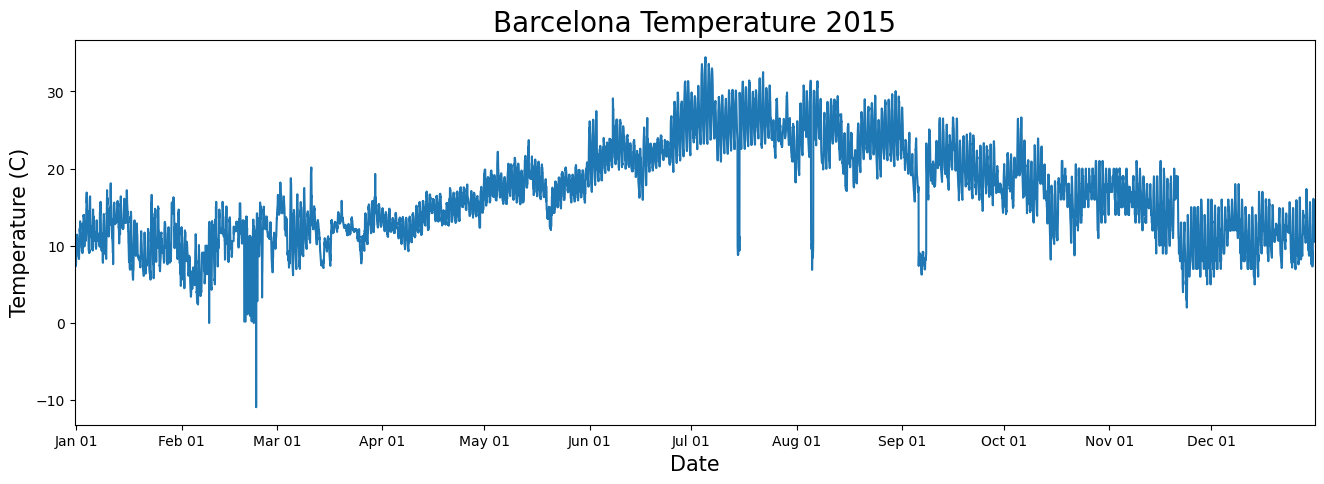

In [16]:
fig, ax = plt.subplots(figsize=(16, 5))
plt.plot(wd_mini.index, wd_mini['temp'])
plt.title('Barcelona Temperature 2015', fontsize=20)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Temperature (C)', fontsize=15)
plt.xlim(wd_mini.index.min(), wd_mini.index.max())

# Defining and displaying time axis ticks
ticks = ['2015-01-01 12:00:00+00:00', '2015-02-01 12:00:00+00:00', '2015-03-01 12:00:00+00:00',
        '2015-04-01 12:00:00+00:00', '2015-05-01 12:00:00+00:00', '2015-06-01 12:00:00+00:00',
        '2015-07-01 12:00:00+00:00', '2015-08-01 12:00:00+00:00', '2015-09-01 12:00:00+00:00',
        '2015-10-01 12:00:00+00:00', '2015-11-01 12:00:00+00:00', '2015-12-01 12:00:00+00:00']
plt.xticks(ticks)

#Formatting x-axis(dates)
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b %d'))
plt.savefig('images/barca_temp_2015.png')

(755, 12)


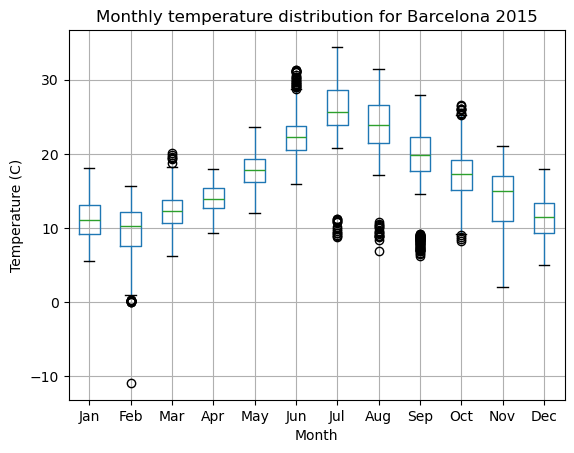

In [17]:
#box plots by month
#series = read_csv('daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
#one_year = series['1990']
#barcelona temperatures for the whole year: 24 hours x 365
barc_temp = wd_mini.temp
groups = barc_temp.groupby(Grouper(freq='ME'))
months = concat([DataFrame(x[1].values) for x in groups], axis=1)
months = DataFrame(months)
print(months.shape)
#months.columns = range(1,13)
months.columns = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
months.boxplot()
plt.title("Monthly temperature distribution for Barcelona 2015")
plt.xlabel("Month")
plt.ylabel("Temperature (C)")
plt.savefig('images/barca_monthlytempdist_2015.png')

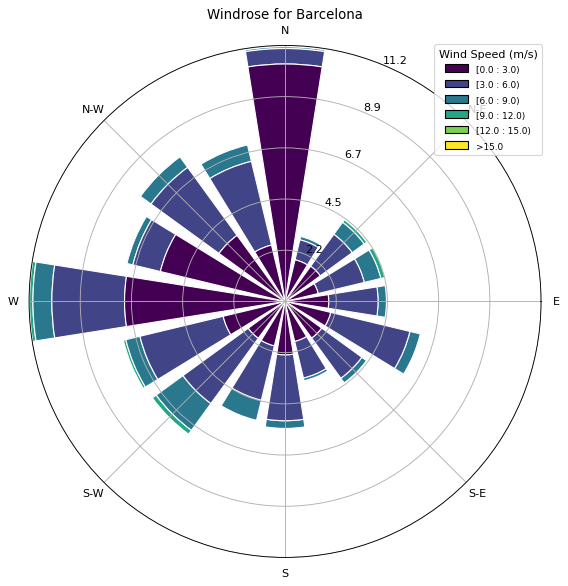

In [18]:
ax = WindroseAxes.from_ax()
ax.bar(barca.wind_deg, barca.wind_speed, normed=True, opening=0.8, edgecolor='white')

# Format radius axis to percentages
# fmt = '%.0f%%' 
# yticks = mtick.FormatStrFormatter(fmt)
# ax.yaxis.set_major_formatter(yticks)

ax.set_legend(title = 'Wind Speed (m/s)', loc='best')
plt.title("Windrose for Barcelona")
plt.savefig('images/barca_windrose.png')

## 2.2 Visualizing weather data for cities and years using hourly data

In [19]:
#Create df for each city
city_names = weather_data.city_name.unique()
city_dfs = []
for i in range(len(city_names)):
    df = weather_data[weather_data['city_name'] == city_names[i]]
    city_dfs.append(df)

In [20]:
years = ['2015', '2016', '2017', '2018']

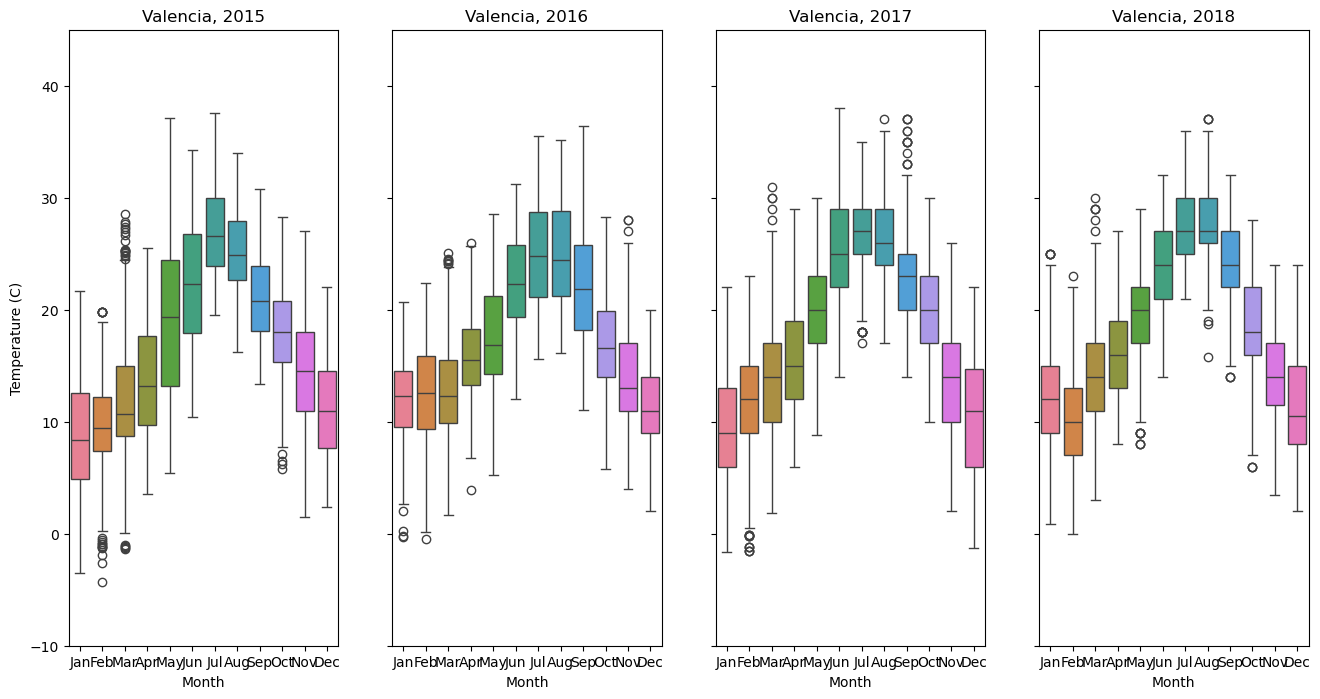

In [21]:
#For each city, plot temperature boxplots for each year

# Create figure and axes
fig, ax = plt.subplots(1, 4, sharey=True, figsize=(16, 8))

# Plot multiple boxplots
#ax.boxplot([data1, data2, data3], positions=[1, 2, 3], labels=['Data 1', 'Data 2', 'Data 3'])
#ax.boxplot([data1, data2, data3], positions=[1, 2, 3, 4], labels=[years])

months_list=[]
for i in range(len(years)):
    df_year = city_dfs[0].loc[years[i]]
    df_temp = df_year.temp
    groups = df_temp.groupby(Grouper(freq='ME'))
    months = concat([DataFrame(x[1].values) for x in groups], axis=1)
    months = DataFrame(months)
    months.columns = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    months_list.append(months)
    sns.boxplot(months, ax=ax[i])
    #ax[i].set_title(f"Monthly temperature distribution for {city_names[0]}, {years[i]}")
    ax[i].set_title(f"{city_names[0]}, {years[i]}")
    ax[i].set_ylim(-10, 45)
    ax[i].set_xlabel("Month")
    ax[i].set_ylabel("Temperature (C)")

plt.savefig('images/valencia_temp_2015-2018.png')

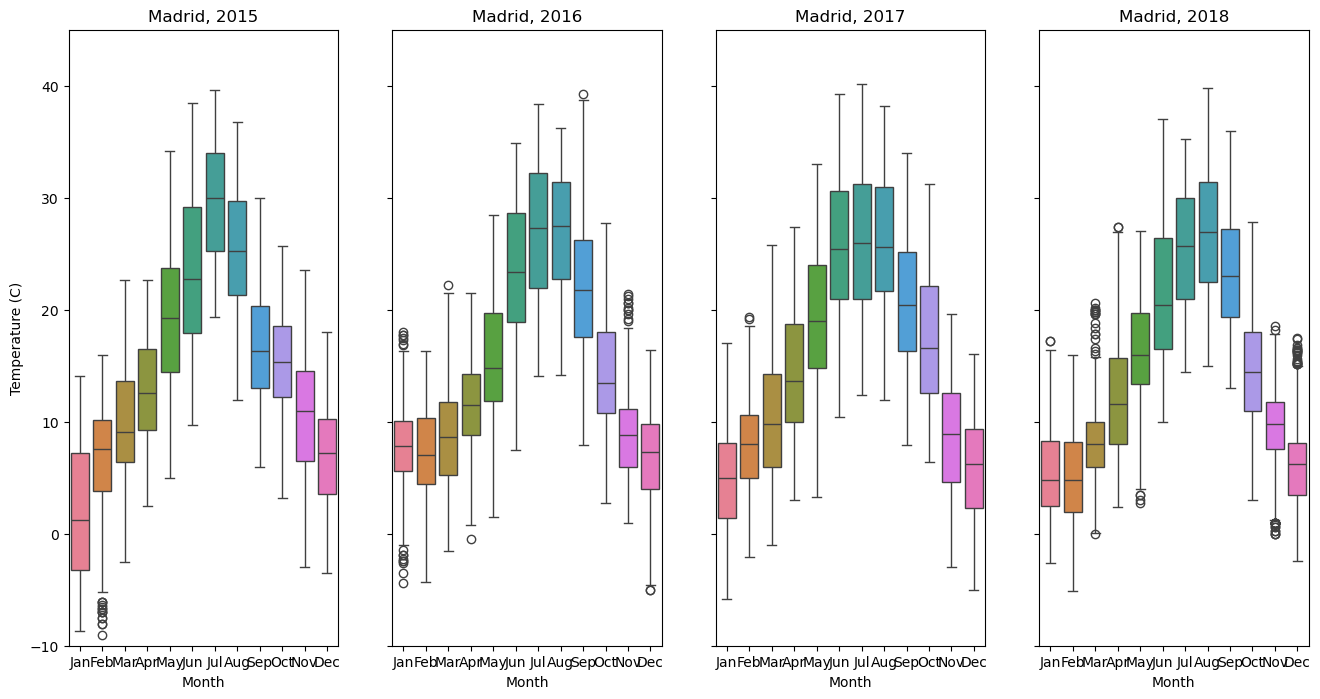

In [22]:
#For each city, plot temperature boxplots for each year

# Create figure and axes
fig, ax = plt.subplots(1, 4, sharey=True, figsize=(16, 8))

months_list=[]
for i in range(len(years)):
    df_year = city_dfs[1].loc[years[i]]
    df_temp = df_year.temp
    groups = df_temp.groupby(Grouper(freq='ME'))
    months = concat([DataFrame(x[1].values) for x in groups], axis=1)
    months = DataFrame(months)
    months.columns = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    months_list.append(months)
    sns.boxplot(months, ax=ax[i])
    ax[i].set_title(f"{city_names[1]}, {years[i]}")
    ax[i].set_ylim(-10, 45)
    ax[i].set_xlabel("Month")
    ax[i].set_ylabel("Temperature (C)")
    
plt.savefig('images/madrid_temp_2015-2018.png')

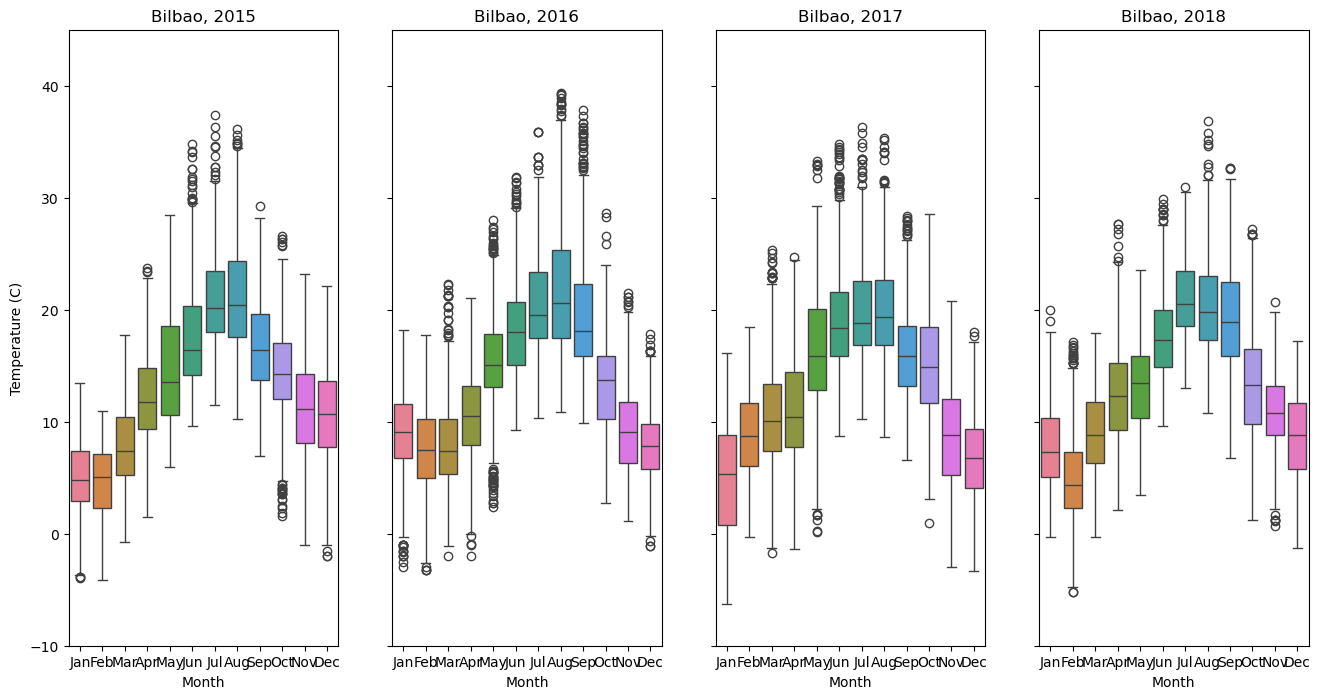

In [23]:
#For each city, plot temperature boxplots for each year

# Create figure and axes
fig, ax = plt.subplots(1, 4, sharey=True, figsize=(16, 8))

months_list=[]
for i in range(len(years)):
    df_year = city_dfs[2].loc[years[i]]
    df_temp = df_year.temp
    groups = df_temp.groupby(Grouper(freq='ME'))
    months = concat([DataFrame(x[1].values) for x in groups], axis=1)
    months = DataFrame(months)
    months.columns = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    months_list.append(months)
    sns.boxplot(months, ax=ax[i])
    ax[i].set_title(f"{city_names[2]}, {years[i]}")
    ax[i].set_ylim(-10, 45)
    ax[i].set_xlabel("Month")
    ax[i].set_ylabel("Temperature (C)")

plt.savefig('images/bilbao_temp_2015-2018.png')

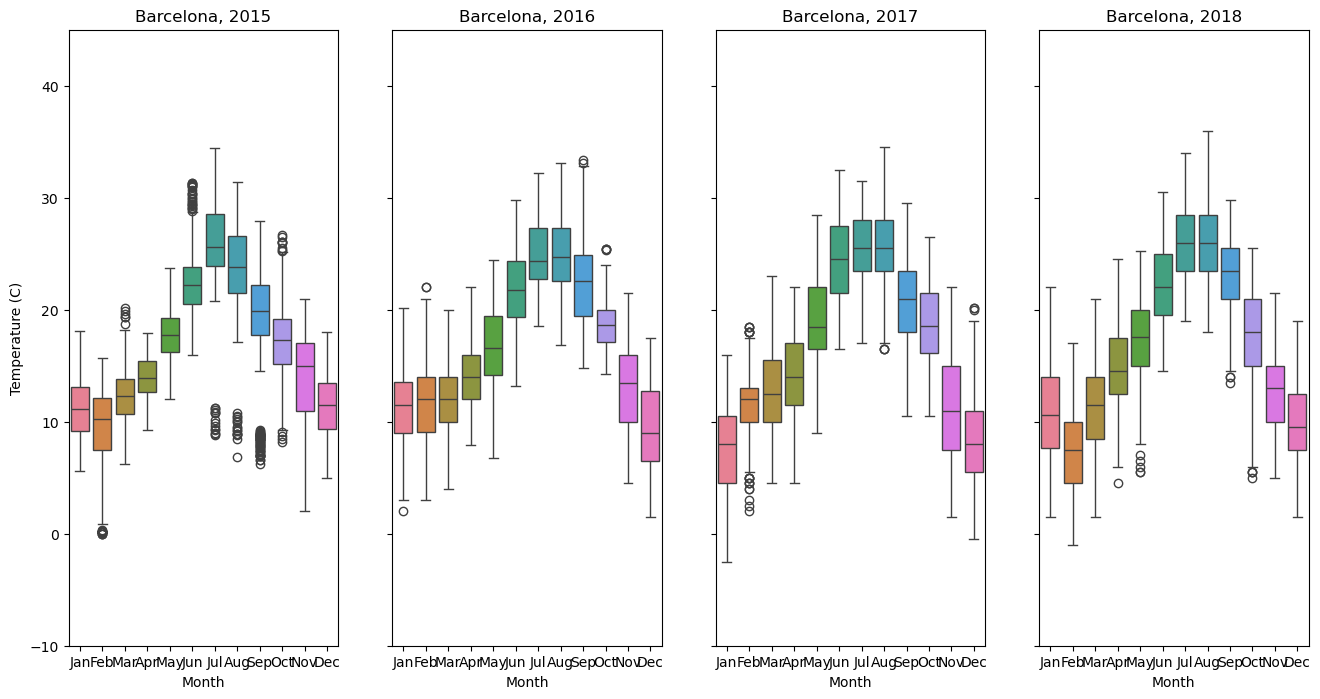

In [24]:
#For each city, plot temperature boxplots for each year

# Create figure and axes
fig, ax = plt.subplots(1, 4, sharey=True, figsize=(16, 8))

months_list=[]
for i in range(len(years)):
    df_year = city_dfs[3].loc[years[i]]
    df_temp = df_year.temp
    groups = df_temp.groupby(Grouper(freq='ME'))
    months = concat([DataFrame(x[1].values) for x in groups], axis=1)
    months = DataFrame(months)
    months.columns = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    months_list.append(months)
    sns.boxplot(months, ax=ax[i])
    ax[i].set_title(f"{city_names[3]}, {years[i]}")
    ax[i].set_ylim(-10, 45)
    ax[i].set_xlabel("Month")
    ax[i].set_ylabel("Temperature (C)")

plt.savefig('images/barcelona_temp_2015-2018.png')

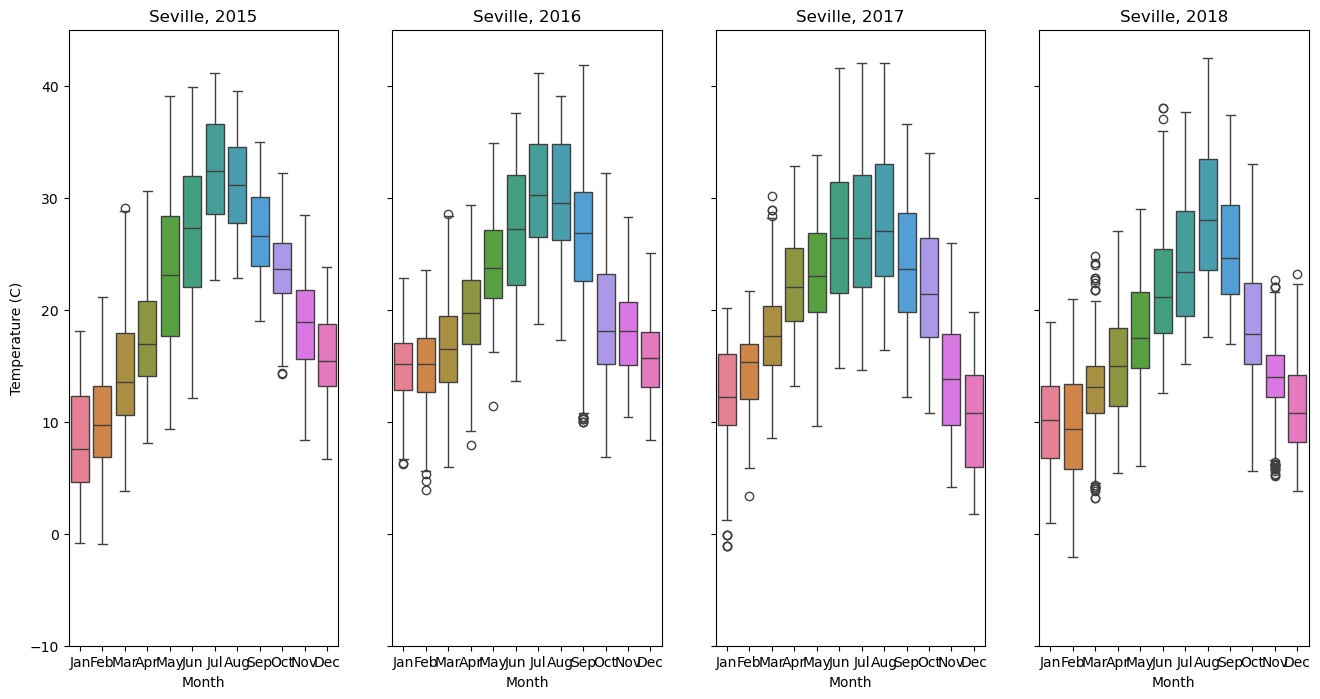

In [25]:
#For each city, plot temperature boxplots for each year

# Create figure and axes
fig, ax = plt.subplots(1, 4, sharey=True, figsize=(16, 8))

months_list=[]
for i in range(len(years)):
    df_year = city_dfs[4].loc[years[i]]
    df_temp = df_year.temp
    groups = df_temp.groupby(Grouper(freq='ME'))
    months = concat([DataFrame(x[1].values) for x in groups], axis=1)
    months = DataFrame(months)
    months.columns = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    months_list.append(months)
    sns.boxplot(months, ax=ax[i])
    ax[i].set_title(f"{city_names[4]}, {years[i]}")
    ax[i].set_ylim(-10, 45)
    ax[i].set_xlabel("Month")
    ax[i].set_ylabel("Temperature (C)")

plt.savefig('images/seville_temp_2015-2018.png')

## 2.3 Visualizing weather data using daily max data

In [26]:
#Create df for each city from max weather data
city_names_max = wea_grouped_max.city_name.unique()
city_max_dfs = []
for i in range(len(city_names_max)):
    df = wea_grouped_max[wea_grouped_max['city_name'] == city_names_max[i]]
    city_max_dfs.append(df)

In [27]:
#Create df for each city from weather data
city_names = weather_data.city_name.unique()
city_dfs = []
for i in range(len(city_names)):
    df = weather_data[weather_data['city_name'] == city_names[i]]
    city_dfs.append(df)

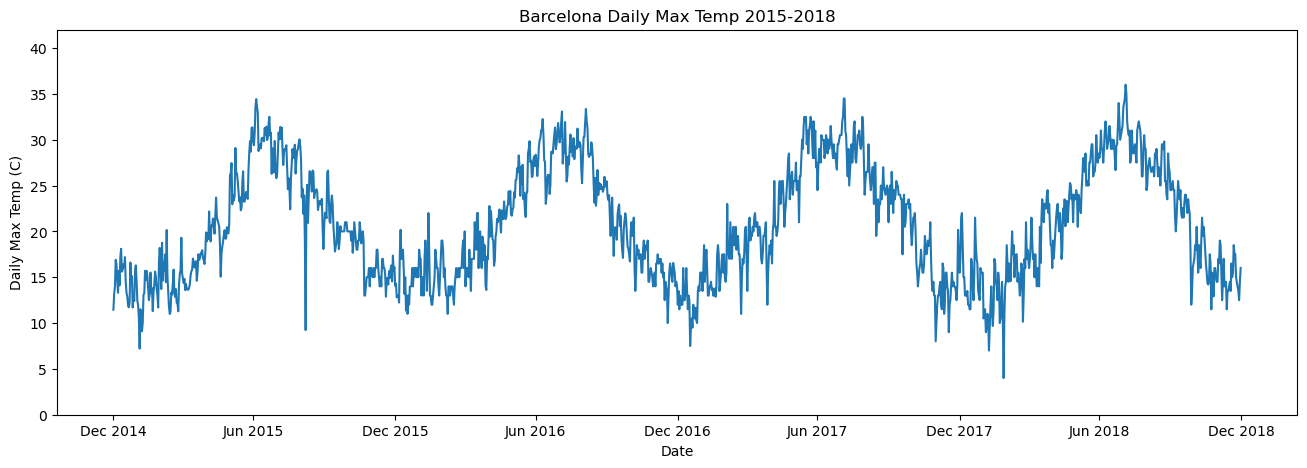

In [28]:
fig, ax = plt.subplots(figsize=(16, 5))
sns.lineplot(data=city_max_dfs[0], x='date', y='temp_daily_max')
plt.title(f'{city_names_max[0]} Daily Max Temp 2015-2018')
plt.xlabel('Date')
plt.ylim(0, 42)
plt.ylabel('Daily Max Temp (C)')

#Formatting x-axis(dates)
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b %Y'))

plt.savefig('images/barcelona_dailymaxtemp_2015-2018.png')

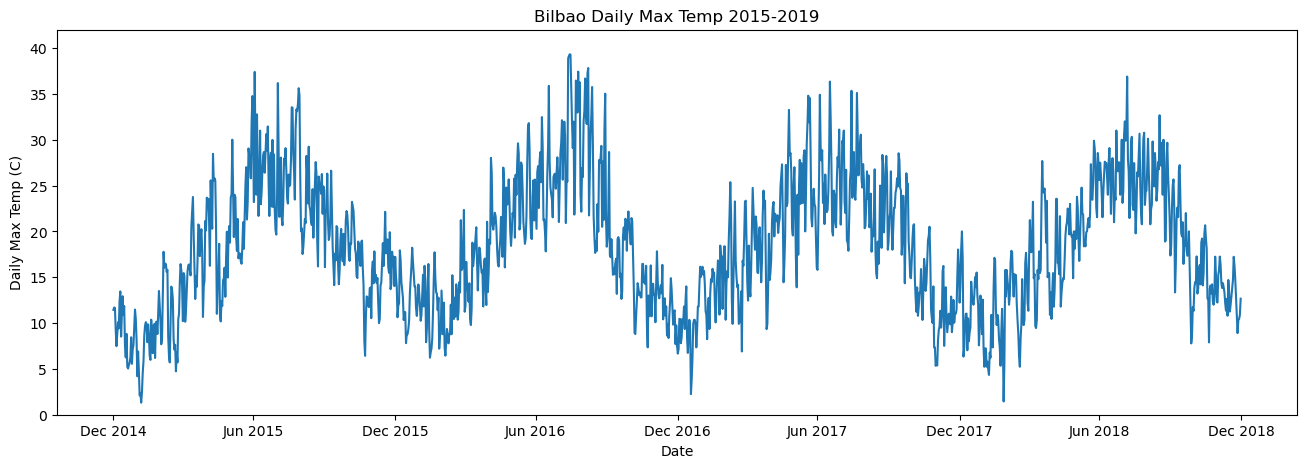

In [29]:
fig, ax = plt.subplots(figsize=(16, 5))
sns.lineplot(data=city_max_dfs[1], x='date', y='temp_daily_max')
plt.title(f'{city_names_max[1]} Daily Max Temp 2015-2019')
plt.xlabel('Date')
plt.ylim(0, 42)
plt.ylabel('Daily Max Temp (C)')
#Formatting x-axis(dates)
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b %Y'))
plt.savefig('images/bilbao_dailymaxtemp_2015-2018.png')

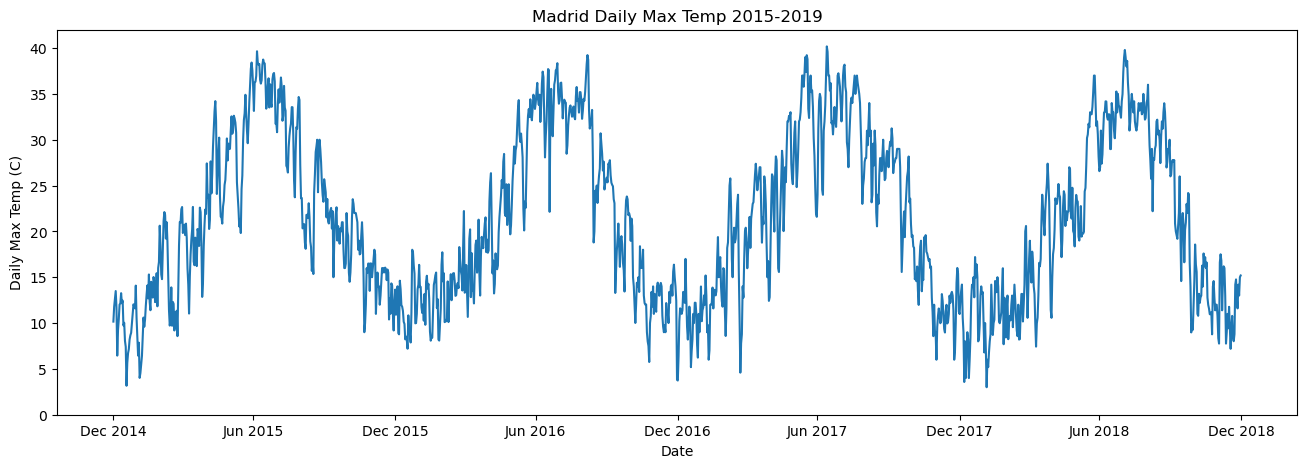

In [30]:
fig, ax = plt.subplots(figsize=(16, 5))
sns.lineplot(data=city_max_dfs[2], x='date', y='temp_daily_max')
plt.title(f'{city_names_max[2]} Daily Max Temp 2015-2019')
plt.xlabel('Date')
plt.ylim(0, 42)
plt.ylabel('Daily Max Temp (C)')
#Formatting x-axis(dates)
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b %Y'))

plt.savefig('images/madrid_dailymaxtemp_2015-2018.png')

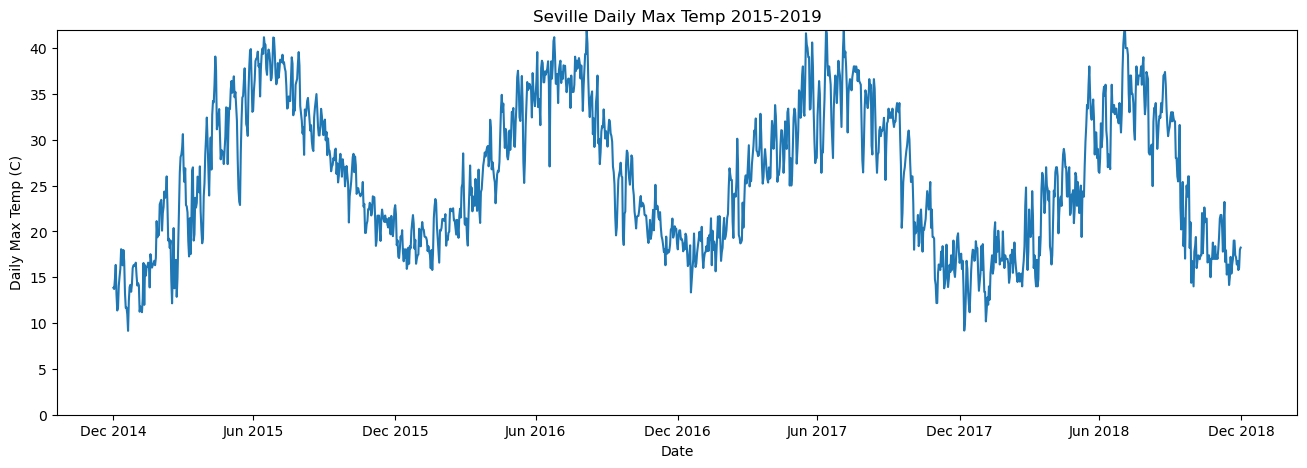

In [31]:
fig, ax = plt.subplots(figsize=(16, 5))
sns.lineplot(data=city_max_dfs[3], x='date', y='temp_daily_max')
plt.title(f'{city_names_max[3]} Daily Max Temp 2015-2019')
plt.xlabel('Date')
plt.ylim(0, 42)
plt.ylabel('Daily Max Temp (C)')
#Formatting x-axis(dates)
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b %Y'))

plt.savefig('images/seville_dailymaxtemp_2015-2018.png')

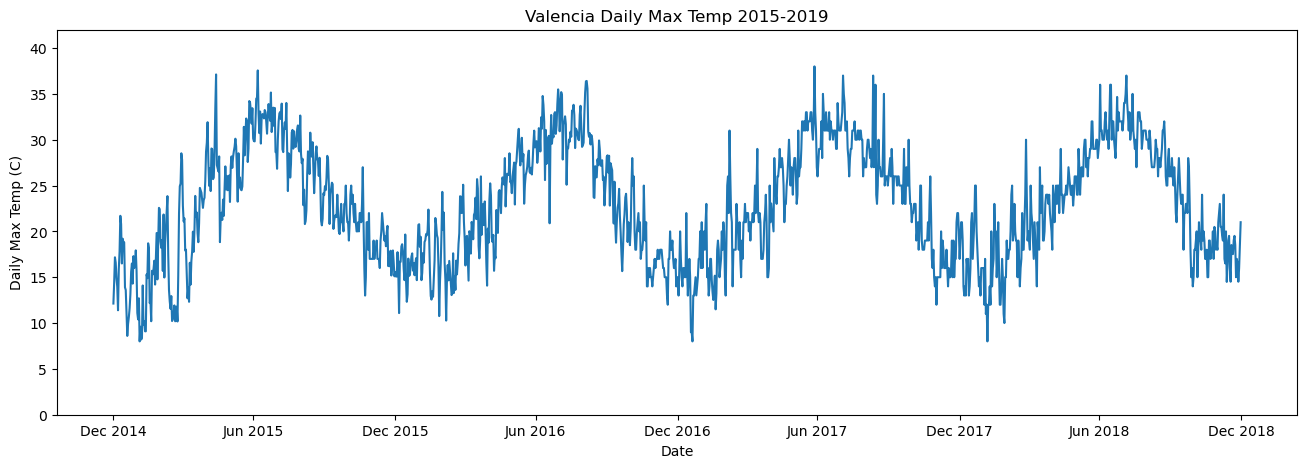

In [32]:
fig, ax = plt.subplots(figsize=(16, 5))
sns.lineplot(data=city_max_dfs[4], x='date', y='temp_daily_max')
plt.title(f'{city_names_max[4]} Daily Max Temp 2015-2019')
plt.xlabel('Date')
plt.ylim(0, 42)
plt.ylabel('Daily Max Temp (C)')
#Formatting x-axis(dates)
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b %Y'))

plt.savefig('images/valencia_dailymaxtemp_2015-2018.png')

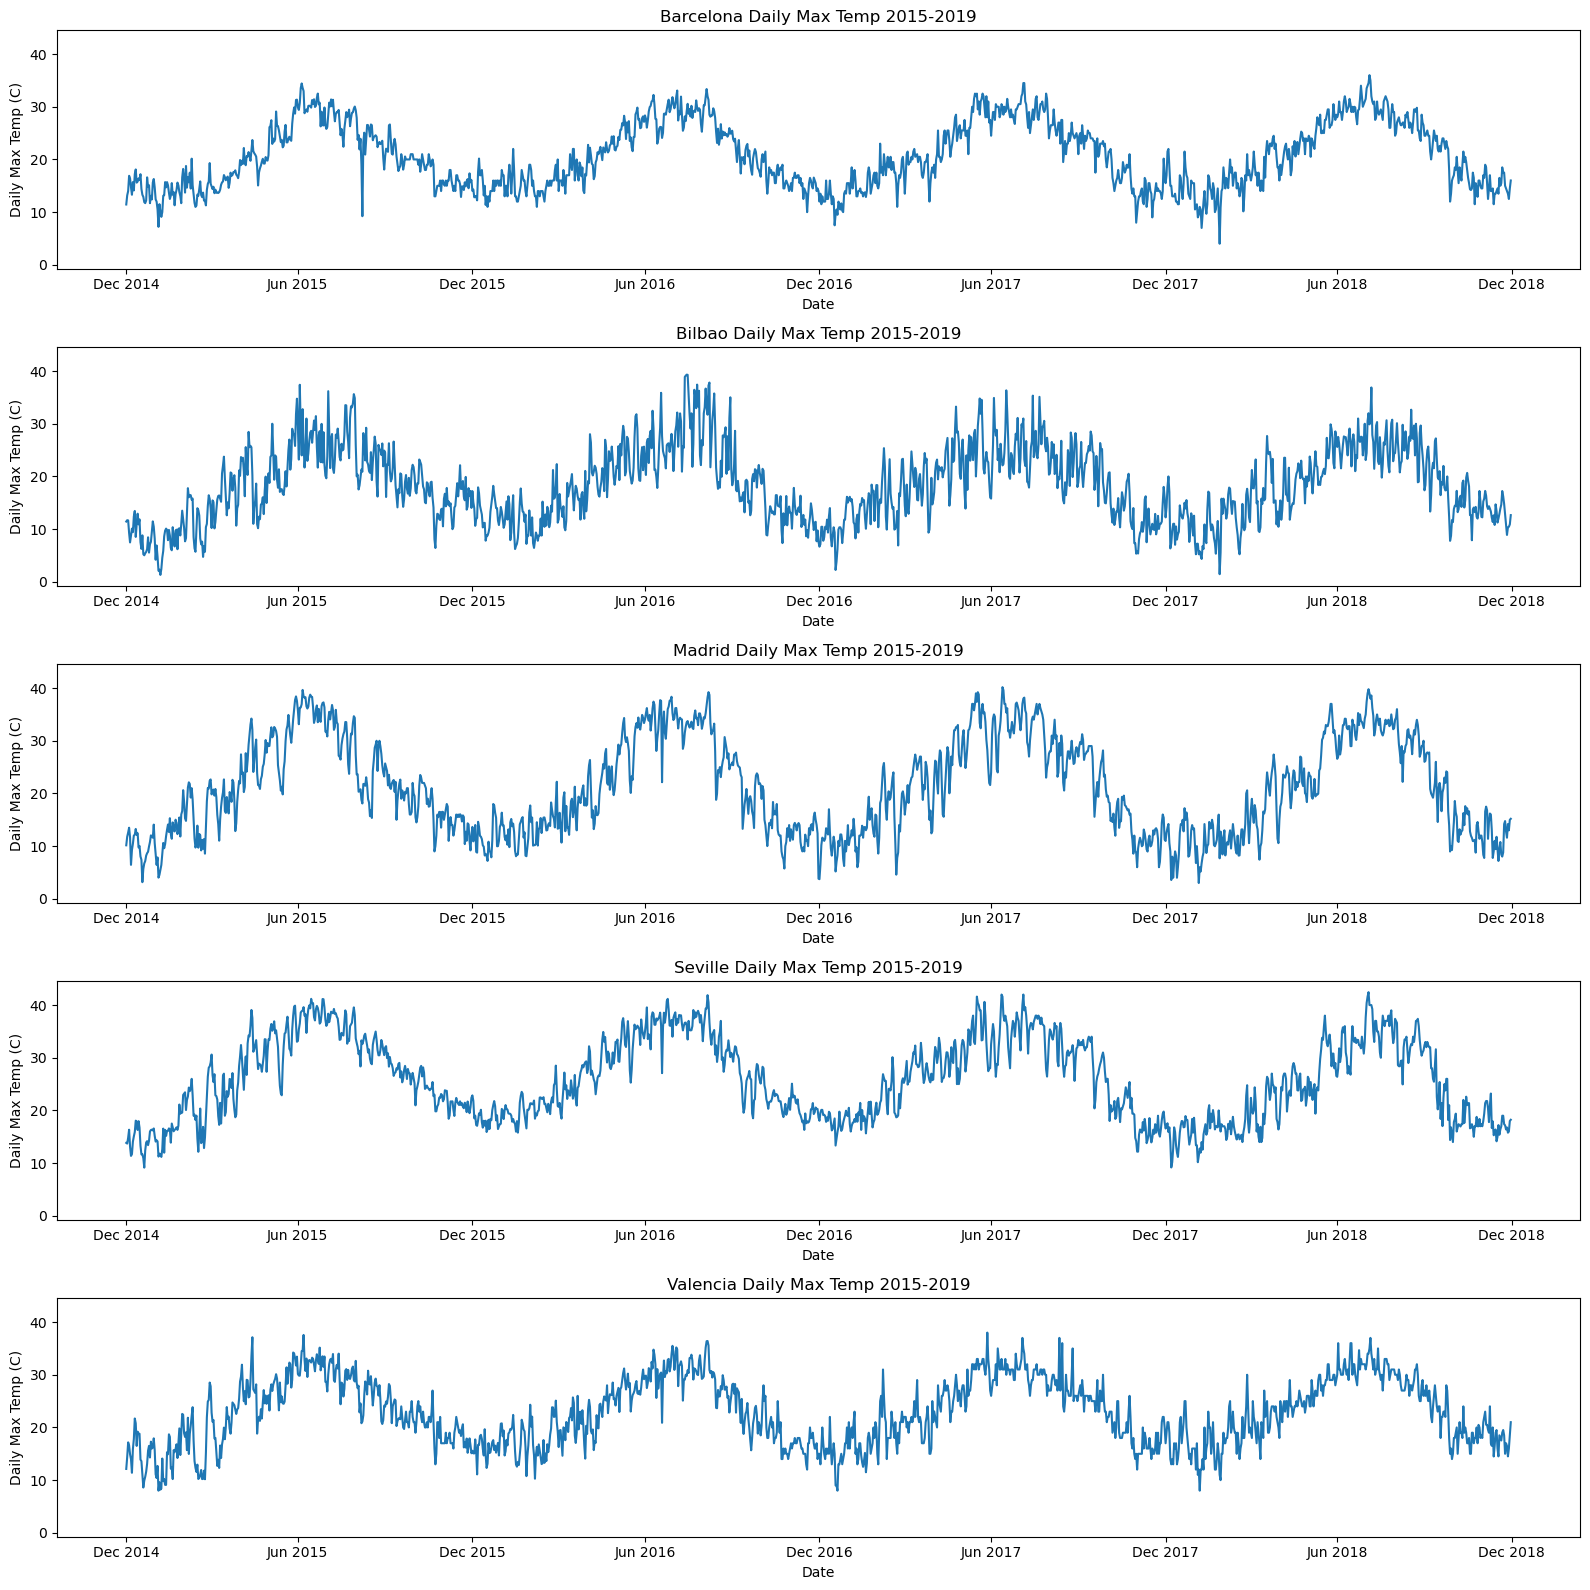

In [33]:
fig, ax = plt.subplots(5, 1, figsize=(16, 16), sharey=True)
for i in range(len(city_max_dfs)):
    sns.lineplot(data=city_max_dfs[i], x='date', y='temp_daily_max', ax=ax[i])
    ax[i].set_title(f'{city_names_max[i]} Daily Max Temp 2015-2019')
    ax[i].set_xlabel('Date')
    ax[i].set_ylabel('Daily Max Temp (C)')
    #Formatting x-axis(dates)
    ax[i].xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b %Y'))
    plt.tight_layout()

plt.savefig('images/allcities_dailymaxtemp_2015-2018.png')

## 2.4 Visualizing daily max data using melt

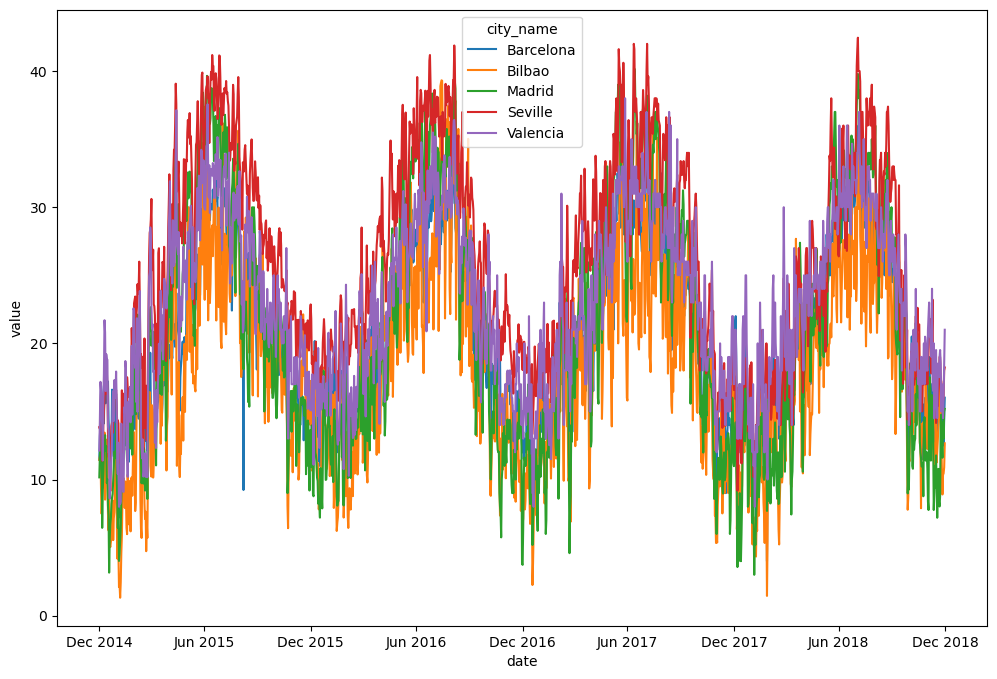

In [34]:
fig, ax = plt.subplots(figsize=(12, 8))
#try melt method for temperature
df_temp = wea_grouped_max[['city_name', 'temp_daily_max']]
df_temp.reset_index(inplace=True)
df_temp.head()
df_melt = pd.melt(df_temp, id_vars=['date', 'city_name'], value_vars=['temp_daily_max'])
df_melt.head()
sns.lineplot(df_melt, x='date', y='value', hue='city_name')
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b %Y'))

plt.savefig('images/dailymaxtemp_2015-2018_bycity.png')

## 2.5 Visualizing wind data

In [35]:
city_max_dfs[0]

city_name  temp_daily_max  pressure_daily_max  \
date                                                                       
2015-01-01 01:00:00+01:00  Barcelona       11.452313              1038.0   
2015-01-02 01:00:00+01:00  Barcelona       13.178688              1039.0   
2015-01-03 01:00:00+01:00  Barcelona       13.998000              1037.0   
2015-01-04 01:00:00+01:00  Barcelona       16.900000              1030.0   
2015-01-05 01:00:00+01:00  Barcelona       16.410000              1030.0   
...                              ...             ...                 ...   
2018-12-27 01:00:00+01:00  Barcelona       13.990000              1028.0   
2018-12-28 01:00:00+01:00  Barcelona       13.500000              1029.0   
2018-12-29 01:00:00+01:00  Barcelona       12.500000              1030.0   
2018-12-30 01:00:00+01:00  Barcelona       14.500000              1030.0   
2018-12-31 01:00:00+01:00  Barcelona       16.010000              1030.0   

                           humidity_daily_max  wind_speed_daily_max  \
date                                                                  
2015-01-01 01:00:00+01:00               100.0                   7.0   
2015-01-02 01:00:00+01:00               100.0                   2.0   
2015-01-03 01:00:00+01:00               100.0                   3.0   
2015-01-04 01:00:00+01:00                89.0                   3.0   
2015-01-05 01:00:00+01:00                89.0                   5.0   
...                                       ...                   ...   
2018-12-27 01:00:00+01:00                87.0                   6.0   
2018-12-28 01:00:00+01:00                93.0                   6.0   
2018-12-29 01:00:00+01:00                87.0                   8.0   
2018-12-30 01:00:00+01:00               100.0                   8.0   
2018-12-31 01:00:00+01:00               100.0                   8.0   

                           rain_1h_daily_max  rain_3h_daily_max  \
date                                                              
2015-01-01 01:00:00+01:00                0.0                0.0   
2015-01-02 01:00:00+01:00                0.0                0.0   
2015-01-03 01:00:00+01:00                0.0                0.0   
2015-01-04 01:00:00+01:00                0.0                0.0   
2015-01-05 01:00:00+01:00                0.0                0.0   
...                                      ...                ...   
2018-12-27 01:00:00+01:00                0.0                0.0   
2018-12-28 01:00:00+01:00                0.0                0.0   
2018-12-29 01:00:00+01:00                0.0                0.0   
2018-12-30 01:00:00+01:00                0.0                0.0   
2018-12-31 01:00:00+01:00                0.0                0.0   

                           snow_3h_daily_max  clouds_all_daily_max  
date                                                                
2015-01-01 01:00:00+01:00                0.0                   0.0  
2015-01-02 01:00:00+01:00                0.0                  64.0  
2015-01-03 01:00:00+01:00                0.0                  44.0  
2015-01-04 01:00:00+01:00                0.0                  12.0  
2015-01-05 01:00:00+01:00                0.0                  34.0  
...                                      ...                   ...  
2018-12-27 01:00:00+01:00                0.0                  75.0  
2018-12-28 01:00:00+01:00                0.0                  40.0  
2018-12-29 01:00:00+01:00                0.0                  40.0  
2018-12-30 01:00:00+01:00                0.0                  20.0  
2018-12-31 01:00:00+01:00                0.0                   0.0  

[1461 rows x 9 columns]

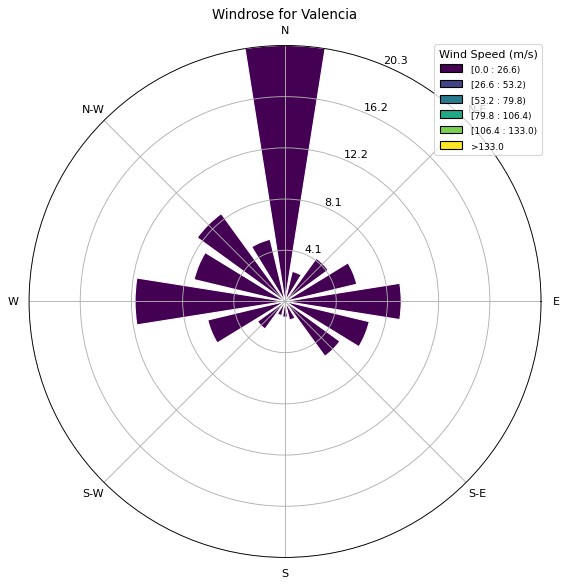

In [36]:
ax = WindroseAxes.from_ax()
ax.bar(city_dfs[0].wind_deg, city_dfs[0].wind_speed, normed=True, opening=0.8, edgecolor='white')

ax.set_legend(title = 'Wind Speed (m/s)', loc='best')
plt.title(f"Windrose for {city_names[0]}")

plt.savefig('images/valencia_windrose.png')

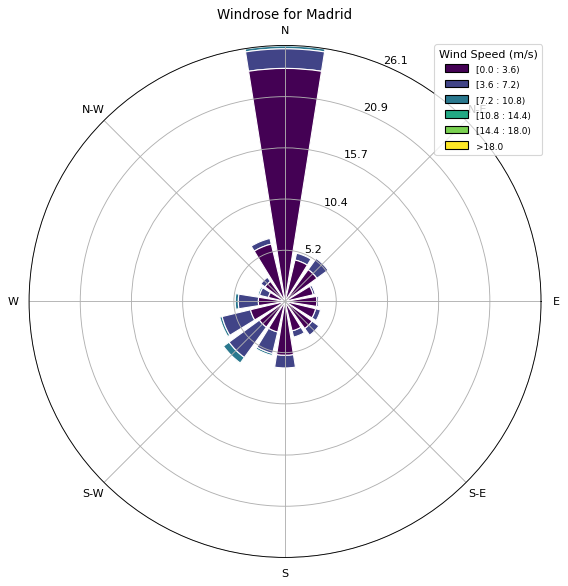

In [37]:
ax = WindroseAxes.from_ax()
ax.bar(city_dfs[1].wind_deg, city_dfs[1].wind_speed, normed=True, opening=0.8, edgecolor='white')

ax.set_legend(title = 'Wind Speed (m/s)', loc='best')
plt.title(f"Windrose for {city_names[1]}")

plt.savefig('images/madrid_windrose.png')

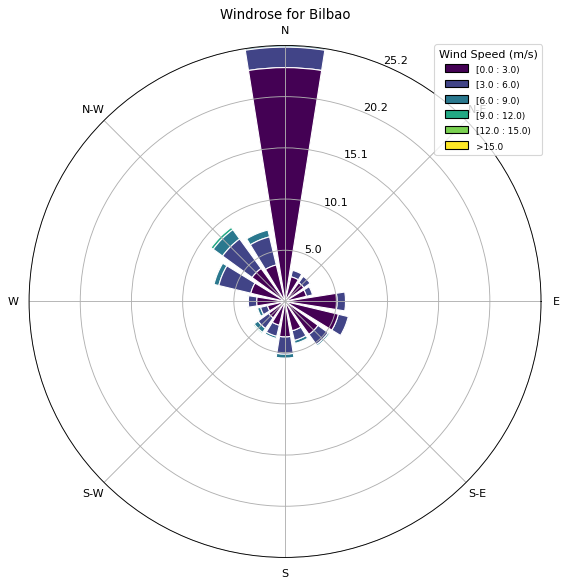

In [38]:
ax = WindroseAxes.from_ax()
ax.bar(city_dfs[2].wind_deg, city_dfs[2].wind_speed, normed=True, opening=0.8, edgecolor='white')

ax.set_legend(title = 'Wind Speed (m/s)', loc='best')
plt.title(f"Windrose for {city_names[2]}")

plt.savefig('images/bilbao_windrose.png')

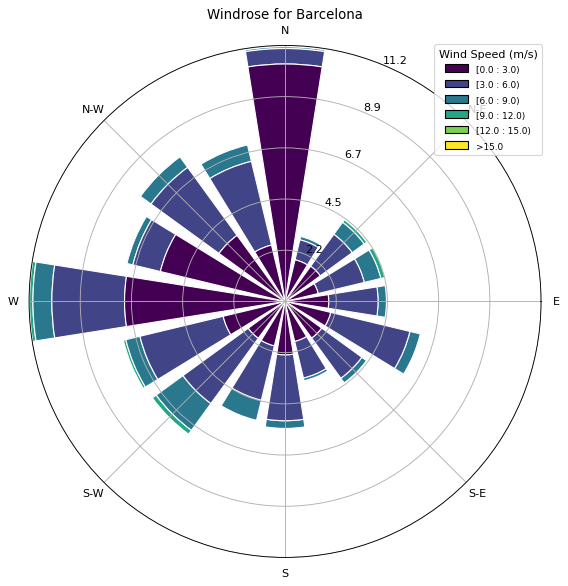

In [39]:
ax = WindroseAxes.from_ax()
ax.bar(city_dfs[3].wind_deg, city_dfs[3].wind_speed, normed=True, opening=0.8, edgecolor='white')

ax.set_legend(title = 'Wind Speed (m/s)', loc='best')
plt.title(f"Windrose for {city_names[3]}")

plt.savefig('images/barcelona_windrose.png')

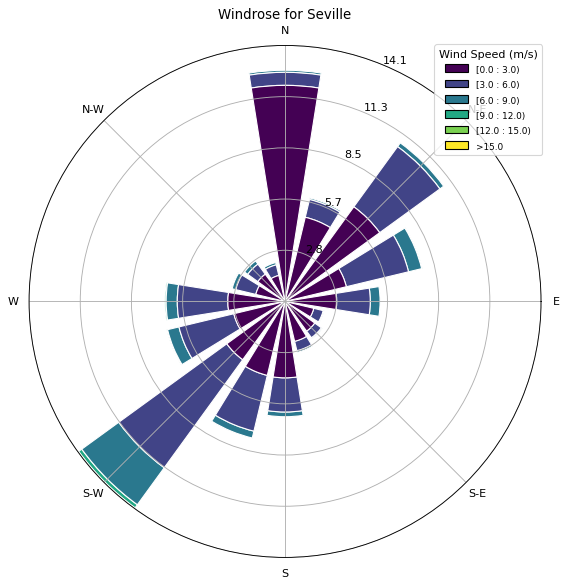

In [40]:
ax = WindroseAxes.from_ax()
ax.bar(city_dfs[4].wind_deg, city_dfs[4].wind_speed, normed=True, opening=0.8, edgecolor='white')

ax.set_legend(title = 'Wind Speed (m/s)', loc='best')
plt.title(f"Windrose for {city_names[4]}")

plt.savefig('images/seville_windrose.png')

In [41]:
weather_data.reset_index(inplace=True)
weather_data.head()

dt_iso city_name   temp  pressure  humidity  wind_speed  \
0 2015-01-01 00:00:00+01:00  Valencia -2.675      1001        77           1   
1 2015-01-01 01:00:00+01:00  Valencia -2.675      1001        77           1   
2 2015-01-01 02:00:00+01:00  Valencia -3.464      1002        78           0   
3 2015-01-01 03:00:00+01:00  Valencia -3.464      1002        78           0   
4 2015-01-01 04:00:00+01:00  Valencia -3.464      1002        78           0   

   wind_deg  rain_1h  rain_3h  snow_3h  clouds_all  
0        62      0.0      0.0      0.0           0  
1        62      0.0      0.0      0.0           0  
2        23      0.0      0.0      0.0           0  
3        23      0.0      0.0      0.0           0  
4        23      0.0      0.0      0.0           0

In [42]:
weather_data.rename(columns={'dt_iso': 'date'}, inplace=True)
weather_data.head()

date city_name   temp  pressure  humidity  wind_speed  \
0 2015-01-01 00:00:00+01:00  Valencia -2.675      1001        77           1   
1 2015-01-01 01:00:00+01:00  Valencia -2.675      1001        77           1   
2 2015-01-01 02:00:00+01:00  Valencia -3.464      1002        78           0   
3 2015-01-01 03:00:00+01:00  Valencia -3.464      1002        78           0   
4 2015-01-01 04:00:00+01:00  Valencia -3.464      1002        78           0   

   wind_deg  rain_1h  rain_3h  snow_3h  clouds_all  
0        62      0.0      0.0      0.0           0  
1        62      0.0      0.0      0.0           0  
2        23      0.0      0.0      0.0           0  
3        23      0.0      0.0      0.0           0  
4        23      0.0      0.0      0.0           0

In [43]:
features = weather_data.columns.tolist()
features = features[2:]
features

['temp',
 'pressure',
 'humidity',
 'wind_speed',
 'wind_deg',
 'rain_1h',
 'rain_3h',
 'snow_3h',
 'clouds_all']

In [47]:
#Overall Temperature trends
#Create a df with the average temp for each city for each year
wea_avg = weather_data.copy()
wea_avg['year'] = wea_avg['date'].dt.year
# wea_avg_mo['month'] = wea_avg_mo['date'].dt.month
# wea_avg['year_month'] = pd.to_datetime(wea_avg_mo[['year', 'month']].assign(day=1)).dt.to_period('M')

wea_avg = wea_avg.groupby(['city_name', 'year'])[features].mean()
wea_avg.head()

temp     pressure   humidity  wind_speed    wind_deg  \
city_name year                                                              
Barcelona 2015  16.668768  2091.754253  73.500680    3.144024  202.509526   
          2016  16.767446  1016.970422  77.723978    3.172499  199.852337   
          2017  16.650855  1018.299345  71.307362    2.314137  168.278681   
          2018  16.705707  1015.215116  73.447339    2.519790  178.263193   
Bilbao    2015  13.159605  1020.099177  79.099741    1.643751  172.724107   

                 rain_1h   rain_3h   snow_3h  clouds_all  
city_name year                                            
Barcelona 2015  0.162690  0.000915  0.000000   25.222953  
          2016  0.205069  0.000349  0.000000   23.663016  
          2017  0.044106  0.000043  0.000000   20.555668  
          2018  0.057223  0.000005  0.000000   23.482894  
Bilbao    2015  0.251550  0.002793  0.094667   44.201736

In [48]:
#Overall Temperature trends
#Create a df with the average temp for each city for each year
wea_avg_mo = weather_data.copy()
wea_avg_mo['year'] = wea_avg_mo['date'].dt.year
wea_avg_mo['month'] = wea_avg_mo['date'].dt.month
wea_avg_mo['year_month'] = pd.to_datetime(wea_avg_mo[['year', 'month']].assign(day=1)).dt.to_period('M')

wea_avg_mo = wea_avg_mo.groupby(['city_name', 'year_month'])[features].mean()
wea_avg_mo.head()

temp      pressure   humidity  wind_speed  \
city_name year_month                                                   
Barcelona 2015-01     11.199088   1017.580645  63.391129    2.311828   
          2015-02      9.510317  15097.156250  51.968750    3.035714   
          2015-03     12.217895   1018.866935  74.595430    4.067204   
          2015-04     14.009953   1020.633333  81.102778    2.643056   
          2015-05     17.781860   1019.447581  86.870968    2.981183   

                        wind_deg   rain_1h   rain_3h  snow_3h  clouds_all  
city_name year_month                                                       
Barcelona 2015-01     209.915323  0.086694  0.000000      0.0   20.833333  
          2015-02     178.723214  0.325000  0.000000      0.0   27.910714  
          2015-03     158.856183  0.351210  0.004552      0.0   33.568548  
          2015-04     160.188889  0.062500  0.003929      0.0   25.269444  
          2015-05     197.713710  0.044758  0.000794      0.0   20.731183

In [49]:
wea_avg.rename(columns={
    'temp': 'Temp (C)', 
    'pressure':'Pressure (hPa)',
    'humidity': 'Humidity (%)',
    'wind_speed': 'Wind Speed (m/sec)',
    'wind_deg': 'Wind Direction (deg clockwise from N)',
    'rain_1h': 'Rain_1h (mm)',
    'rain_3h': 'Rain_3h (mm)',
    'snow_3h': 'Snow_3h (mm)',
    'clouds_all': 'Cloudiness (%)'
}, inplace=True)
wea_avg.head()

Temp (C)  Pressure (hPa)  Humidity (%)  Wind Speed (m/sec)  \
city_name year                                                                
Barcelona 2015  16.668768     2091.754253     73.500680            3.144024   
          2016  16.767446     1016.970422     77.723978            3.172499   
          2017  16.650855     1018.299345     71.307362            2.314137   
          2018  16.705707     1015.215116     73.447339            2.519790   
Bilbao    2015  13.159605     1020.099177     79.099741            1.643751   

                Wind Direction (deg clockwise from N)  Rain_1h (mm)  \
city_name year                                                        
Barcelona 2015                             202.509526      0.162690   
          2016                             199.852337      0.205069   
          2017                             168.278681      0.044106   
          2018                             178.263193      0.057223   
Bilbao    2015                             172.724107      0.251550   

                Rain_3h (mm)  Snow_3h (mm)  Cloudiness (%)  
city_name year                                              
Barcelona 2015      0.000915      0.000000       25.222953  
          2016      0.000349      0.000000       23.663016  
          2017      0.000043      0.000000       20.555668  
          2018      0.000005      0.000000       23.482894  
Bilbao    2015      0.002793      0.094667       44.201736

In [50]:
wea_avg_mo.rename(columns={
    'temp': 'Temp (C)', 
    'pressure':'Pressure (hPa)',
    'humidity': 'Humidity (%)',
    'wind_speed': 'Wind Speed (m/sec)',
    'wind_deg': 'Wind Direction (deg clockwise from N)',
    'rain_1h': 'Rain_1h (mm)',
    'rain_3h': 'Rain_3h (mm)',
    'snow_3h': 'Snow_3h (mm)',
    'clouds_all': 'Cloudiness (%)'
}, inplace=True)
wea_avg_mo.head()

Temp (C)  Pressure (hPa)  Humidity (%)  \
city_name year_month                                            
Barcelona 2015-01     11.199088     1017.580645     63.391129   
          2015-02      9.510317    15097.156250     51.968750   
          2015-03     12.217895     1018.866935     74.595430   
          2015-04     14.009953     1020.633333     81.102778   
          2015-05     17.781860     1019.447581     86.870968   

                      Wind Speed (m/sec)  \
city_name year_month                       
Barcelona 2015-01               2.311828   
          2015-02               3.035714   
          2015-03               4.067204   
          2015-04               2.643056   
          2015-05               2.981183   

                      Wind Direction (deg clockwise from N)  Rain_1h (mm)  \
city_name year_month                                                        
Barcelona 2015-01                                209.915323      0.086694   
          2015-02                                178.723214      0.325000   
          2015-03                                158.856183      0.351210   
          2015-04                                160.188889      0.062500   
          2015-05                                197.713710      0.044758   

                      Rain_3h (mm)  Snow_3h (mm)  Cloudiness (%)  
city_name year_month                                              
Barcelona 2015-01         0.000000           0.0       20.833333  
          2015-02         0.000000           0.0       27.910714  
          2015-03         0.004552           0.0       33.568548  
          2015-04         0.003929           0.0       25.269444  
          2015-05         0.000794           0.0       20.731183

In [51]:
features2 = wea_avg_mo.columns.tolist()
features2 = features2
features2

['Temp (C)',
 'Pressure (hPa)',
 'Humidity (%)',
 'Wind Speed (m/sec)',
 'Wind Direction (deg clockwise from N)',
 'Rain_1h (mm)',
 'Rain_3h (mm)',
 'Snow_3h (mm)',
 'Cloudiness (%)']

In [52]:
import numpy as np
wea_avg_mo.select_dtypes(include=[np.datetime64])

Empty DataFrame
Columns: []
Index: [(Barcelona, 2015-01), (Barcelona, 2015-02), (Barcelona, 2015-03), (Barcelona, 2015-04), (Barcelona, 2015-05), (Barcelona, 2015-06), (Barcelona, 2015-07), (Barcelona, 2015-08), (Barcelona, 2015-09), (Barcelona, 2015-10), (Barcelona, 2015-11), (Barcelona, 2015-12), (Barcelona, 2016-01), (Barcelona, 2016-02), (Barcelona, 2016-03), (Barcelona, 2016-04), (Barcelona, 2016-05), (Barcelona, 2016-06), (Barcelona, 2016-07), (Barcelona, 2016-08), (Barcelona, 2016-09), (Barcelona, 2016-10), (Barcelona, 2016-11), (Barcelona, 2016-12), (Barcelona, 2017-01), (Barcelona, 2017-02), (Barcelona, 2017-03), (Barcelona, 2017-04), (Barcelona, 2017-05), (Barcelona, 2017-06), (Barcelona, 2017-07), (Barcelona, 2017-08), (Barcelona, 2017-09), (Barcelona, 2017-10), (Barcelona, 2017-11), (Barcelona, 2017-12), (Barcelona, 2018-01), (Barcelona, 2018-02), (Barcelona, 2018-03), (Barcelona, 2018-04), (Barcelona, 2018-05), (Barcelona, 2018-06), (Barcelona, 2018-07), (Barcelona, 2018-08), (Barcelona, 2018-09), (Barcelona, 2018-10), (Barcelona, 2018-11), (Barcelona, 2018-12), (Bilbao, 2015-01), (Bilbao, 2015-02), (Bilbao, 2015-03), (Bilbao, 2015-04), (Bilbao, 2015-05), (Bilbao, 2015-06), (Bilbao, 2015-07), (Bilbao, 2015-08), (Bilbao, 2015-09), (Bilbao, 2015-10), (Bilbao, 2015-11), (Bilbao, 2015-12), (Bilbao, 2016-01), (Bilbao, 2016-02), (Bilbao, 2016-03), (Bilbao, 2016-04), (Bilbao, 2016-05), (Bilbao, 2016-06), (Bilbao, 2016-07), (Bilbao, 2016-08), (Bilbao, 2016-09), (Bilbao, 2016-10), (Bilbao, 2016-11), (Bilbao, 2016-12), (Bilbao, 2017-01), (Bilbao, 2017-02), (Bilbao, 2017-03), (Bilbao, 2017-04), (Bilbao, 2017-05), (Bilbao, 2017-06), (Bilbao, 2017-07), (Bilbao, 2017-08), (Bilbao, 2017-09), (Bilbao, 2017-10), (Bilbao, 2017-11), (Bilbao, 2017-12), (Bilbao, 2018-01), (Bilbao, 2018-02), (Bilbao, 2018-03), (Bilbao, 2018-04), (Bilbao, 2018-05), (Bilbao, 2018-06), (Bilbao, 2018-07), (Bilbao, 2018-08), (Bilbao, 2018-09), (Bilbao, 2018-10), (Bilbao, 2018-11), (Bilbao, 2018-12), (Madrid, 2015-01), (Madrid, 2015-02), (Madrid, 2015-03), (Madrid, 2015-04), ...]

[240 rows x 0 columns]

In [53]:
wea_avg_mo.reset_index(inplace=True)
wea_avg_mo.head()

city_name year_month   Temp (C)  Pressure (hPa)  Humidity (%)  \
0  Barcelona    2015-01  11.199088     1017.580645     63.391129   
1  Barcelona    2015-02   9.510317    15097.156250     51.968750   
2  Barcelona    2015-03  12.217895     1018.866935     74.595430   
3  Barcelona    2015-04  14.009953     1020.633333     81.102778   
4  Barcelona    2015-05  17.781860     1019.447581     86.870968   

   Wind Speed (m/sec)  Wind Direction (deg clockwise from N)  Rain_1h (mm)  \
0            2.311828                             209.915323      0.086694   
1            3.035714                             178.723214      0.325000   
2            4.067204                             158.856183      0.351210   
3            2.643056                             160.188889      0.062500   
4            2.981183                             197.713710      0.044758   

   Rain_3h (mm)  Snow_3h (mm)  Cloudiness (%)  
0      0.000000           0.0       20.833333  
1      0.000000           0.0       27.910714  
2      0.004552           0.0       33.568548  
3      0.003929           0.0       25.269444  
4      0.000794           0.0       20.731183

In [54]:
wea_avg_mo["year_month"] = wea_avg_mo["year_month"].astype(str)

In [55]:
# fig, ax = plt.subplots()
# ax.plot(data=wea_avg_mo, x="year_month", y="temp", hue='city_name')
# # xticks_list = ['2015-01', '2015-06', '2016-01', '2016-06', '2017-01', '2017-06', '2018=01', '2018-06']
# # plt.xticks(xticks_list)
# ax.xaxis.set_major_locator(MultipleLocator(2))

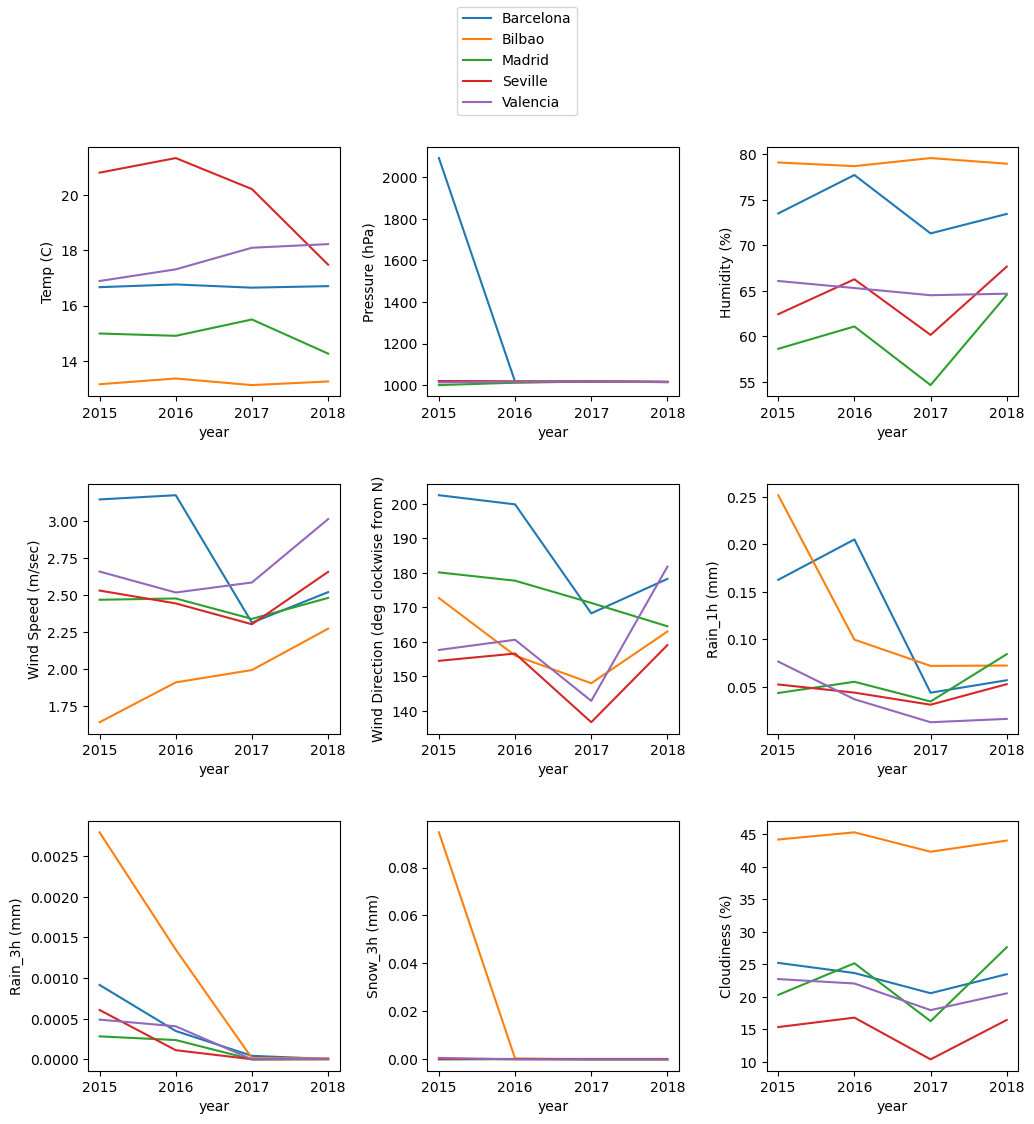

In [56]:
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
count=0
for i in range(3):
    j=0
    sns.lineplot(data=wea_avg, x="year", y=features2[count], ax=axes[i][j], hue='city_name')
    axes[i][j].get_legend().set_visible(False)
    sns.lineplot(data=wea_avg, x="year", y=features2[count+1], ax=axes[i][j+1], hue='city_name')
    axes[i][j+1].get_legend().set_visible(False)
    sns.lineplot(data=wea_avg, x="year", y=features2[count+2], ax=axes[i][j+2], hue='city_name')
    axes[i][j+2].get_legend().set_visible(False)
    count = count+3
    #axes[i].set_title("Distribution of Total Bill")

# Create a common legend for all subplots
handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center')

plt.subplots_adjust(wspace=0.35, hspace=0.35)
plt.tight_layout

plt.savefig('images/allcities_weatherdata_subplots_avg_year.png', bbox_inches='tight')

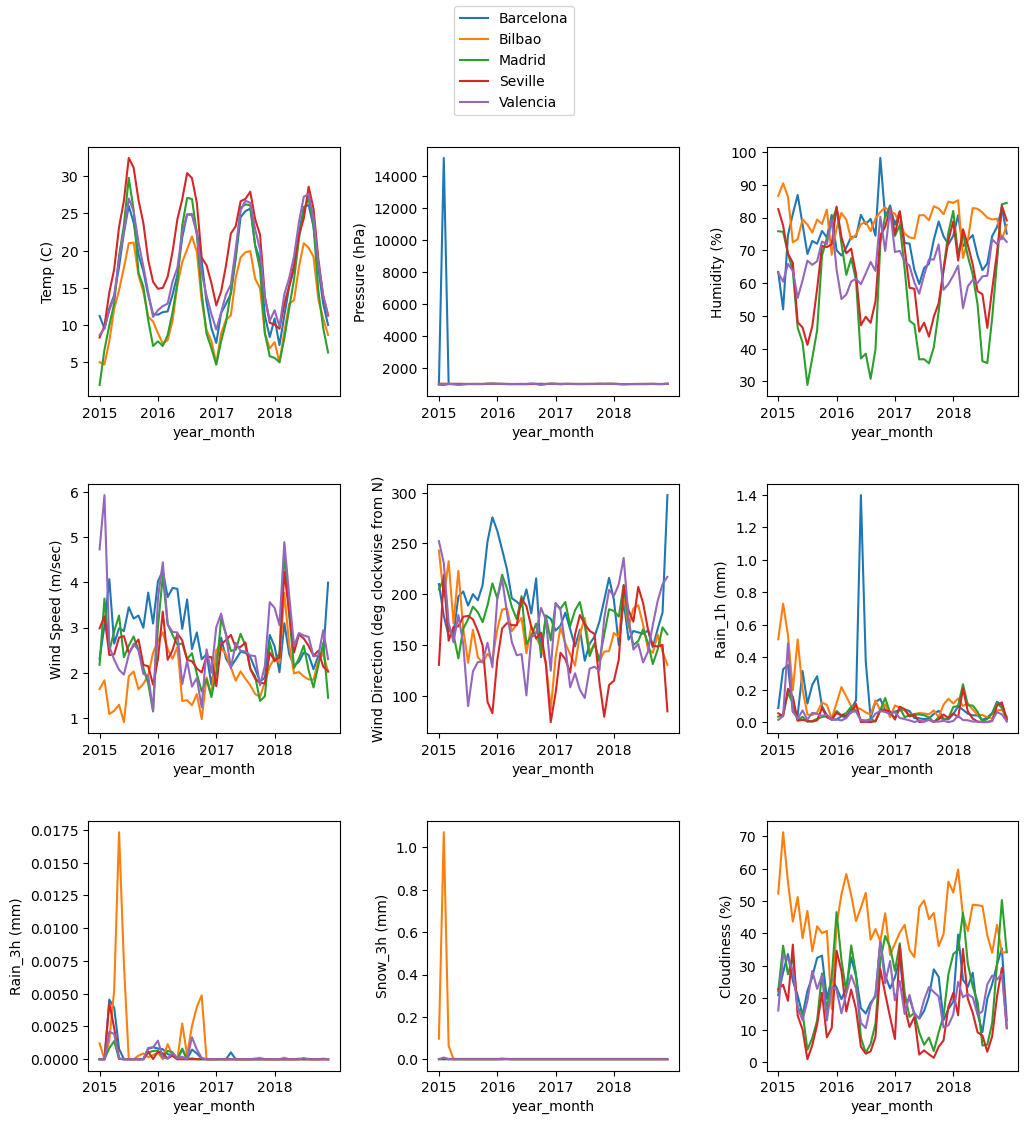

In [57]:
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
count=0
for i in range(3):
    j=0
    sns.lineplot(data=wea_avg_mo, x="year_month", y=features2[count], ax=axes[i][j], hue='city_name')
    axes[i][j].get_legend().set_visible(False)
    sns.lineplot(data=wea_avg_mo, x="year_month", y=features2[count+1], ax=axes[i][j+1], hue='city_name')
    axes[i][j+1].get_legend().set_visible(False)
    sns.lineplot(data=wea_avg_mo, x="year_month", y=features2[count+2], ax=axes[i][j+2], hue='city_name')
    axes[i][j+2].get_legend().set_visible(False)
    axes[i][j+2].get_legend().set_visible(False)
    count = count+3
    #axes[i].set_title("Distribution of Total Bill")

# Create a common legend for all subplots
handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center')

plt.setp(axes, xticks=["2015-01", "2016-01", "2017-01", "2018-01"], xticklabels=['2015', '2016', '2017', '2018'])

plt.subplots_adjust(wspace=0.35, hspace=0.35)
plt.tight_layout

plt.savefig('images/energy_generation_bytype_2015-2018_3.png', bbox_inches='tight')

# 3.0 Visualizing basic energy data

In [58]:
energy_data.head()

generation biomass  \
time                                            
2015-01-01 00:00:00+01:00               447.0   
2015-01-01 01:00:00+01:00               449.0   
2015-01-01 02:00:00+01:00               448.0   
2015-01-01 03:00:00+01:00               438.0   
2015-01-01 04:00:00+01:00               428.0   

                           generation fossil brown coal/lignite  \
time                                                              
2015-01-01 00:00:00+01:00                                 329.0   
2015-01-01 01:00:00+01:00                                 328.0   
2015-01-01 02:00:00+01:00                                 323.0   
2015-01-01 03:00:00+01:00                                 254.0   
2015-01-01 04:00:00+01:00                                 187.0   

                           generation fossil gas  generation fossil hard coal  \
time                                                                            
2015-01-01 00:00:00+01:00                 4844.0                       4821.0   
2015-01-01 01:00:00+01:00                 5196.0                       4755.0   
2015-01-01 02:00:00+01:00                 4857.0                       4581.0   
2015-01-01 03:00:00+01:00                 4314.0                       4131.0   
2015-01-01 04:00:00+01:00                 4130.0                       3840.0   

                           generation fossil oil  \
time                                               
2015-01-01 00:00:00+01:00                  162.0   
2015-01-01 01:00:00+01:00                  158.0   
2015-01-01 02:00:00+01:00                  157.0   
2015-01-01 03:00:00+01:00                  160.0   
2015-01-01 04:00:00+01:00                  156.0   

                           generation hydro pumped storage consumption  \
time                                                                     
2015-01-01 00:00:00+01:00                                        863.0   
2015-01-01 01:00:00+01:00                                        920.0   
2015-01-01 02:00:00+01:00                                       1164.0   
2015-01-01 03:00:00+01:00                                       1503.0   
2015-01-01 04:00:00+01:00                                       1826.0   

                           generation hydro run-of-river and poundage  \
time                                                                    
2015-01-01 00:00:00+01:00                                      1051.0   
2015-01-01 01:00:00+01:00                                      1009.0   
2015-01-01 02:00:00+01:00                                       973.0   
2015-01-01 03:00:00+01:00                                       949.0   
2015-01-01 04:00:00+01:00                                       953.0   

                           generation hydro water reservoir  \
time                                                          
2015-01-01 00:00:00+01:00                            1899.0   
2015-01-01 01:00:00+01:00                            1658.0   
2015-01-01 02:00:00+01:00                            1371.0   
2015-01-01 03:00:00+01:00                             779.0   
2015-01-01 04:00:00+01:00                             720.0   

                           generation nuclear  generation other  ...  \
time                                                             ...   
2015-01-01 00:00:00+01:00              7096.0              43.0  ...   
2015-01-01 01:00:00+01:00              7096.0              43.0  ...   
2015-01-01 02:00:00+01:00              7099.0              43.0  ...   
2015-01-01 03:00:00+01:00              7098.0              43.0  ...   
2015-01-01 04:00:00+01:00              7097.0              43.0  ...   

                           generation waste  generation wind onshore  \
time                                                                   
2015-01-01 00:00:00+01:00             196.0                   6378.0   
2015-01-01 01:00:00+01:00             195.0                   5890.0   
2015-01-01 02:

In [59]:
#Subset data without forcast, totals or price data
non_gen = ["forecast solar day ahead", "forecast wind onshore day ahead", "total load forecast", "total load actual", "price day ahead", "price actual", "gen_total", "diff_gen_load"]
energy_gen = energy_data.drop(columns = non_gen)
energy_gen.columns = energy_gen.columns.str.replace("generation ", "")
energy_gen.head()

biomass  fossil brown coal/lignite  fossil gas  \
time                                                                        
2015-01-01 00:00:00+01:00    447.0                      329.0      4844.0   
2015-01-01 01:00:00+01:00    449.0                      328.0      5196.0   
2015-01-01 02:00:00+01:00    448.0                      323.0      4857.0   
2015-01-01 03:00:00+01:00    438.0                      254.0      4314.0   
2015-01-01 04:00:00+01:00    428.0                      187.0      4130.0   

                           fossil hard coal  fossil oil  \
time                                                      
2015-01-01 00:00:00+01:00            4821.0       162.0   
2015-01-01 01:00:00+01:00            4755.0       158.0   
2015-01-01 02:00:00+01:00            4581.0       157.0   
2015-01-01 03:00:00+01:00            4131.0       160.0   
2015-01-01 04:00:00+01:00            3840.0       156.0   

                           hydro pumped storage consumption  \
time                                                          
2015-01-01 00:00:00+01:00                             863.0   
2015-01-01 01:00:00+01:00                             920.0   
2015-01-01 02:00:00+01:00                            1164.0   
2015-01-01 03:00:00+01:00                            1503.0   
2015-01-01 04:00:00+01:00                            1826.0   

                           hydro run-of-river and poundage  \
time                                                         
2015-01-01 00:00:00+01:00                           1051.0   
2015-01-01 01:00:00+01:00                           1009.0   
2015-01-01 02:00:00+01:00                            973.0   
2015-01-01 03:00:00+01:00                            949.0   
2015-01-01 04:00:00+01:00                            953.0   

                           hydro water reservoir  nuclear  other  \
time                                                               
2015-01-01 00:00:00+01:00                 1899.0   7096.0   43.0   
2015-01-01 01:00:00+01:00                 1658.0   7096.0   43.0   
2015-01-01 02:00:00+01:00                 1371.0   7099.0   43.0   
2015-01-01 03:00:00+01:00                  779.0   7098.0   43.0   
2015-01-01 04:00:00+01:00                  720.0   7097.0   43.0   

                           other renewable  solar  waste  wind onshore  
time                                                                    
2015-01-01 00:00:00+01:00             73.0   49.0  196.0        6378.0  
2015-01-01 01:00:00+01:00             71.0   50.0  195.0        5890.0  
2015-01-01 02:00:00+01:00             73.0   50.0  196.0        5461.0  
2015-01-01 03:00:00+01:00             75.0   50.0  191.0        5238.0  
2015-01-01 04:00:00+01:00             74.0   42.0  189.0        4935.0

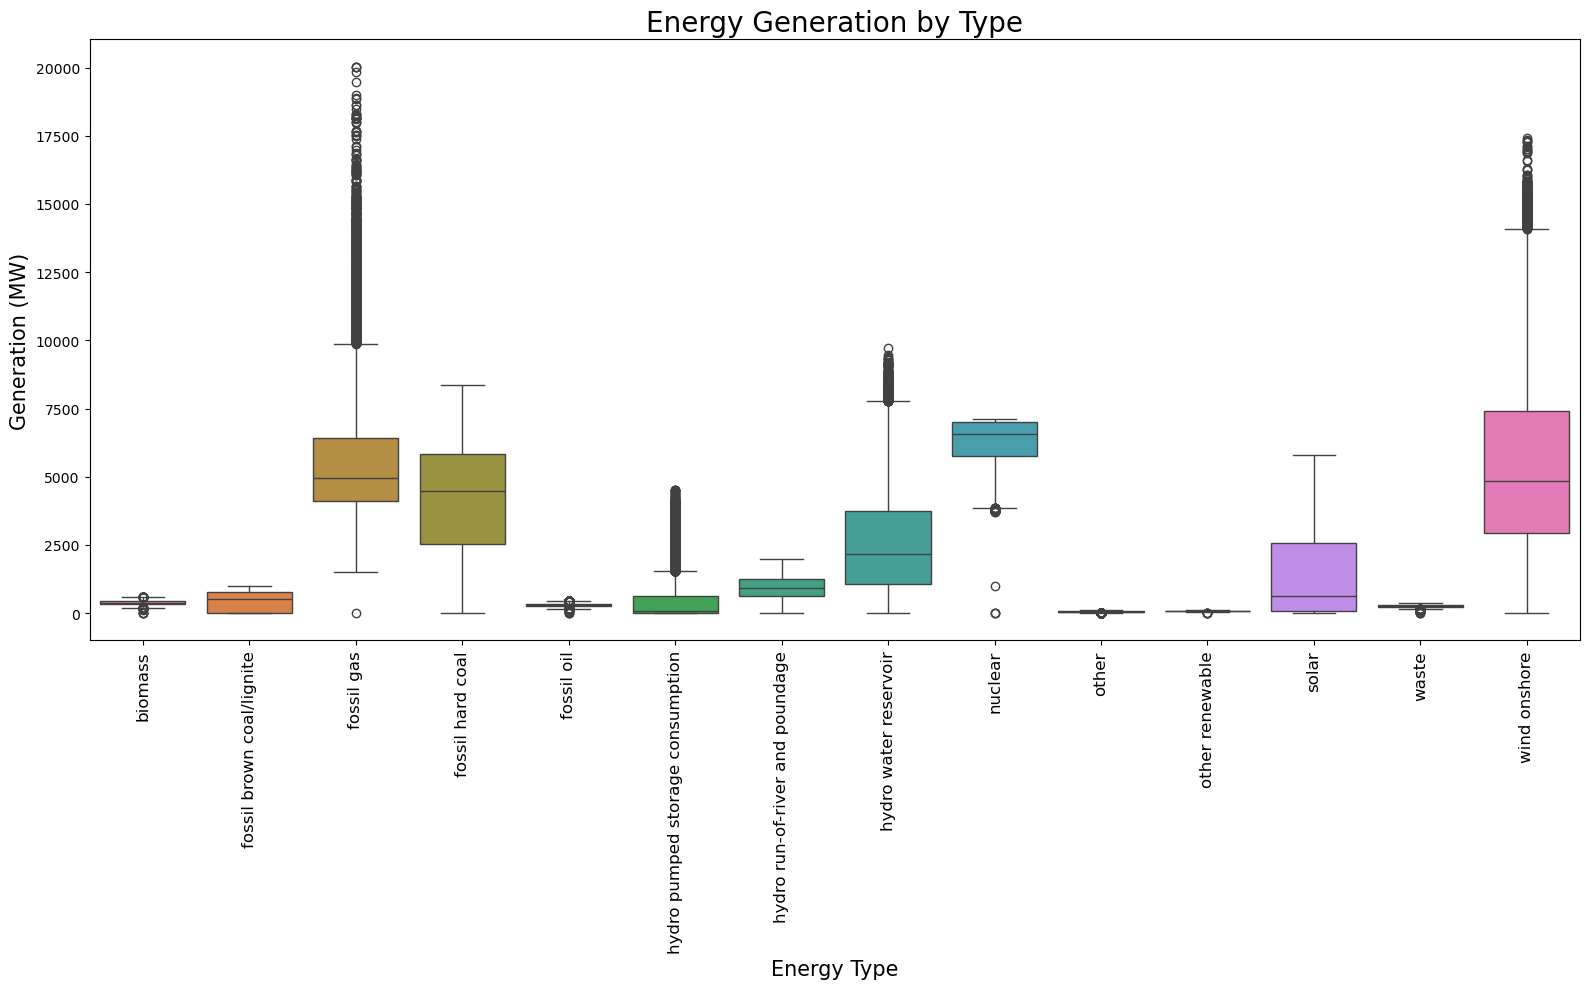

In [60]:
fig, ax = plt.subplots(figsize=(16, 10))
sns.boxplot(data=energy_gen)
plt.title('Energy Generation by Type', fontsize=20)
plt.xlabel('Energy Type', fontsize=15)
plt.ylabel('Generation (MW)', fontsize=15)
plt.xticks(fontsize=12, rotation=90)
fig.tight_layout()
plt.savefig('images/energy_generation_bytype.png')

## 3.1 Subsetting data on 2015

In [61]:
eng_mini = energy_gen.loc['2015-01-01': '2015-12-31']
eng_mini.head()

biomass  fossil brown coal/lignite  fossil gas  \
time                                                                        
2015-01-01 00:00:00+01:00    447.0                      329.0      4844.0   
2015-01-01 01:00:00+01:00    449.0                      328.0      5196.0   
2015-01-01 02:00:00+01:00    448.0                      323.0      4857.0   
2015-01-01 03:00:00+01:00    438.0                      254.0      4314.0   
2015-01-01 04:00:00+01:00    428.0                      187.0      4130.0   

                           fossil hard coal  fossil oil  \
time                                                      
2015-01-01 00:00:00+01:00            4821.0       162.0   
2015-01-01 01:00:00+01:00            4755.0       158.0   
2015-01-01 02:00:00+01:00            4581.0       157.0   
2015-01-01 03:00:00+01:00            4131.0       160.0   
2015-01-01 04:00:00+01:00            3840.0       156.0   

                           hydro pumped storage consumption  \
time                                                          
2015-01-01 00:00:00+01:00                             863.0   
2015-01-01 01:00:00+01:00                             920.0   
2015-01-01 02:00:00+01:00                            1164.0   
2015-01-01 03:00:00+01:00                            1503.0   
2015-01-01 04:00:00+01:00                            1826.0   

                           hydro run-of-river and poundage  \
time                                                         
2015-01-01 00:00:00+01:00                           1051.0   
2015-01-01 01:00:00+01:00                           1009.0   
2015-01-01 02:00:00+01:00                            973.0   
2015-01-01 03:00:00+01:00                            949.0   
2015-01-01 04:00:00+01:00                            953.0   

                           hydro water reservoir  nuclear  other  \
time                                                               
2015-01-01 00:00:00+01:00                 1899.0   7096.0   43.0   
2015-01-01 01:00:00+01:00                 1658.0   7096.0   43.0   
2015-01-01 02:00:00+01:00                 1371.0   7099.0   43.0   
2015-01-01 03:00:00+01:00                  779.0   7098.0   43.0   
2015-01-01 04:00:00+01:00                  720.0   7097.0   43.0   

                           other renewable  solar  waste  wind onshore  
time                                                                    
2015-01-01 00:00:00+01:00             73.0   49.0  196.0        6378.0  
2015-01-01 01:00:00+01:00             71.0   50.0  195.0        5890.0  
2015-01-01 02:00:00+01:00             73.0   50.0  196.0        5461.0  
2015-01-01 03:00:00+01:00             75.0   50.0  191.0        5238.0  
2015-01-01 04:00:00+01:00             74.0   42.0  189.0        4935.0

In [62]:
#months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']  # values of the x-axis
# Defining and displaying time axis ticks
ticks = eng_mini.index
#plt.xticks(ticks)

#Formatting x-axis(dates)
#ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b %d'))
#members = df_transposed.columns  # name of the x-mens for the legend
eng_type = eng_mini.columns  # name of the x-mens for the legend
#below is a nested list of the column values, e.g. [61, 35, 20, 23], [62, 38, 9, 10], [63, 69, 56, 9]...
gen_list = eng_mini.T.values.tolist()  # values of the x-men

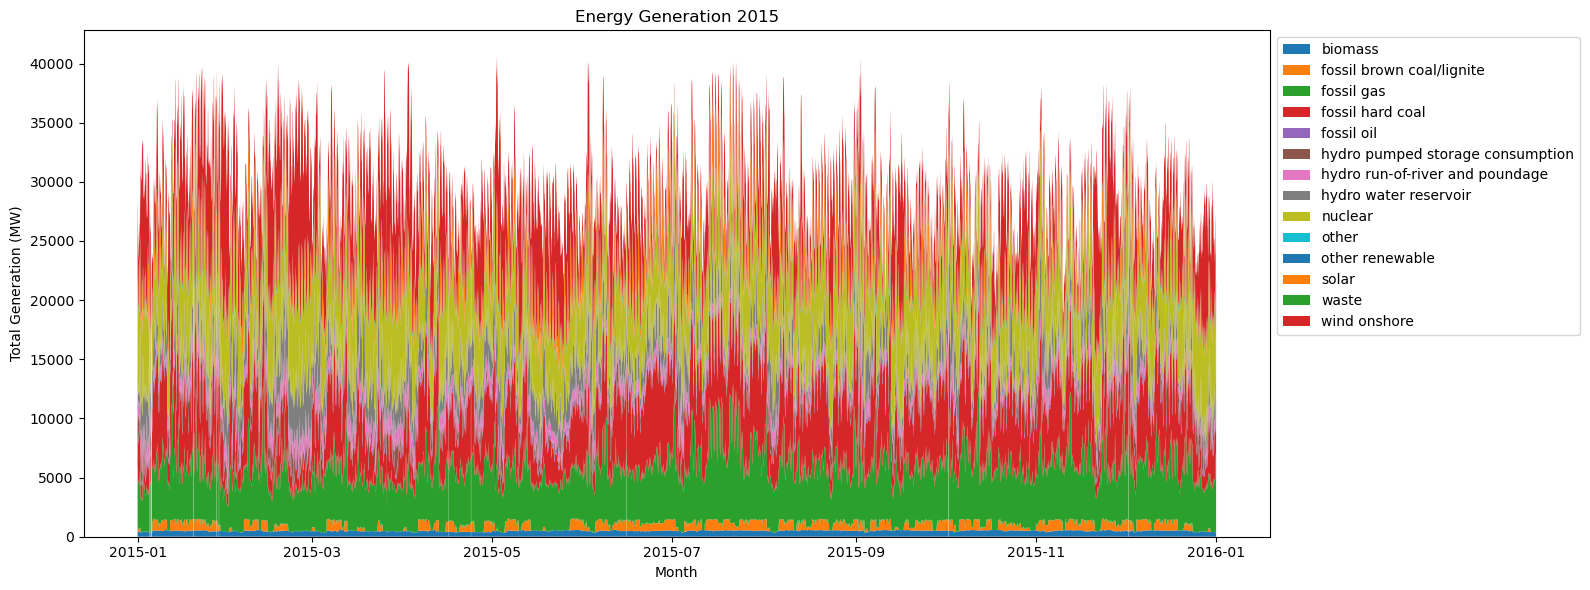

<Figure size 640x480 with 0 Axes>

In [63]:
#simple plot

fig, ax = plt.subplots(figsize=(16, 6))
ax.stackplot(ticks, gen_list, labels=eng_type)
ax.set_title('Energy Generation 2015')
ax.set_ylabel('Total Generation (MW)')
ax.set_xlabel('Month')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

fig.tight_layout()
plt.show()

plt.savefig('images/energygeneration_hourly_2015.png')

C:\Users\keral\AppData\Local\Temp\ipykernel_15688\3433201556.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eng_mini['hour'] = eng_mini.index.hour


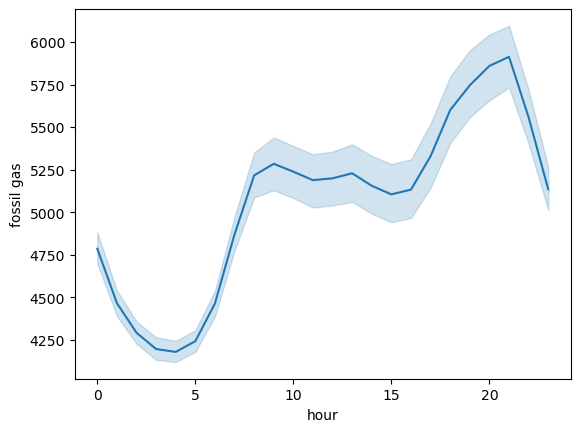

In [65]:
eng_mini['hour'] = eng_mini.index.hour
#print(eng_mini.head())
sns.lineplot(data=eng_mini, x=eng_mini.hour, y="fossil gas")

plt.savefig('images/genfossilgas_lineplot_2015.png')

In [66]:
energy_data.index.max()

Timestamp('2018-12-31 23:00:00+0100', tz='Europe/Madrid')

## IN PLOT BELOW - TICKS ARE NOT EVENLY SPACED

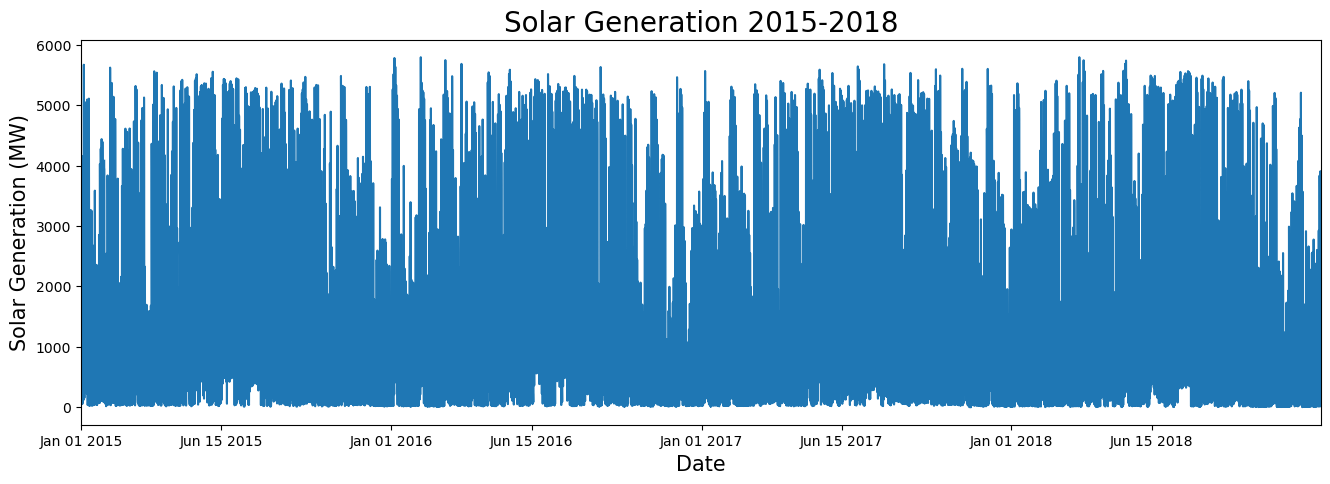

In [67]:
#Plot line plot of solar generation info
fig, ax = plt.subplots(figsize=(16, 5))
plt.plot(energy_data.index, energy_data['generation solar'])
#plt.scatter(energy_data.index, energy_data['generation solar'], alpha=0.2)
plt.title('Solar Generation 2015-2018', fontsize=20)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Solar Generation (MW)', fontsize=15)
plt.xlim(energy_data.index.min(), energy_data.index.max())

# Defining and displaying time axis ticks
ticks = ['2015-01-01 12:00:00+00:00', '2015-06-15 12:00:00+00:00', '2016-01-01 12:00:00+00:00',
        '2016-06-15 12:00:00+00:00', '2017-01-01 12:00:00+00:00', '2017-06-15 12:00:00+00:00',
        '2018-01-01 12:00:00+00:00', '2018-06-15 12:00:00+00:00']
plt.xticks(ticks)

#Formatting x-axis(dates)
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b %d %Y'))

plt.savefig('images/solargen_hourly_2015-2018.png')

In [68]:
eng_list = energy_data.columns.tolist()
eng_list

['generation biomass',
 'generation fossil brown coal/lignite',
 'generation fossil gas',
 'generation fossil hard coal',
 'generation fossil oil',
 'generation hydro pumped storage consumption',
 'generation hydro run-of-river and poundage',
 'generation hydro water reservoir',
 'generation nuclear',
 'generation other',
 'generation other renewable',
 'generation solar',
 'generation waste',
 'generation wind onshore',
 'forecast solar day ahead',
 'forecast wind onshore day ahead',
 'total load forecast',
 'total load actual',
 'price day ahead',
 'price actual',
 'gen_total',
 'diff_gen_load']

In [69]:
features = eng_list[:14]
features

['generation biomass',
 'generation fossil brown coal/lignite',
 'generation fossil gas',
 'generation fossil hard coal',
 'generation fossil oil',
 'generation hydro pumped storage consumption',
 'generation hydro run-of-river and poundage',
 'generation hydro water reservoir',
 'generation nuclear',
 'generation other',
 'generation other renewable',
 'generation solar',
 'generation waste',
 'generation wind onshore']

In [70]:
energy_data.head()

generation biomass  \
time                                            
2015-01-01 00:00:00+01:00               447.0   
2015-01-01 01:00:00+01:00               449.0   
2015-01-01 02:00:00+01:00               448.0   
2015-01-01 03:00:00+01:00               438.0   
2015-01-01 04:00:00+01:00               428.0   

                           generation fossil brown coal/lignite  \
time                                                              
2015-01-01 00:00:00+01:00                                 329.0   
2015-01-01 01:00:00+01:00                                 328.0   
2015-01-01 02:00:00+01:00                                 323.0   
2015-01-01 03:00:00+01:00                                 254.0   
2015-01-01 04:00:00+01:00                                 187.0   

                           generation fossil gas  generation fossil hard coal  \
time                                                                            
2015-01-01 00:00:00+01:00                 4844.0                       4821.0   
2015-01-01 01:00:00+01:00                 5196.0                       4755.0   
2015-01-01 02:00:00+01:00                 4857.0                       4581.0   
2015-01-01 03:00:00+01:00                 4314.0                       4131.0   
2015-01-01 04:00:00+01:00                 4130.0                       3840.0   

                           generation fossil oil  \
time                                               
2015-01-01 00:00:00+01:00                  162.0   
2015-01-01 01:00:00+01:00                  158.0   
2015-01-01 02:00:00+01:00                  157.0   
2015-01-01 03:00:00+01:00                  160.0   
2015-01-01 04:00:00+01:00                  156.0   

                           generation hydro pumped storage consumption  \
time                                                                     
2015-01-01 00:00:00+01:00                                        863.0   
2015-01-01 01:00:00+01:00                                        920.0   
2015-01-01 02:00:00+01:00                                       1164.0   
2015-01-01 03:00:00+01:00                                       1503.0   
2015-01-01 04:00:00+01:00                                       1826.0   

                           generation hydro run-of-river and poundage  \
time                                                                    
2015-01-01 00:00:00+01:00                                      1051.0   
2015-01-01 01:00:00+01:00                                      1009.0   
2015-01-01 02:00:00+01:00                                       973.0   
2015-01-01 03:00:00+01:00                                       949.0   
2015-01-01 04:00:00+01:00                                       953.0   

                           generation hydro water reservoir  \
time                                                          
2015-01-01 00:00:00+01:00                            1899.0   
2015-01-01 01:00:00+01:00                            1658.0   
2015-01-01 02:00:00+01:00                            1371.0   
2015-01-01 03:00:00+01:00                             779.0   
2015-01-01 04:00:00+01:00                             720.0   

                           generation nuclear  generation other  ...  \
time                                                             ...   
2015-01-01 00:00:00+01:00              7096.0              43.0  ...   
2015-01-01 01:00:00+01:00              7096.0              43.0  ...   
2015-01-01 02:00:00+01:00              7099.0              43.0  ...   
2015-01-01 03:00:00+01:00              7098.0              43.0  ...   
2015-01-01 04:00:00+01:00              7097.0              43.0  ...   

                           generation waste  generation wind onshore  \
time                                                                   
2015-01-01 00:00:00+01:00             196.0                   6378.0   
2015-01-01 01:00:00+01:00             195.0                   5890.0   
2015-01-01 02:

In [71]:
#Overall Temperature trends
#Create a df with the average generation for each year-month
eng_avg_mo = energy_data.copy()
eng_avg_mo.reset_index(inplace=True)

eng_avg_mo['year'] = eng_avg_mo['time'].dt.year
eng_avg_mo['month'] = eng_avg_mo['time'].dt.month
eng_avg_mo['year_month'] = pd.to_datetime(eng_avg_mo[['year', 'month']].assign(day=1)).dt.to_period('M')


eng_avg_mo = eng_avg_mo.groupby('year_month')[features].mean()
eng_avg_mo.head()
# eng_avg_mo.head()

generation biomass  generation fossil brown coal/lignite  \
year_month                                                             
2015-01             483.735334                            572.851296   
2015-02             470.150298                            313.418155   
2015-03             468.106326                            244.437416   
2015-04             426.320334                            463.119777   
2015-05             503.569892                            374.280914   

            generation fossil gas  generation fossil hard coal  \
year_month                                                       
2015-01               4850.009550                  5411.263302   
2015-02               4674.135417                  4045.974702   
2015-03               4614.752355                  4233.818304   
2015-04               4952.123955                  4819.516713   
2015-05               4415.349462                  4019.612903   

            generation fossil oil  \
year_month                          
2015-01                306.020464   
2015-02                319.239583   
2015-03                319.333782   
2015-04                338.781337   
2015-05                332.567204   

            generation hydro pumped storage consumption  \
year_month                                                
2015-01                                      736.736698   
2015-02                                      728.791667   
2015-03                                      598.917900   
2015-04                                      487.635097   
2015-05                                      532.657258   

            generation hydro run-of-river and poundage  \
year_month                                               
2015-01                                    1027.178718   
2015-02                                    1160.305060   
2015-03                                    1174.179004   
2015-04                                    1005.550139   
2015-05                                     898.166667   

            generation hydro water reservoir  generation nuclear  \
year_month                                                         
2015-01                          2572.339700         6665.969986   
2015-02                          3712.690476         6681.123512   
2015-03                          3081.620458         6687.913863   
2015-04                          2516.012535         6068.169916   
2015-05                          2798.184140         5403.817204   

            generation other  generation other renewable  generation solar  \
year_month                                                                   
2015-01            70.128240                   70.660300       1130.392906   
2015-02            79.406250                   70.514881       1244.525298   
2015-03            74.775236                   66.632571       1283.479139   
2015-04            59.931755                   69.700557       1461.519499   
2015-05            82.225806                   70.565860       1920.272849   

            generation waste  generation wind onshore  
year_month                                             
2015-01           228.864939              7587.697135  
2015-02           213.822917              7731.806548  
2015-03           177.121131              6747.878869  
2015-04           192.306407              5506.381616  
2015-05           202.979839              6757.408602

In [72]:
# eng_avg_mo.reset_index(inplace=True)
# eng_avg_mo.head()

In [73]:
#eng_avg_mo["year_month"] = eng_avg_mo["year_month"].astype(str)

In [74]:
eng_avg_mo.index = eng_avg_mo.index.strftime('%Y-%m')
eng_avg_mo.head()

generation biomass  generation fossil brown coal/lignite  \
year_month                                                             
2015-01             483.735334                            572.851296   
2015-02             470.150298                            313.418155   
2015-03             468.106326                            244.437416   
2015-04             426.320334                            463.119777   
2015-05             503.569892                            374.280914   

            generation fossil gas  generation fossil hard coal  \
year_month                                                       
2015-01               4850.009550                  5411.263302   
2015-02               4674.135417                  4045.974702   
2015-03               4614.752355                  4233.818304   
2015-04               4952.123955                  4819.516713   
2015-05               4415.349462                  4019.612903   

            generation fossil oil  \
year_month                          
2015-01                306.020464   
2015-02                319.239583   
2015-03                319.333782   
2015-04                338.781337   
2015-05                332.567204   

            generation hydro pumped storage consumption  \
year_month                                                
2015-01                                      736.736698   
2015-02                                      728.791667   
2015-03                                      598.917900   
2015-04                                      487.635097   
2015-05                                      532.657258   

            generation hydro run-of-river and poundage  \
year_month                                               
2015-01                                    1027.178718   
2015-02                                    1160.305060   
2015-03                                    1174.179004   
2015-04                                    1005.550139   
2015-05                                     898.166667   

            generation hydro water reservoir  generation nuclear  \
year_month                                                         
2015-01                          2572.339700         6665.969986   
2015-02                          3712.690476         6681.123512   
2015-03                          3081.620458         6687.913863   
2015-04                          2516.012535         6068.169916   
2015-05                          2798.184140         5403.817204   

            generation other  generation other renewable  generation solar  \
year_month                                                                   
2015-01            70.128240                   70.660300       1130.392906   
2015-02            79.406250                   70.514881       1244.525298   
2015-03            74.775236                   66.632571       1283.479139   
2015-04            59.931755                   69.700557       1461.519499   
2015-05            82.225806                   70.565860       1920.272849   

            generation waste  generation wind onshore  
year_month                                             
2015-01           228.864939              7587.697135  
2015-02           213.822917              7731.806548  
2015-03           177.121131              6747.878869  
2015-04           192.306407              5506.381616  
2015-05           202.979839              6757.408602

In [75]:
#months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']  # values of the x-axis
# Defining and displaying time axis ticks
#ticks = eng_mini.index
ticks = eng_avg_mo.index


#Formatting x-axis(dates)
#ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b %d'))
#members = df_transposed.columns  # name of the x-mens for the legend
eng_type = eng_avg_mo.columns  # name of the x-mens for the legend
#below is a nested list of the column values, e.g. [61, 35, 20, 23], [62, 38, 9, 10], [63, 69, 56, 9]...
gen_list = eng_avg_mo.T.values.tolist()  # values of the x-men

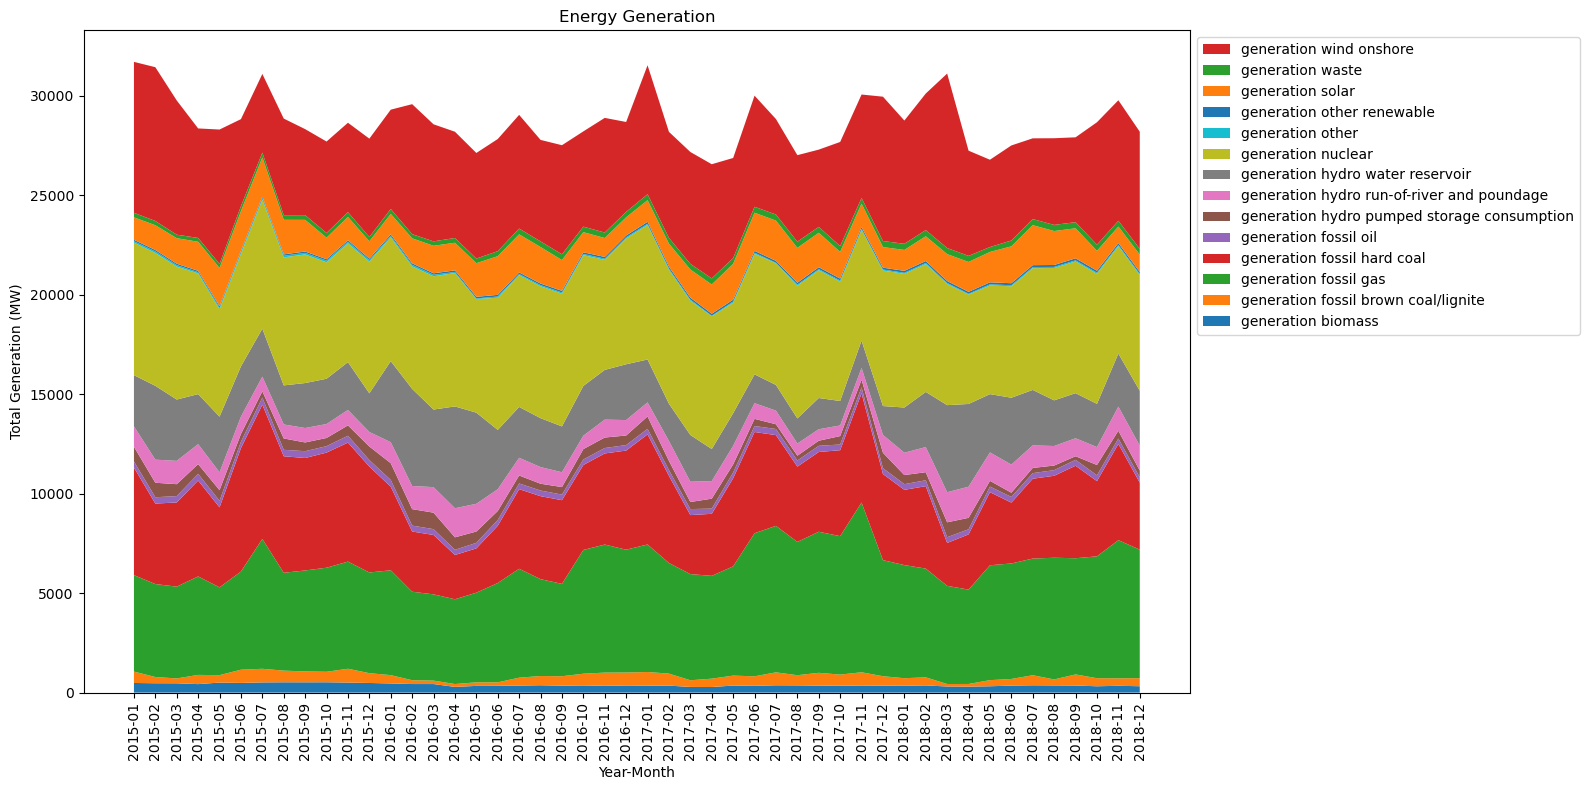

<Figure size 640x480 with 0 Axes>

In [76]:
#simple plot

fig, ax = plt.subplots(figsize=(16, 8))
ax.stackplot(ticks, gen_list, labels=eng_type)
ax.set_title('Energy Generation')
ax.set_ylabel('Total Generation (MW)')
ax.set_xlabel('Year-Month')
#ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Reverse the order using reversed()
handles, labels = plt.gca().get_legend_handles_labels()
# Reverse the order using reversed()
ax.legend(reversed(handles), reversed(labels),loc='upper left', bbox_to_anchor=(1, 1))

plt.xticks(rotation=90)
fig.tight_layout()
plt.show()

plt.savefig('images/energy_generation_bytype_2015-2018_3.png', bbox_inches='tight')

In [77]:
energy_data.head()

generation biomass  \
time                                            
2015-01-01 00:00:00+01:00               447.0   
2015-01-01 01:00:00+01:00               449.0   
2015-01-01 02:00:00+01:00               448.0   
2015-01-01 03:00:00+01:00               438.0   
2015-01-01 04:00:00+01:00               428.0   

                           generation fossil brown coal/lignite  \
time                                                              
2015-01-01 00:00:00+01:00                                 329.0   
2015-01-01 01:00:00+01:00                                 328.0   
2015-01-01 02:00:00+01:00                                 323.0   
2015-01-01 03:00:00+01:00                                 254.0   
2015-01-01 04:00:00+01:00                                 187.0   

                           generation fossil gas  generation fossil hard coal  \
time                                                                            
2015-01-01 00:00:00+01:00                 4844.0                       4821.0   
2015-01-01 01:00:00+01:00                 5196.0                       4755.0   
2015-01-01 02:00:00+01:00                 4857.0                       4581.0   
2015-01-01 03:00:00+01:00                 4314.0                       4131.0   
2015-01-01 04:00:00+01:00                 4130.0                       3840.0   

                           generation fossil oil  \
time                                               
2015-01-01 00:00:00+01:00                  162.0   
2015-01-01 01:00:00+01:00                  158.0   
2015-01-01 02:00:00+01:00                  157.0   
2015-01-01 03:00:00+01:00                  160.0   
2015-01-01 04:00:00+01:00                  156.0   

                           generation hydro pumped storage consumption  \
time                                                                     
2015-01-01 00:00:00+01:00                                        863.0   
2015-01-01 01:00:00+01:00                                        920.0   
2015-01-01 02:00:00+01:00                                       1164.0   
2015-01-01 03:00:00+01:00                                       1503.0   
2015-01-01 04:00:00+01:00                                       1826.0   

                           generation hydro run-of-river and poundage  \
time                                                                    
2015-01-01 00:00:00+01:00                                      1051.0   
2015-01-01 01:00:00+01:00                                      1009.0   
2015-01-01 02:00:00+01:00                                       973.0   
2015-01-01 03:00:00+01:00                                       949.0   
2015-01-01 04:00:00+01:00                                       953.0   

                           generation hydro water reservoir  \
time                                                          
2015-01-01 00:00:00+01:00                            1899.0   
2015-01-01 01:00:00+01:00                            1658.0   
2015-01-01 02:00:00+01:00                            1371.0   
2015-01-01 03:00:00+01:00                             779.0   
2015-01-01 04:00:00+01:00                             720.0   

                           generation nuclear  generation other  ...  \
time                                                             ...   
2015-01-01 00:00:00+01:00              7096.0              43.0  ...   
2015-01-01 01:00:00+01:00              7096.0              43.0  ...   
2015-01-01 02:00:00+01:00              7099.0              43.0  ...   
2015-01-01 03:00:00+01:00              7098.0              43.0  ...   
2015-01-01 04:00:00+01:00              7097.0              43.0  ...   

                           generation waste  generation wind onshore  \
time                                                                   
2015-01-01 00:00:00+01:00             196.0                   6378.0   
2015-01-01 01:00:00+01:00             195.0                   5890.0   
2015-01-01 02:

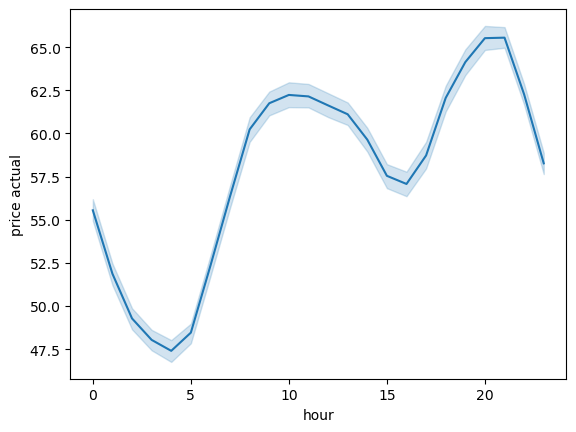

In [78]:
energy_data['hour'] = energy_data.index.hour
#print(eng_mini.head())
sns.lineplot(data=energy_data, x=energy_data.hour, y="price actual")

plt.savefig('images/priceactual_lineplot_2015-2018.png')

In [79]:
features = ['total load forecast', 'total load actual', 'price day ahead', 'price actual', 'gen_total']

In [80]:
#Overall Price trens
#Create a df with the average generation for each year-month
price_avg_mo = energy_data.copy()
price_avg_mo.reset_index(inplace=True)

price_avg_mo['year'] = price_avg_mo['time'].dt.year
price_avg_mo['month'] = price_avg_mo['time'].dt.month
price_avg_mo['year_month'] = pd.to_datetime(price_avg_mo[['year', 'month']].assign(day=1)).dt.to_period('M')


price_avg_mo = price_avg_mo.groupby('year_month')[features].mean()
price_avg_mo.head()

total load forecast  total load actual  price day ahead  \
year_month                                                            
2015-01            30120.834677       29998.903664        47.423105   
2015-02            29615.657738       29474.272315        44.199211   
2015-03            28392.890983       28437.179004        46.589125   
2015-04            27453.525000       27440.372905        48.859819   
2015-05            27531.706989       27459.159030        45.522272   

            price actual     gen_total  
year_month                              
2015-01        64.949019  32367.817204  
2015-02        56.383854  32653.075893  
2015-03        55.522463  31096.401077  
2015-04        58.354083  29737.626389  
2015-05        57.294059  30216.337366

In [81]:
#price_avg_mo.reset_index(inplace=True)
price_avg_mo.index = price_avg_mo.index.strftime('%Y-%m')

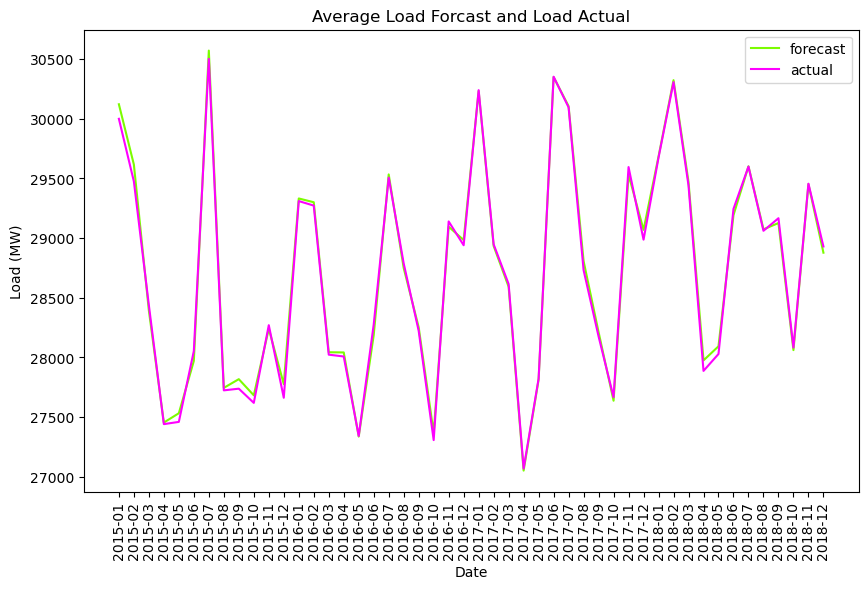

In [82]:
plt.figure(figsize=(10, 6))
plt.plot(price_avg_mo.index, price_avg_mo['total load forecast'], label='forecast', color='lawngreen')
plt.plot(price_avg_mo.index, price_avg_mo['total load actual'], label='actual', color='fuchsia')
plt.xlabel('Date')
plt.ylabel('Load (MW)')
plt.title('Average Load Forcast and Load Actual')
plt.xticks(rotation=90)
plt.legend()

plt.savefig('images/avg_load_fore_actual_monthly_2015-2018.png', bbox_inches='tight')

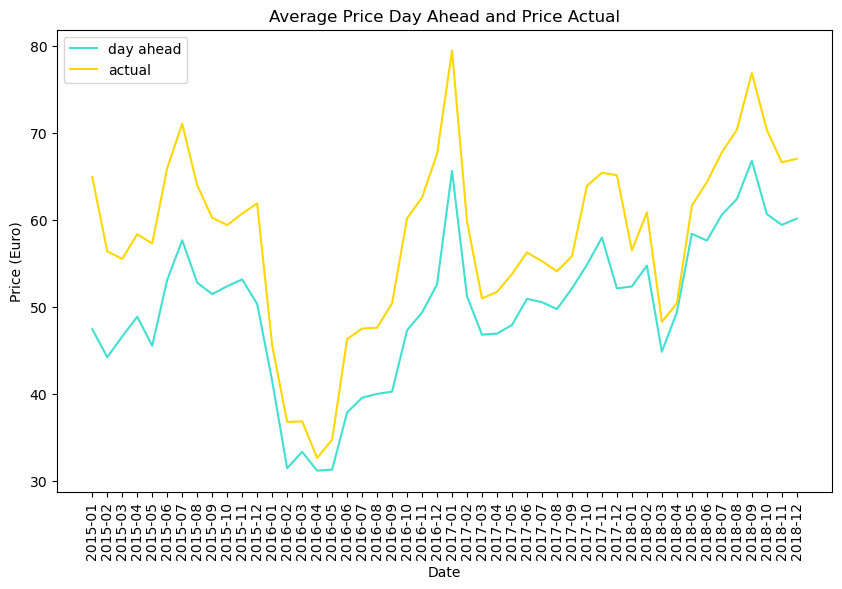

In [83]:
plt.figure(figsize=(10, 6))
plt.plot(price_avg_mo.index, price_avg_mo['price day ahead'], label='day ahead', color='turquoise')
plt.plot(price_avg_mo.index, price_avg_mo['price actual'], label='actual', color='gold')
plt.xlabel('Date')
plt.ylabel('Price (Euro)')
plt.title('Average Price Day Ahead and Price Actual')
plt.xticks(rotation=90)
plt.legend()

plt.savefig('images/avg_price_dayahead_actual_monthly_2015-2018.png', bbox_inches='tight')

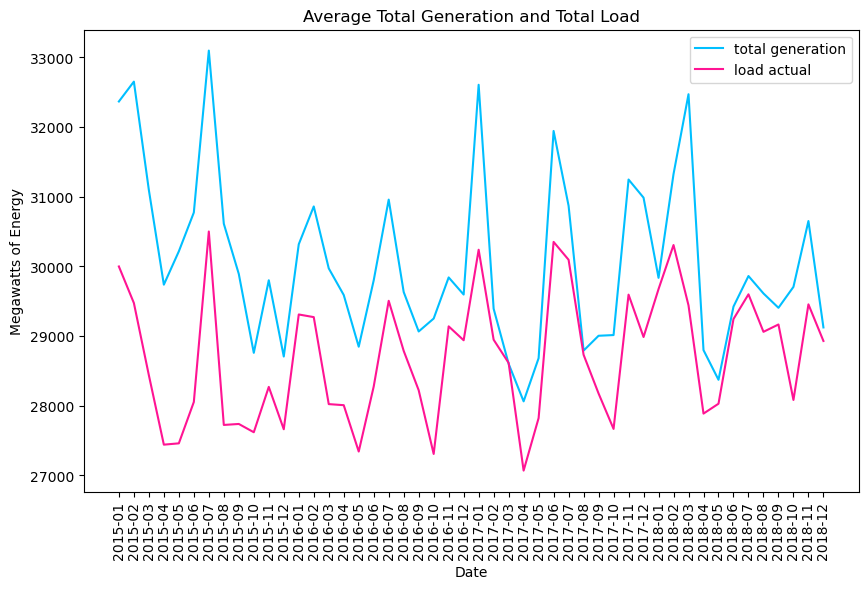

In [84]:
plt.figure(figsize=(10, 6))
plt.plot(price_avg_mo.index, price_avg_mo['gen_total'], label='total generation', color='deepskyblue')
plt.plot(price_avg_mo.index, price_avg_mo['total load actual'], label='load actual', color='deeppink')
plt.xlabel('Date')
plt.ylabel('Megawatts of Energy')
plt.title('Average Total Generation and Total Load')
plt.xticks(rotation=90)
plt.legend()

plt.savefig('images/avg_total_gen_total_load_monthly_2015-2018.png', bbox_inches='tight')

## 4.1 Heatmap of correlations

In [85]:
energy_weather.head()

city_name  temp_daily_max  pressure_daily_max  \
date                                                                       
2015-01-01 01:00:00+01:00  Barcelona       11.452313              1038.0   
2015-01-01 01:00:00+01:00     Bilbao       11.441688              1036.0   
2015-01-01 01:00:00+01:00     Madrid       10.158313              1036.0   
2015-01-01 01:00:00+01:00    Seville       13.844000              1043.0   
2015-01-01 01:00:00+01:00   Valencia       12.127344              1035.0   

                           humidity_daily_max  wind_speed_daily_max  \
date                                                                  
2015-01-01 01:00:00+01:00               100.0                   7.0   
2015-01-01 01:00:00+01:00                97.0                   1.0   
2015-01-01 01:00:00+01:00                75.0                   1.0   
2015-01-01 01:00:00+01:00                84.0                   4.0   
2015-01-01 01:00:00+01:00                84.0                   2.0   

                           rain_1h_daily_max  rain_3h_daily_max  \
date                                                              
2015-01-01 01:00:00+01:00                0.0                0.0   
2015-01-01 01:00:00+01:00                0.0                0.0   
2015-01-01 01:00:00+01:00                0.0                0.0   
2015-01-01 01:00:00+01:00                0.0                0.0   
2015-01-01 01:00:00+01:00                0.0                0.0   

                           snow_3h_daily_max  clouds_all_daily_max  \
date                                                                 
2015-01-01 01:00:00+01:00                0.0                   0.0   
2015-01-01 01:00:00+01:00                0.0                  24.0   
2015-01-01 01:00:00+01:00                0.0                   0.0   
2015-01-01 01:00:00+01:00                0.0                   0.0   
2015-01-01 01:00:00+01:00                0.0                   0.0   

                           generation biomass_daily_max  ...  \
date                                                     ...   
2015-01-01 01:00:00+01:00                         449.0  ...   
2015-01-01 01:00:00+01:00                         449.0  ...   
2015-01-01 01:00:00+01:00                         449.0  ...   
2015-01-01 01:00:00+01:00                         449.0  ...   
2015-01-01 01:00:00+01:00                         449.0  ...   

                           generation wind onshore_daily_max  \
date                                                           
2015-01-01 01:00:00+01:00                             6378.0   
2015-01-01 01:00:00+01:00                             6378.0   
2015-01-01 01:00:00+01:00                             6378.0   
2015-01-01 01:00:00+01:00                             6378.0   
2015-01-01 01:00:00+01:00                             6378.0   

                           forecast solar day ahead_daily_max  \
date                                                            
2015-01-01 01:00:00+01:00                              3842.0   
2015-01-01 01:00:00+01:00                              3842.0   
2015-01-01 01:00:00+01:00                              3842.0   
2015-01-01 01:00:00+01:00                              3842.0   
2015-01-01 01:00:00+01:00                              3842.0   

                           forecast wind onshore day ahead_daily_max  \
date                                                                   
2015-01-01 01:00:00+01:00                                     6436.0   
2015-01-01 01:00:00+01:00                                     6436.0   
2015-01-01 01:00:00+01:00                                     6436.0   
2015-01-01 01:00:00+01:00                                     6436.0   
2015-01-01 01:00:00+01:00                                     6436.0   

                           total load forecast_daily_max  \
date                                                       
2015-01-01 01:00:00+01:00                        30739.0

In [86]:
ew_nulls = energy_weather.isnull().sum().sort_values(ascending=False)
ew_nulls

city_name                                                0
temp_daily_max                                           0
month                                                    0
gen_total_daily_max                                      0
price actual_daily_max                                   0
price day ahead_daily_max                                0
total load actual_daily_max                              0
total load forecast_daily_max                            0
forecast wind onshore day ahead_daily_max                0
forecast solar day ahead_daily_max                       0
generation wind onshore_daily_max                        0
generation waste_daily_max                               0
generation solar_daily_max                               0
generation other renewable_daily_max                     0
generation other_daily_max                               0
generation nuclear_daily_max                             0
generation hydro water reservoir_daily_max              

In [87]:
#Encode categorical features (city_name, day_of_week)
ew_encode = pd.get_dummies(energy_weather)
ew_encode.head(20)

temp_daily_max  pressure_daily_max  \
date                                                            
2015-01-01 01:00:00+01:00       11.452313              1038.0   
2015-01-01 01:00:00+01:00       11.441688              1036.0   
2015-01-01 01:00:00+01:00       10.158313              1036.0   
2015-01-01 01:00:00+01:00       13.844000              1043.0   
2015-01-01 01:00:00+01:00       12.127344              1035.0   
2015-01-02 01:00:00+01:00       13.178688              1039.0   
2015-01-02 01:00:00+01:00       11.695344              1038.0   
2015-01-02 01:00:00+01:00       11.795344              1038.0   
2015-01-02 01:00:00+01:00       13.714313              1045.0   
2015-01-02 01:00:00+01:00       14.403688              1037.0   
2015-01-03 01:00:00+01:00       13.998000              1037.0   
2015-01-03 01:00:00+01:00       11.659000              1037.0   
2015-01-03 01:00:00+01:00       12.587000              1036.0   
2015-01-03 01:00:00+01:00       14.823000              1045.0   
2015-01-03 01:00:00+01:00       17.173000              1032.0   
2015-01-04 01:00:00+01:00       16.900000              1030.0   
2015-01-04 01:00:00+01:00        9.285000              1037.0   
2015-01-04 01:00:00+01:00       13.492000              1002.0   
2015-01-04 01:00:00+01:00       16.342000              1042.0   
2015-01-04 01:00:00+01:00       16.592000              1018.0   

                           humidity_daily_max  wind_speed_daily_max  \
date                                                                  
2015-01-01 01:00:00+01:00               100.0                   7.0   
2015-01-01 01:00:00+01:00                97.0                   1.0   
2015-01-01 01:00:00+01:00                75.0                   1.0   
2015-01-01 01:00:00+01:00                84.0                   4.0   
2015-01-01 01:00:00+01:00                84.0                   2.0   
2015-01-02 01:00:00+01:00               100.0                   2.0   
2015-01-02 01:00:00+01:00                95.0                   2.0   
2015-01-02 01:00:00+01:00                79.0                   1.0   
2015-01-02 01:00:00+01:00                89.0                   4.0   
2015-01-02 01:00:00+01:00                82.0                   2.0   
2015-01-03 01:00:00+01:00               100.0                   3.0   
2015-01-03 01:00:00+01:00                97.0                   1.0   
2015-01-03 01:00:00+01:00                86.0                   2.0   
2015-01-03 01:00:00+01:00                90.0                   3.0   
2015-01-03 01:00:00+01:00                80.0                   2.0   
2015-01-04 01:00:00+01:00                89.0                   3.0   
2015-01-04 01:00:00+01:00                98.0                   1.0   
2015-01-04 01:00:00+01:00                78.0                   1.0   
2015-01-04 01:00:00+01:00                87.0                   4.0   
2015-01-04 01:00:00+01:00                92.0                   2.0   

                           rain_1h_daily_max  rain_3h_daily_max  \
date                                                              
2015-01-01 01:00:00+01:00                0.0                0.0   
2015-01-01 01:00:00+01:00                0.0                0.0   
2015-01-01 01:00:00+01:00                0.0                0.0   
2015-01-01 01:00:00+01:00                0.0                0.0   
2015-01-01 01:00:00+01:00                0.0                0.0   
2015-01-02 01:00:00+01:00                0.0                0.0   
2015-01-02 01:00:00+01:00                0.0                0.0   
2015-01-02 01:00:00+01:00                0.0                0.0   
2015-01-02 01:00:00+01:00                0.0                0.0   
2015-01-02 01:00:00+01:00                0.0                0.0   
2015-01-03 01:00:00+01:00                0.0                0.0   
2015-01-03 01:00:00+01:00                0.0                0.0   
2015-01-03 01:00:00+01:00                0.0                0.0   
2015-01-03 01:00:00+01:00   

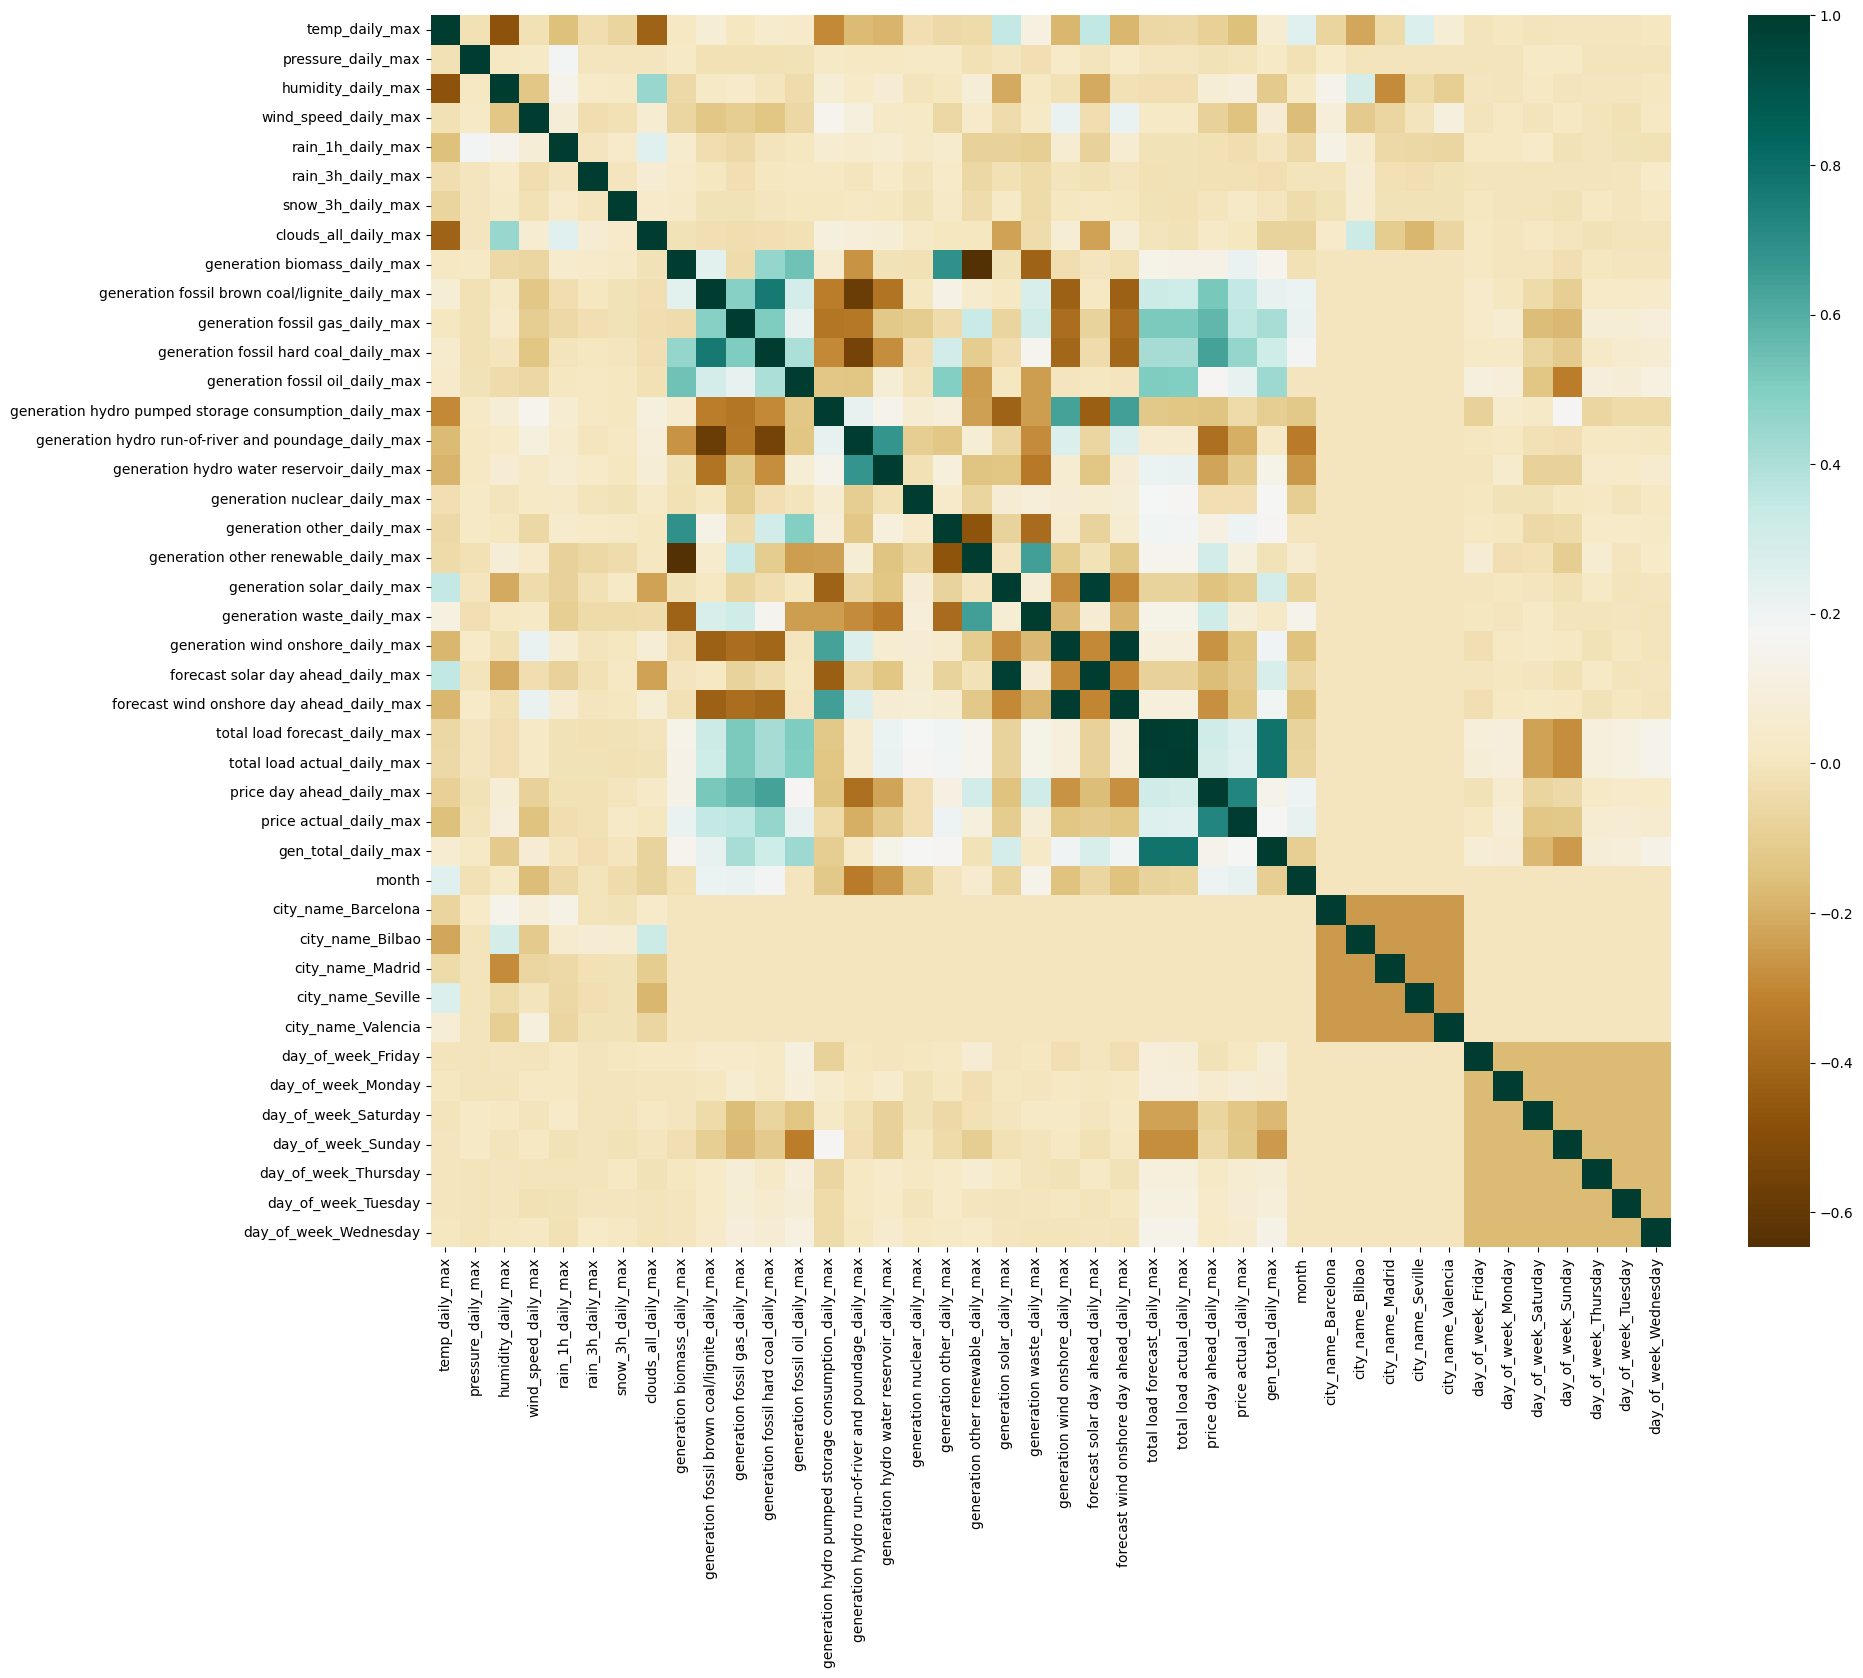

In [88]:
plt.figure(figsize=(20,16))
sns.heatmap(ew_encode.corr(), cmap='BrBG')
#sns.set(font_scale=0.5)
#plt.xticks(fontsize=6)
#plt.yticks(fontsize=6)

plt.savefig('images/energy_weather_heatmap.png', bbox_inches='tight')

In [81]:
# sns.pairplot(data=ew_encode)
# plt.savefig('images/energy_weather_pairplot.png')

In [82]:
ew_encode.columns

Index(['temp_daily_max', 'pressure_daily_max', 'humidity_daily_max',
       'wind_speed_daily_max', 'rain_1h_daily_max', 'rain_3h_daily_max',
       'snow_3h_daily_max', 'clouds_all_daily_max',
       'generation biomass_daily_max',
       'generation fossil brown coal/lignite_daily_max',
       'generation fossil gas_daily_max',
       'generation fossil hard coal_daily_max',
       'generation fossil oil_daily_max',
       'generation hydro pumped storage consumption_daily_max',
       'generation hydro run-of-river and poundage_daily_max',
       'generation hydro water reservoir_daily_max',
       'generation nuclear_daily_max', 'generation other_daily_max',
       'generation other renewable_daily_max', 'generation solar_daily_max',
       'generation waste_daily_max', 'generation wind onshore_daily_max',
       'forecast solar day ahead_daily_max',
       'forecast wind onshore day ahead_daily_max',
       'total load forecast_daily_max', 'total load actual_daily_max',
       'pr

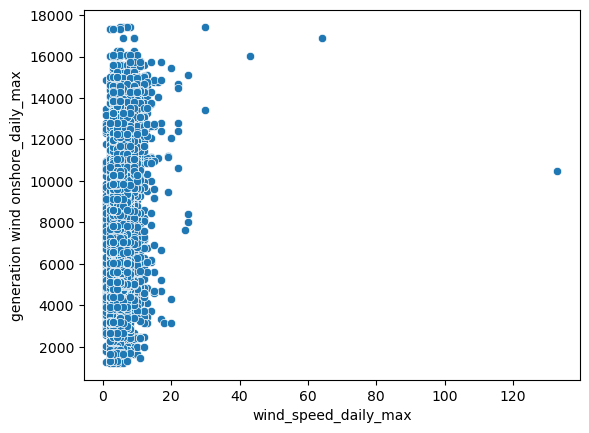

In [83]:
sns.scatterplot(data=ew_encode, x='wind_speed_daily_max', y='generation wind onshore_daily_max')
plt.savefig('images/scatter_windonshore_windspeed.png')

In [84]:
isinstance(ew_encode, pd.DataFrame)

True

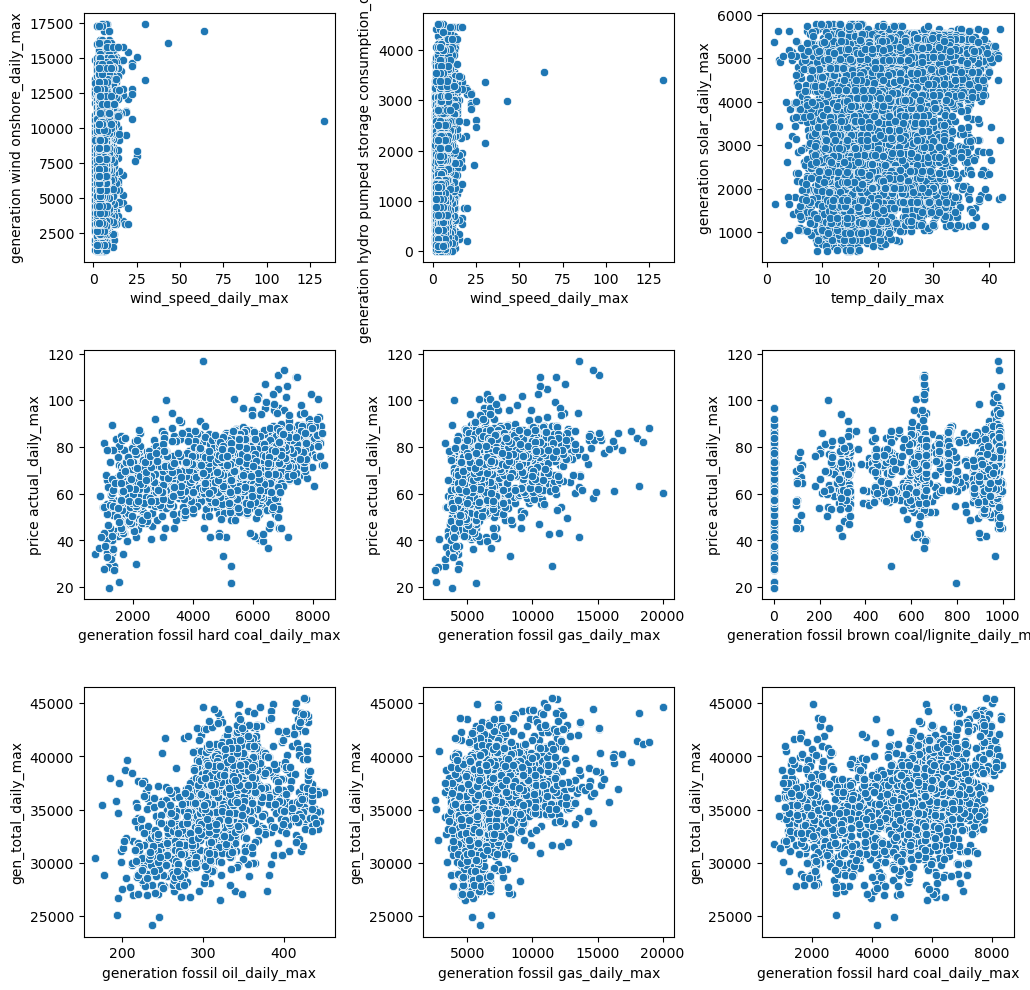

In [85]:
fig, axes = plt.subplots(3, 3, figsize=(12,12))
sns.scatterplot(data=ew_encode, x='wind_speed_daily_max', y='generation wind onshore_daily_max', ax=axes[0][0])
sns.scatterplot(data=ew_encode, x='wind_speed_daily_max', y='generation hydro pumped storage consumption_daily_max', ax=axes[0][1])
sns.scatterplot(data=ew_encode, x='temp_daily_max', y='generation solar_daily_max', ax=axes[0][2])

sns.scatterplot(data=ew_encode, x='generation fossil hard coal_daily_max', y='price actual_daily_max', ax=axes[1][0])
sns.scatterplot(data=ew_encode, x='generation fossil gas_daily_max', y='price actual_daily_max', ax=axes[1][1])
sns.scatterplot(data=ew_encode, x='generation fossil brown coal/lignite_daily_max', y='price actual_daily_max', ax=axes[1][2])

sns.scatterplot(data=ew_encode, x='generation fossil oil_daily_max', y='gen_total_daily_max', ax=axes[2][0])
sns.scatterplot(data=ew_encode, x='generation fossil gas_daily_max', y='gen_total_daily_max', ax=axes[2][1])
sns.scatterplot(data=ew_encode, x='generation fossil hard coal_daily_max', y='gen_total_daily_max', ax=axes[2][2])

plt.subplots_adjust(wspace=0.35, hspace=0.35)
plt.tight_layout

plt.savefig('images/scatter_various_energy_weather.png')

## Correlations

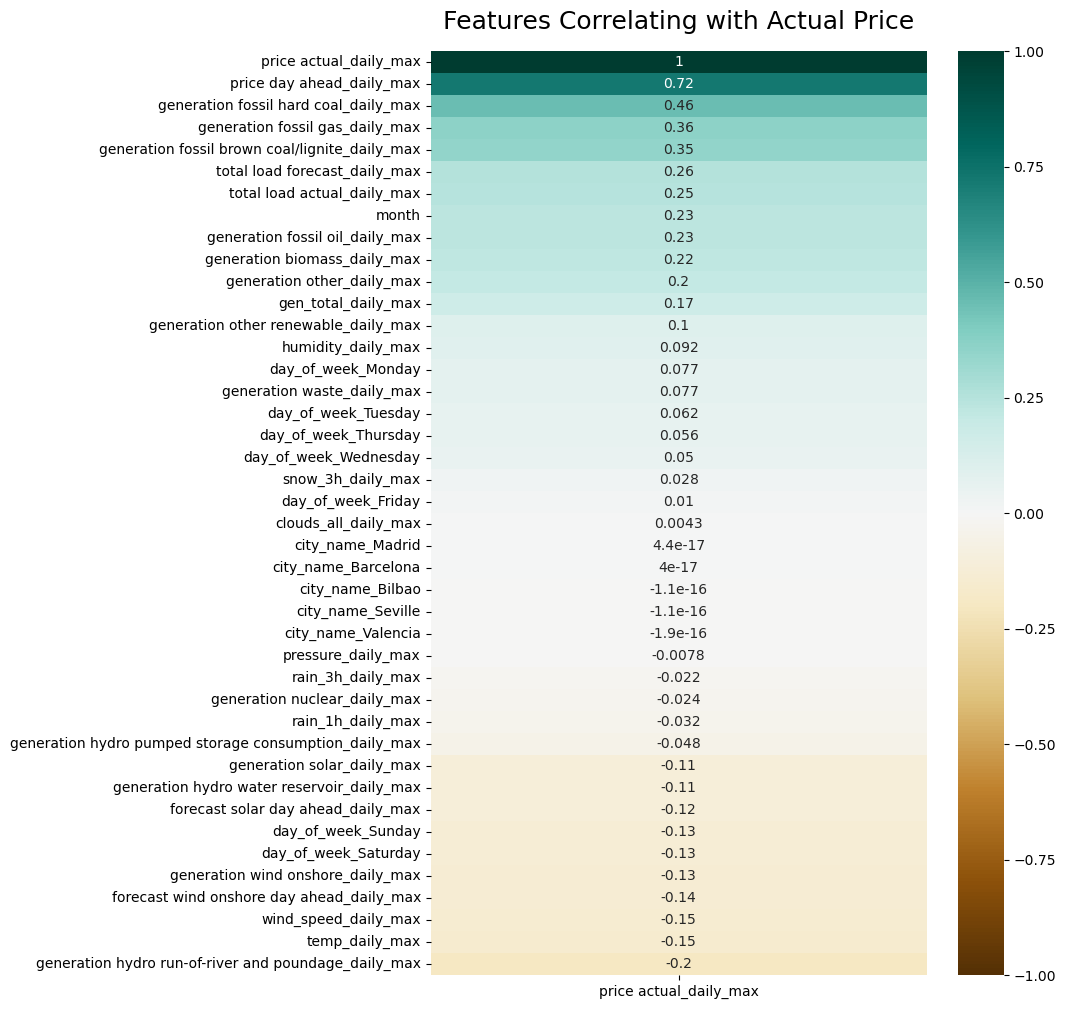

In [94]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(ew_encode.corr()[['price actual_daily_max']].sort_values(by='price actual_daily_max', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Actual Price', fontdict={'fontsize':18}, pad=16);
plt.tight_layout

plt.savefig('images/features_correlating_with_actualprice.png', bbox_inches='tight')

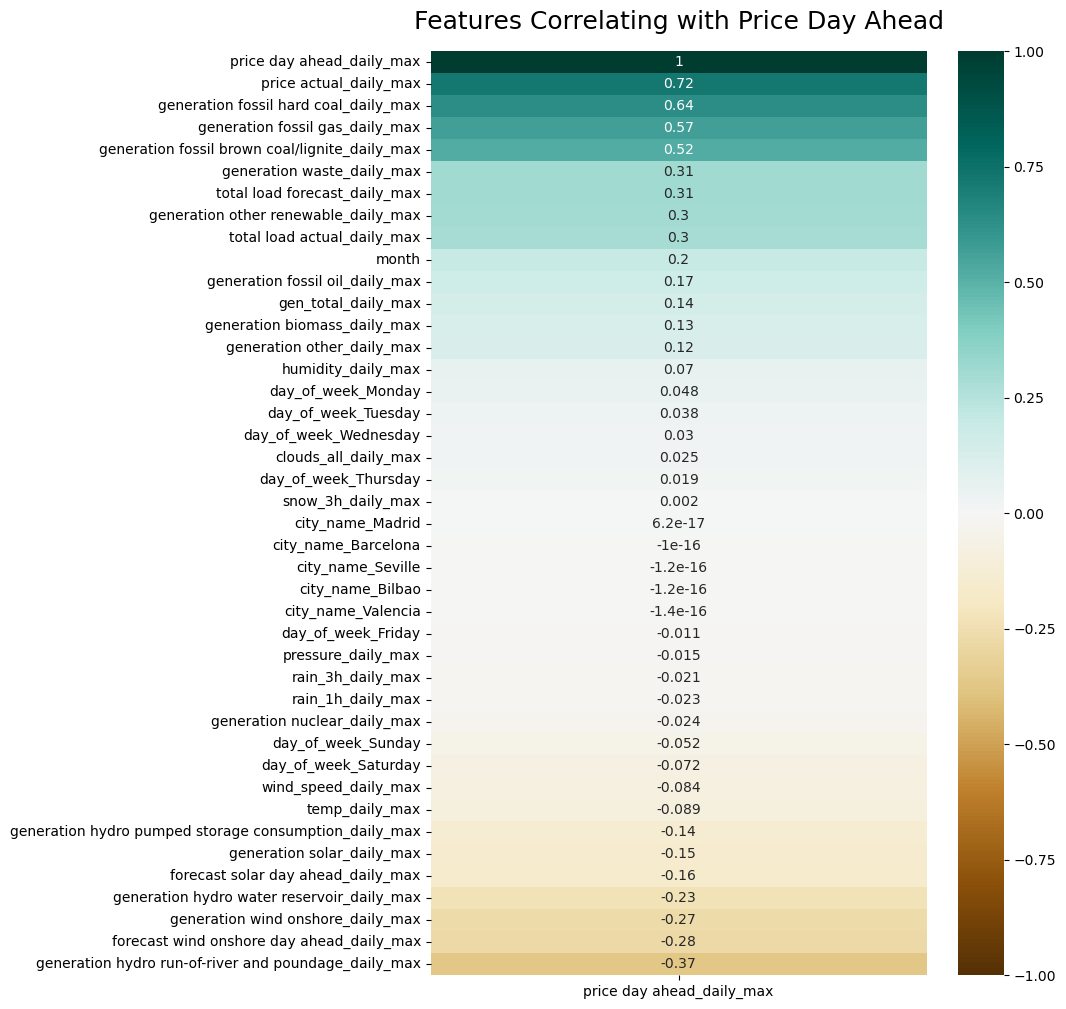

In [95]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(ew_encode.corr()[['price day ahead_daily_max']].sort_values(by='price day ahead_daily_max', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Price Day Ahead', fontdict={'fontsize':18}, pad=16);
plt.tight_layout

plt.savefig('images/features_correlating_with_pricedayahead.png', bbox_inches='tight')

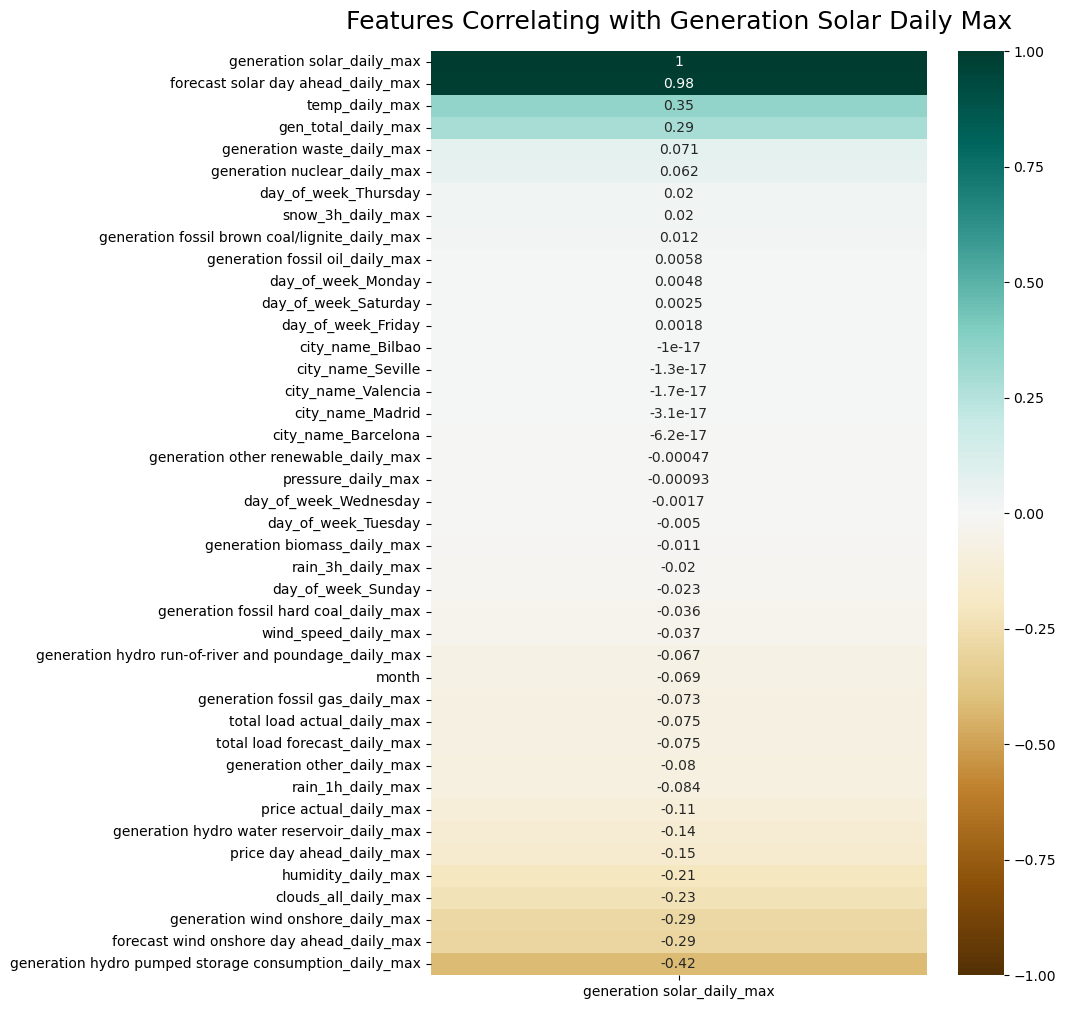

In [96]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(ew_encode.corr()[['generation solar_daily_max']].sort_values(by='generation solar_daily_max', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Generation Solar Daily Max', fontdict={'fontsize':18}, pad=16);
plt.tight_layout

plt.savefig('images/features_correlating_with_gensolardailymax.png', bbox_inches='tight')

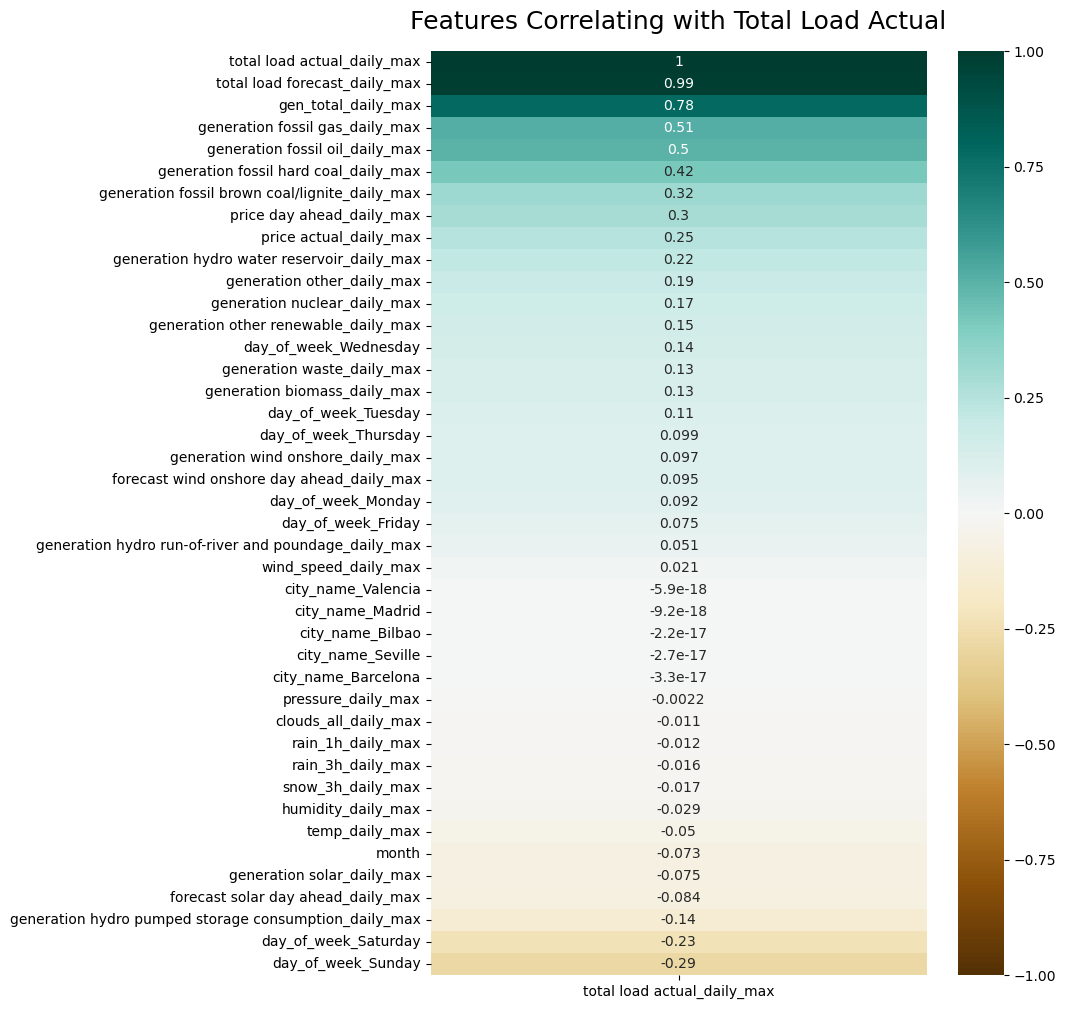

In [97]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(ew_encode.corr()[['total load actual_daily_max']].sort_values(by='total load actual_daily_max', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Total Load Actual', fontdict={'fontsize':18}, pad=16);
plt.tight_layout

plt.savefig('images/features_correlating_with_totalloadactual.png', bbox_inches='tight')

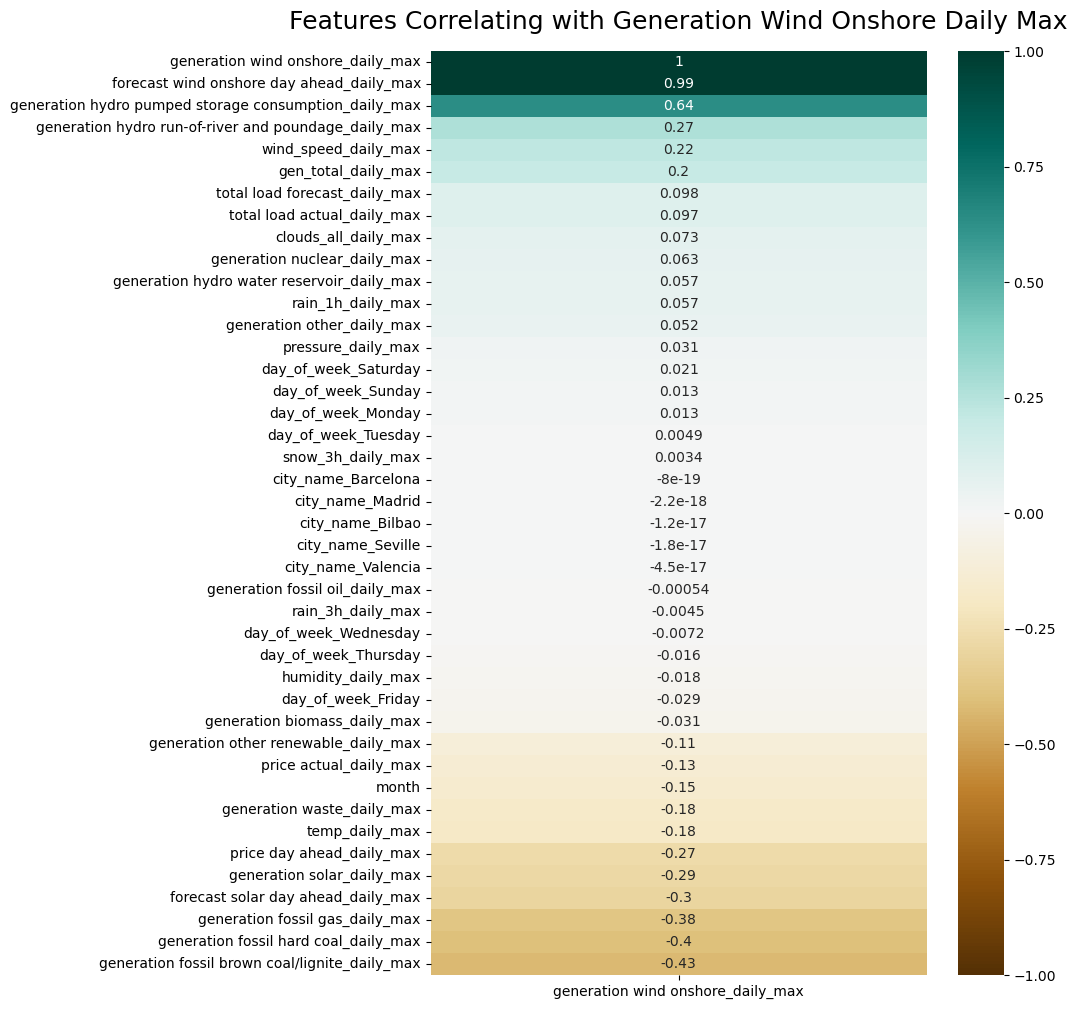

In [98]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(ew_encode.corr()[['generation wind onshore_daily_max']].sort_values(by='generation wind onshore_daily_max', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Generation Wind Onshore Daily Max', fontdict={'fontsize':18}, pad=16);
plt.tight_layout

plt.savefig('images/features_correlating_with_windonshoredialymax.png', bbox_inches='tight')

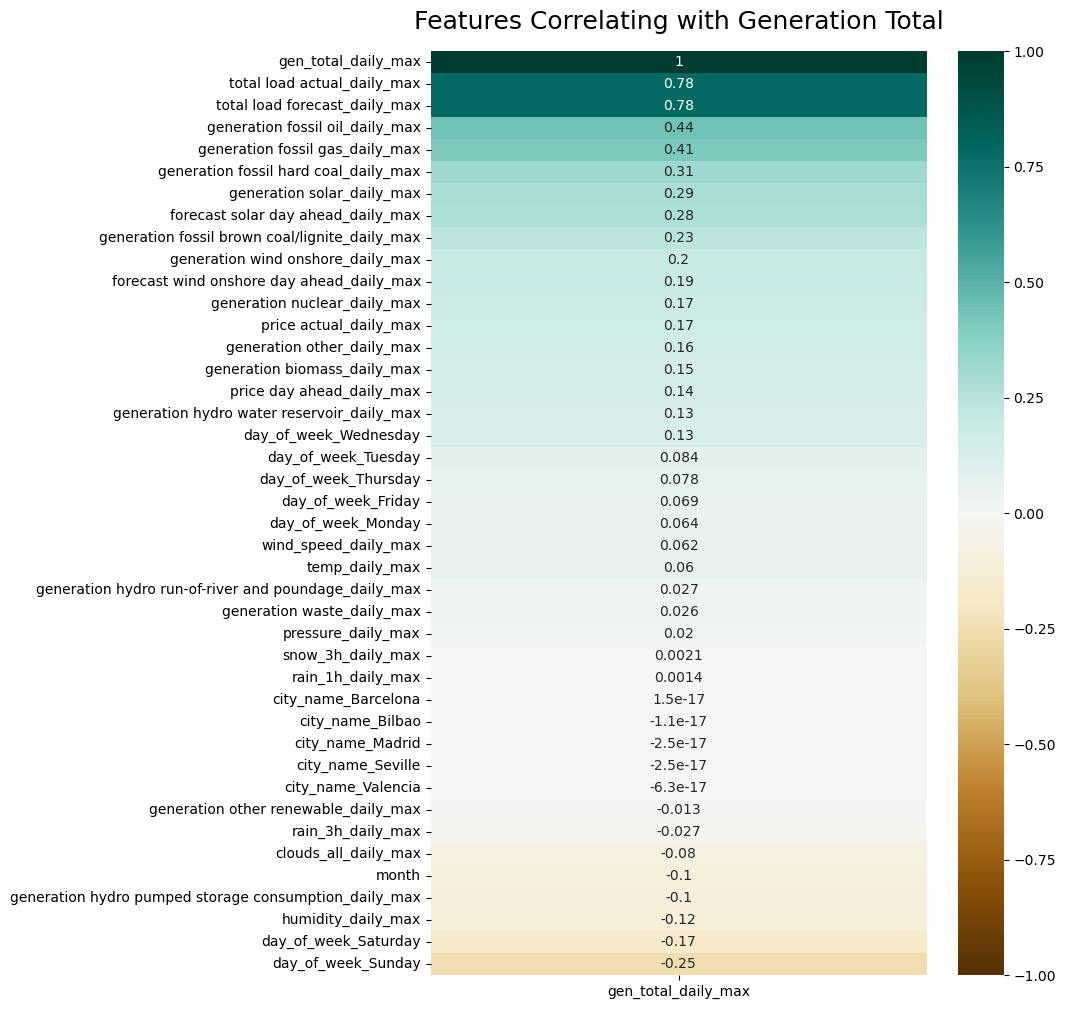

In [99]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(ew_encode.corr()[['gen_total_daily_max']].sort_values(by='gen_total_daily_max', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Generation Total', fontdict={'fontsize':18}, pad=16);
plt.tight_layout

plt.savefig('images/features_correlating_with_generationtotal.png', bbox_inches='tight')

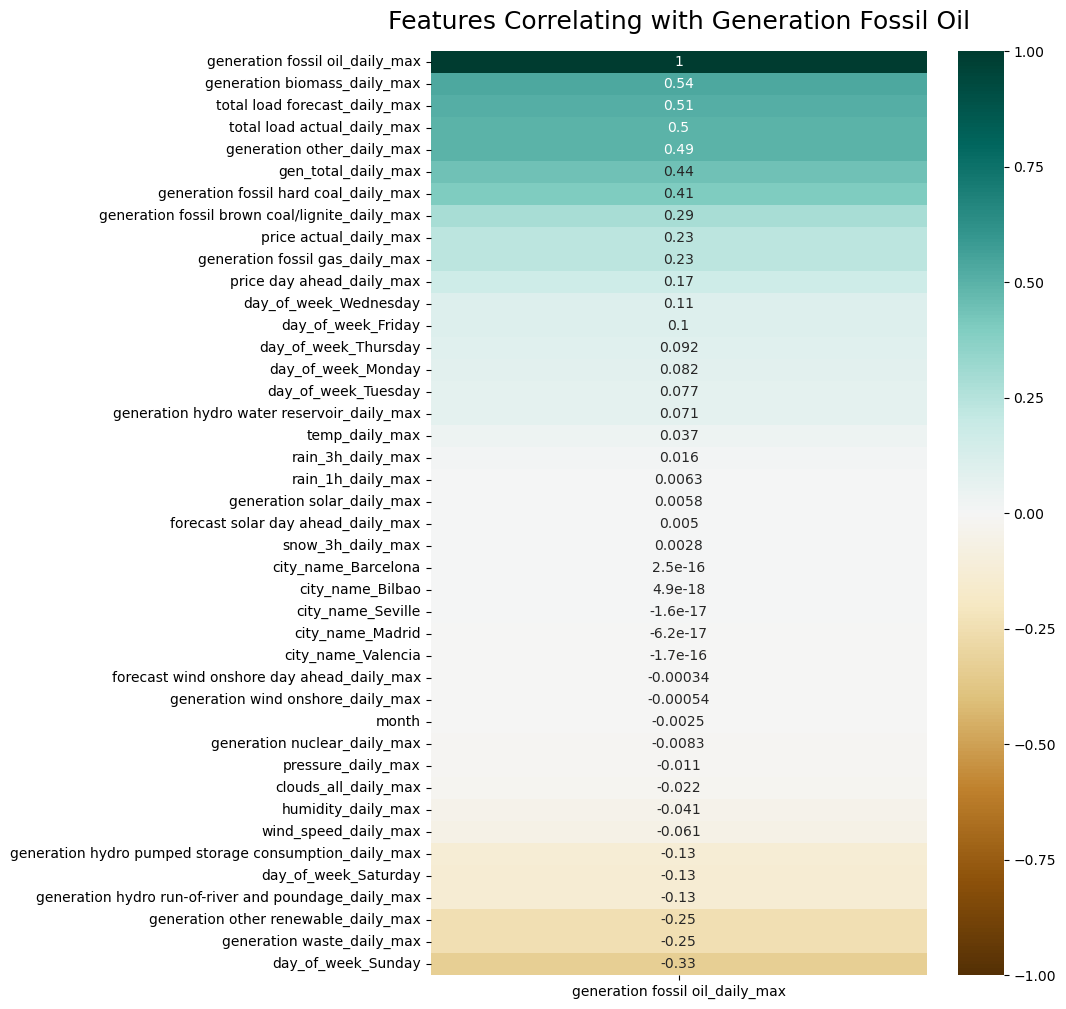

In [100]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(ew_encode.corr()[['generation fossil oil_daily_max']].sort_values(by='generation fossil oil_daily_max', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Generation Fossil Oil', fontdict={'fontsize':18}, pad=16);
plt.tight_layout

plt.savefig('images/features_correlating_with_genfossiloil.png', bbox_inches='tight')

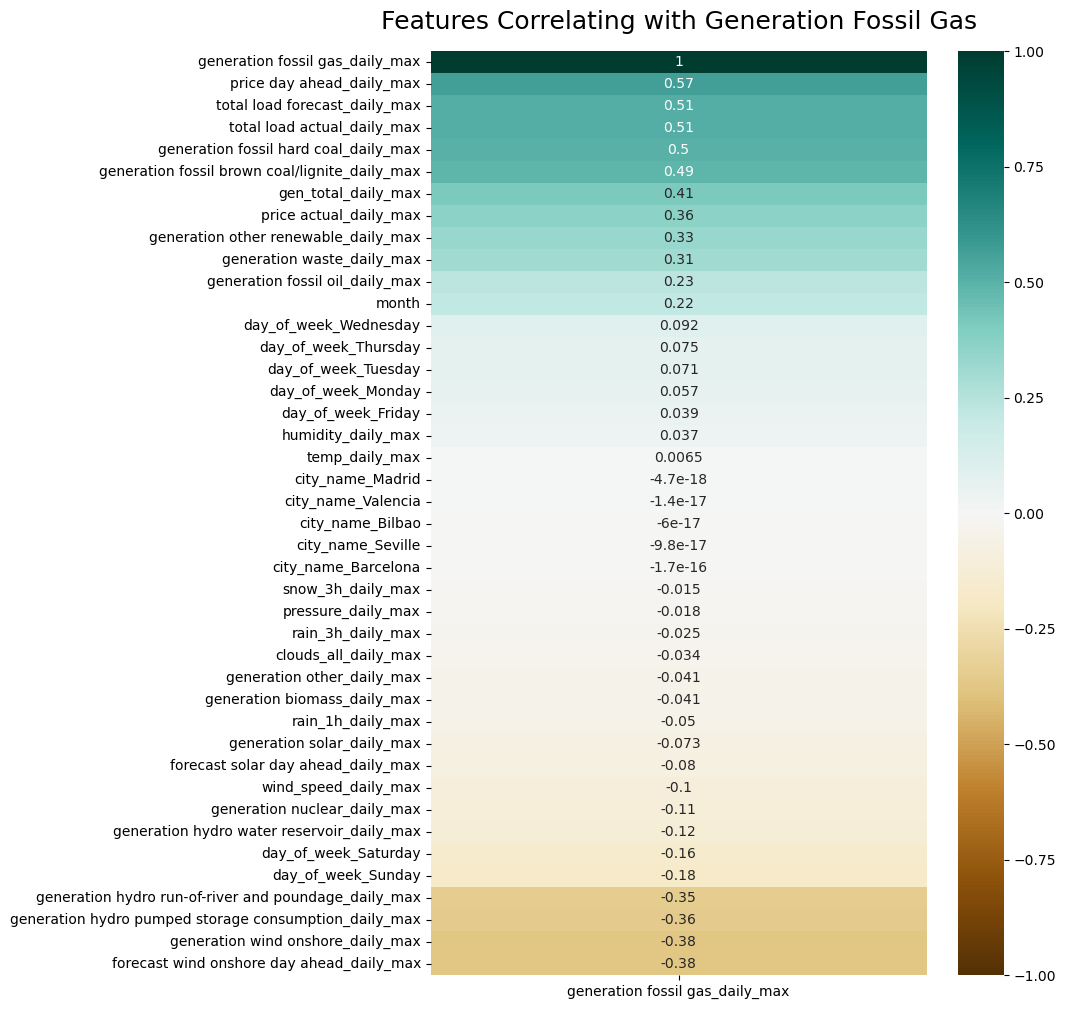

In [101]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(ew_encode.corr()[['generation fossil gas_daily_max']].sort_values(by='generation fossil gas_daily_max', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Generation Fossil Gas', fontdict={'fontsize':18}, pad=16);
plt.tight_layout

plt.savefig('images/features_correlating_with_genfossilgas.png', bbox_inches='tight')

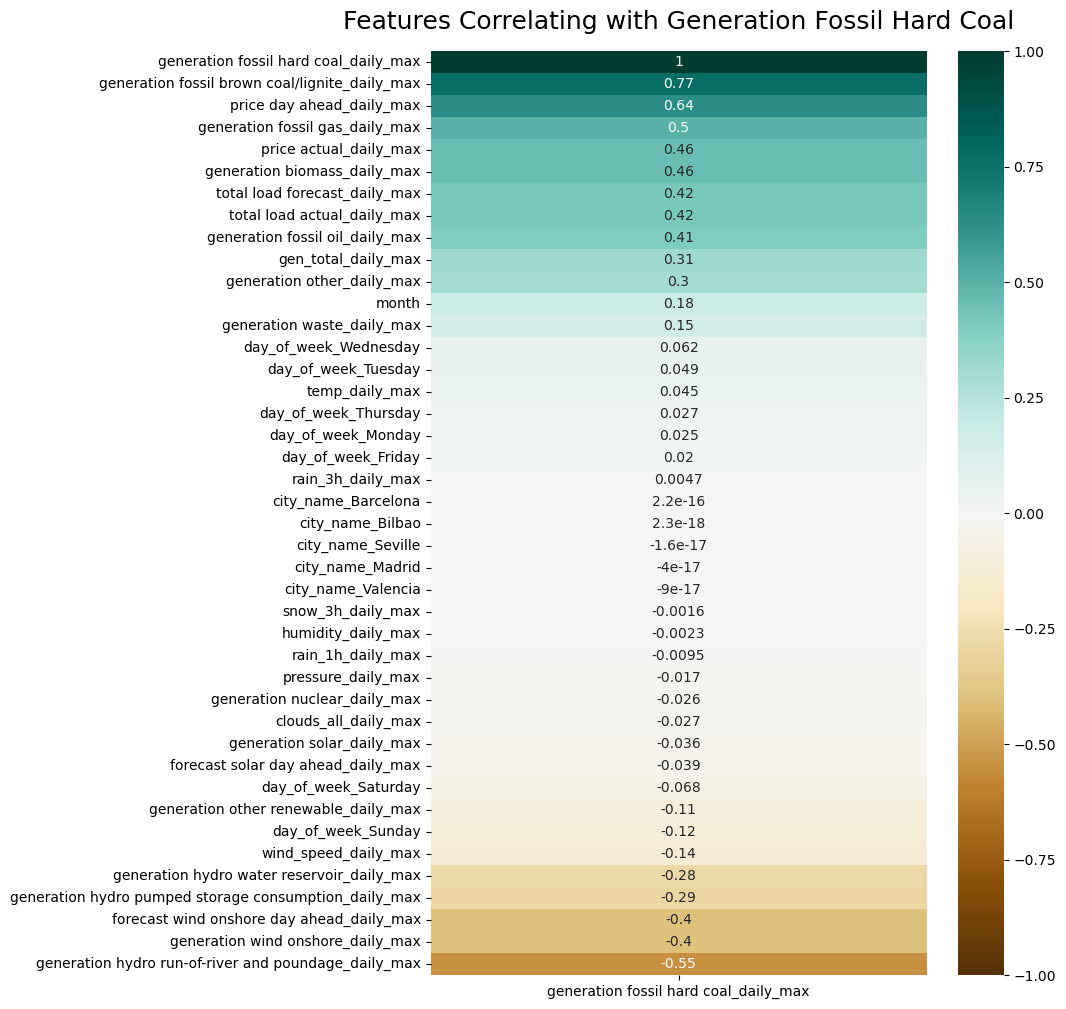

In [102]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(ew_encode.corr()[['generation fossil hard coal_daily_max']].sort_values(by='generation fossil hard coal_daily_max', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Generation Fossil Hard Coal', fontdict={'fontsize':18}, pad=16);
plt.tight_layout

plt.savefig('images/features_correlating_with_genfossilhardcoal.png', bbox_inches='tight')

## 3.2 Visualizing day ahead or forcast v. actual

<b>Graph - solar & solar day ahead, wind and wind day ahead, load forcast and load actual, price day ahead and price actual</b>

In [115]:
eng_grouped_max.shape

(1461, 23)

In [116]:
eng_grouped_max.head()

generation biomass_daily_max  \
date                                                      
2015-01-01 01:00:00+01:00                         449.0   
2015-01-02 01:00:00+01:00                         443.0   
2015-01-03 01:00:00+01:00                         478.0   
2015-01-04 01:00:00+01:00                         438.0   
2015-01-05 01:00:00+01:00                         376.0   

                           generation fossil brown coal/lignite_daily_max  \
date                                                                        
2015-01-01 01:00:00+01:00                                           329.0   
2015-01-02 01:00:00+01:00                                             0.0   
2015-01-03 01:00:00+01:00                                             0.0   
2015-01-04 01:00:00+01:00                                             0.0   
2015-01-05 01:00:00+01:00                                           326.0   

                           generation fossil gas_daily_max  \
date                                                         
2015-01-01 01:00:00+01:00                           5196.0   
2015-01-02 01:00:00+01:00                           6082.0   
2015-01-03 01:00:00+01:00                           4157.0   
2015-01-04 01:00:00+01:00                           3997.0   
2015-01-05 01:00:00+01:00                           5699.0   

                           generation fossil hard coal_daily_max  \
date                                                               
2015-01-01 01:00:00+01:00                                 5043.0   
2015-01-02 01:00:00+01:00                                 1432.0   
2015-01-03 01:00:00+01:00                                 1798.0   
2015-01-04 01:00:00+01:00                                 2755.0   
2015-01-05 01:00:00+01:00                                 4247.0   

                           generation fossil oil_daily_max  \
date                                                         
2015-01-01 01:00:00+01:00                            167.0   
2015-01-02 01:00:00+01:00                            220.0   
2015-01-03 01:00:00+01:00                            250.0   
2015-01-04 01:00:00+01:00                            394.0   
2015-01-05 01:00:00+01:00                            352.0   

                           generation hydro pumped storage consumption_daily_max  \
date                                                                               
2015-01-01 01:00:00+01:00                                             2170.0       
2015-01-02 01:00:00+01:00                                             3269.0       
2015-01-03 01:00:00+01:00                                             2953.0       
2015-01-04 01:00:00+01:00                                             2185.0       
2015-01-05 01:00:00+01:00                                             2365.0       

                           generation hydro run-of-river and poundage_daily_max  \
date                                                                              
2015-01-01 01:00:00+01:00                                             1220.0      
2015-01-02 01:00:00+01:00                                             1370.0      
2015-01-03 01:00:00+01:00                                             1583.0      
2015-01-04 01:00:00+01:00                                             1616.0      
2015-01-05 01:00:00+01:00                                             1328.0      

                           generation hydro water reservoir_daily_max  \
date                                                                    
2015-01-01 01:00:00+01:00                                      6231.0   
2015-01-02 01:00:00+01:00                                      5902.0   
2015-01-03 01:00:00+01:00                                      5985.0   
2015-01-04 01:00:00+01:00                                      5936.0   
2015-01-05 01:00:00+01:00                                      3732.0   

                           generation nucle

In [117]:
df_price = eng_grouped_max[['price day ahead_daily_max', 'price actual_daily_max']]
df_price.reset_index(inplace=True)
df_price.head()

date  price day ahead_daily_max  price actual_daily_max
0 2015-01-01 01:00:00+01:00                      62.69                   75.64
1 2015-01-02 01:00:00+01:00                      52.01                   83.33
2 2015-01-03 01:00:00+01:00                      44.00                   72.86
3 2015-01-04 01:00:00+01:00                      40.48                   76.49
4 2015-01-05 01:00:00+01:00                      62.00                   90.97

In [118]:
df_melt = pd.melt(df_price, id_vars=['date'])
df_melt

date                   variable  value
0    2015-01-01 01:00:00+01:00  price day ahead_daily_max  62.69
1    2015-01-02 01:00:00+01:00  price day ahead_daily_max  52.01
2    2015-01-03 01:00:00+01:00  price day ahead_daily_max  44.00
3    2015-01-04 01:00:00+01:00  price day ahead_daily_max  40.48
4    2015-01-05 01:00:00+01:00  price day ahead_daily_max  62.00
...                        ...                        ...    ...
2917 2018-12-27 01:00:00+01:00     price actual_daily_max  81.12
2918 2018-12-28 01:00:00+01:00     price actual_daily_max  78.26
2919 2018-12-29 01:00:00+01:00     price actual_daily_max  71.01
2920 2018-12-30 01:00:00+01:00     price actual_daily_max  73.64
2921 2018-12-31 01:00:00+01:00     price actual_daily_max  77.61

[2922 rows x 3 columns]

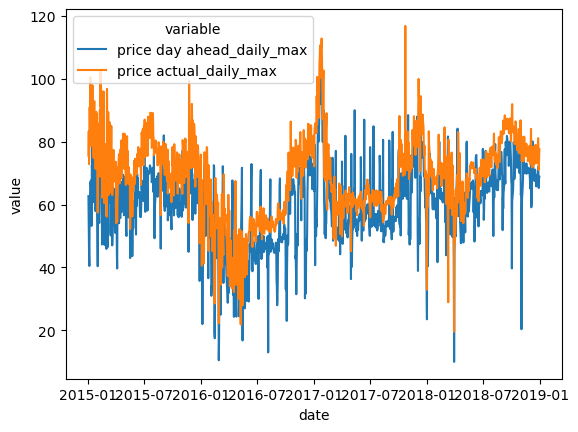

In [119]:
sns.lineplot(df_melt, x='date', y='value', hue='variable')
plt.savefig('images/lineplot_pricedayahead_actual.png')

C:\Users\keral\AppData\Local\Temp\ipykernel_10380\1187919852.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_price['price_diff'] = df_price['price actual_daily_max']-df_price['price day ahead_daily_max']


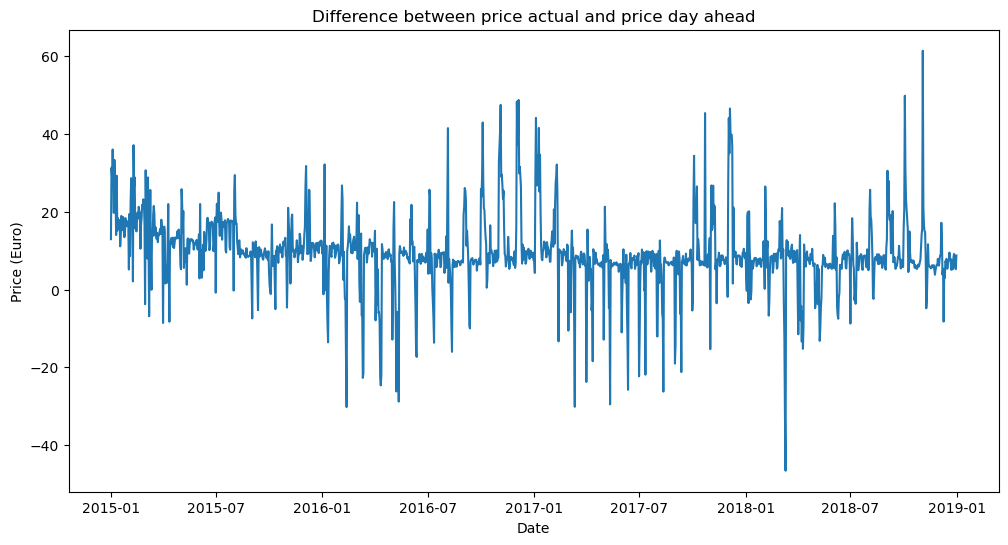

In [121]:
df_price['price_diff'] = df_price['price actual_daily_max']-df_price['price day ahead_daily_max']
fig,ax = plt.subplots(figsize=(12, 6))
sns.lineplot(data=df_price, x='date', y='price_diff')
plt.title('Difference between price actual and price day ahead')
plt.xlabel('Date')
plt.ylabel('Price (Euro)')

plt.savefig('images/diff_pirceactual_pricedayahead.png')

C:\Users\keral\AppData\Local\Temp\ipykernel_10380\3893227285.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_solar['solar_diff'] = df_solar['generation solar_daily_max']-df_solar['forecast solar day ahead_daily_max']


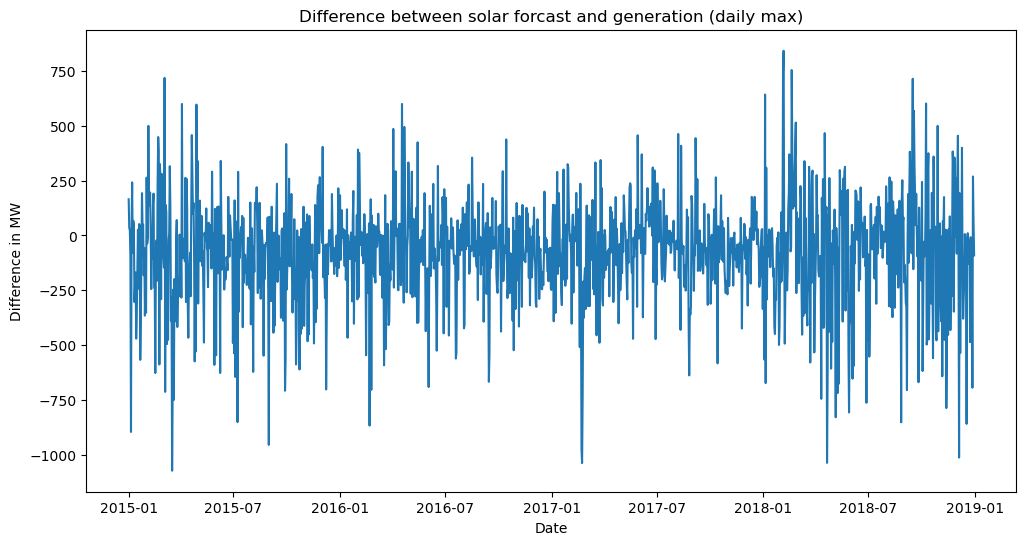

In [122]:
df_solar = eng_grouped_max[['forecast solar day ahead_daily_max', 'generation solar_daily_max']]
df_solar.reset_index(inplace=True)
df_solar.head()
df_solar['solar_diff'] = df_solar['generation solar_daily_max']-df_solar['forecast solar day ahead_daily_max']
fig,ax = plt.subplots(figsize=(12, 6))
sns.lineplot(data=df_solar, x='date', y='solar_diff')
plt.title('Difference between solar forcast and generation (daily max)')
plt.xlabel('Date')
plt.ylabel('Difference in MW')

plt.savefig('images/diff_solarforecast_solargen.png')

C:\Users\keral\AppData\Local\Temp\ipykernel_10380\640698239.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wind['wind_diff'] = df_wind['generation wind onshore_daily_max']-df_wind['forecast wind onshore day ahead_daily_max']


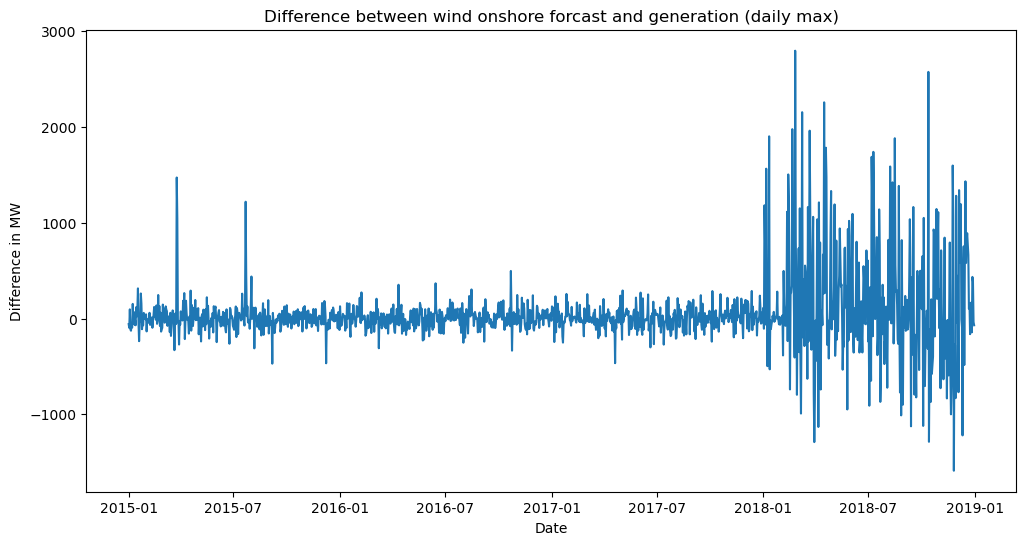

In [123]:
df_wind = eng_grouped_max[['forecast wind onshore day ahead_daily_max', 'generation wind onshore_daily_max']]
df_wind.reset_index(inplace=True)
df_wind.head()
df_wind['wind_diff'] = df_wind['generation wind onshore_daily_max']-df_wind['forecast wind onshore day ahead_daily_max']
fig,ax = plt.subplots(figsize=(12, 6))
sns.lineplot(data=df_wind, x='date', y='wind_diff')
plt.title('Difference between wind onshore forcast and generation (daily max)')
plt.xlabel('Date')
plt.ylabel('Difference in MW')

plt.savefig('images/diff_windonshoreforecast_gen.png')

C:\Users\keral\AppData\Local\Temp\ipykernel_10380\2928826454.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_load['load_diff'] = df_load['total load actual_daily_max']-df_load['total load forecast_daily_max']


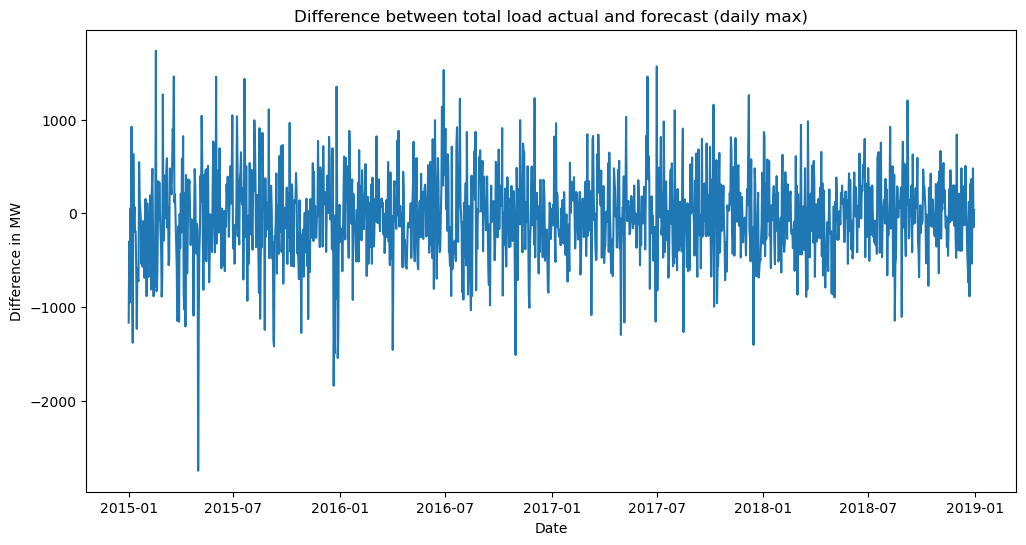

In [124]:
df_load = eng_grouped_max[['total load forecast_daily_max', 'total load actual_daily_max']]
df_load.reset_index(inplace=True)
df_load['load_diff'] = df_load['total load actual_daily_max']-df_load['total load forecast_daily_max']
fig,ax = plt.subplots(figsize=(12, 6))
sns.lineplot(data=df_load, x='date', y='load_diff')
plt.title('Difference between total load actual and forecast (daily max)')
plt.xlabel('Date')
plt.ylabel('Difference in MW')

plt.savefig('images/diff_loadforecast_actual.png')

C:\Users\keral\AppData\Local\Temp\ipykernel_10380\3998605571.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_load_gen['load_gen_diff'] = df_load_gen['gen_total_daily_max']-df_load_gen['total load actual_daily_max']


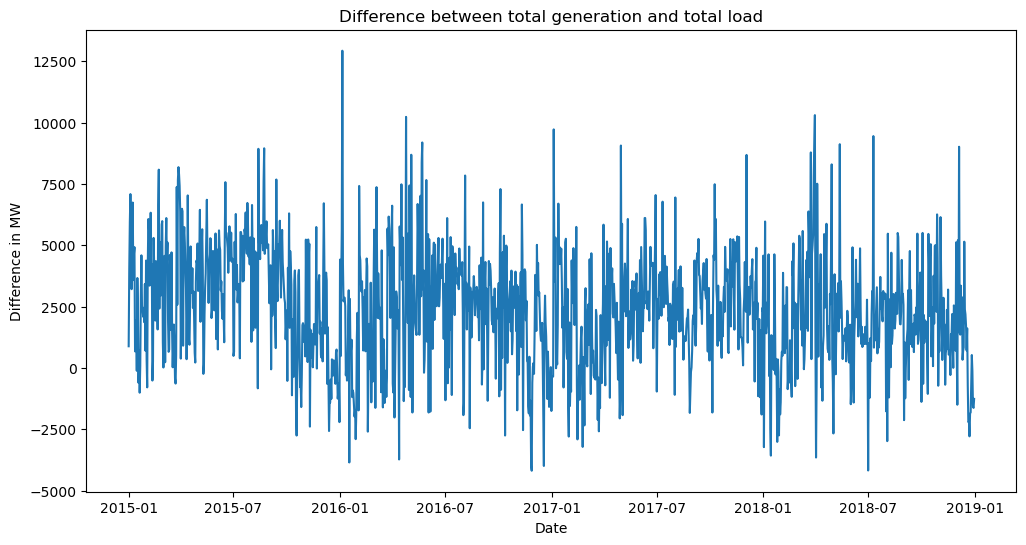

In [125]:
df_load_gen = eng_grouped_max[['gen_total_daily_max', 'total load actual_daily_max']]
df_load.reset_index(inplace=True)
df_load_gen['load_gen_diff'] = df_load_gen['gen_total_daily_max']-df_load_gen['total load actual_daily_max']
fig,ax = plt.subplots(figsize=(12, 6))
sns.lineplot(data=df_load_gen, x='date', y='load_gen_diff')
plt.title('Difference between total generation and total load')
plt.xlabel('Date')
plt.ylabel('Difference in MW')

plt.savefig('images/diff_totalgen_totalload.png')

In [126]:
eng_grouped_max.columns

Index(['generation biomass_daily_max',
       'generation fossil brown coal/lignite_daily_max',
       'generation fossil gas_daily_max',
       'generation fossil hard coal_daily_max',
       'generation fossil oil_daily_max',
       'generation hydro pumped storage consumption_daily_max',
       'generation hydro run-of-river and poundage_daily_max',
       'generation hydro water reservoir_daily_max',
       'generation nuclear_daily_max', 'generation other_daily_max',
       'generation other renewable_daily_max', 'generation solar_daily_max',
       'generation waste_daily_max', 'generation wind onshore_daily_max',
       'forecast solar day ahead_daily_max',
       'forecast wind onshore day ahead_daily_max',
       'total load forecast_daily_max', 'total load actual_daily_max',
       'price day ahead_daily_max', 'price actual_daily_max',
       'gen_total_daily_max', 'month', 'day_of_week'],
      dtype='object')

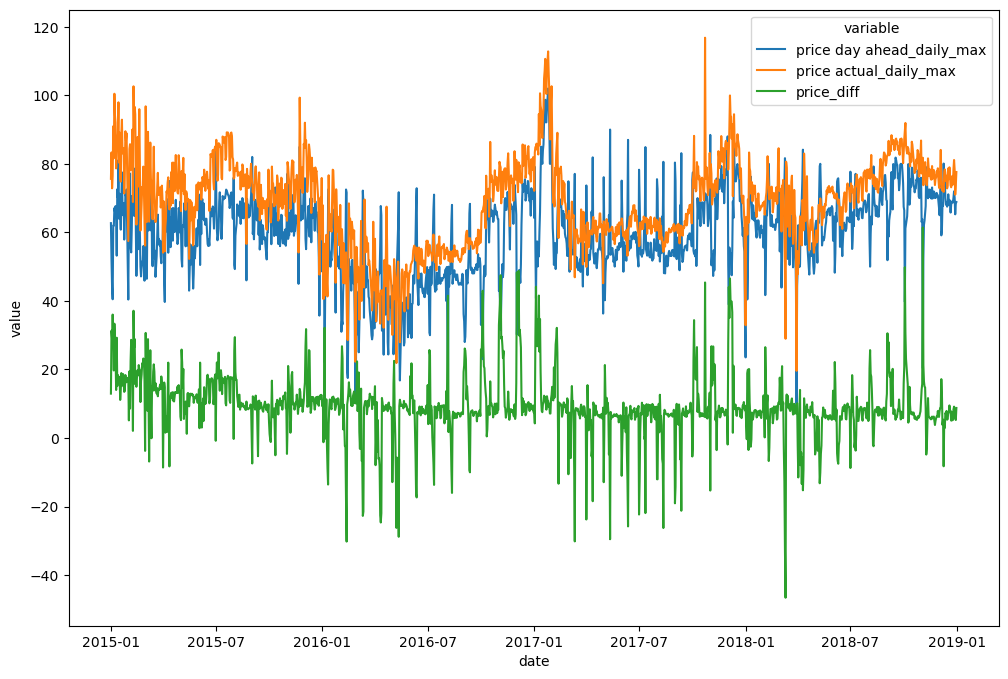

In [127]:
# solar
df_solar = eng_grouped_max[['forecast solar day ahead_daily_max', 'generation solar_daily_max']]
df_solar.reset_index(inplace=True)
df_solar.head()
df_melt = pd.melt(df_price, id_vars=['date'])
df_melt
fig, ax = plt.subplots(figsize = (12, 8))
sns.lineplot(df_melt, x='date', y='value', hue='variable')
#plt.setp(ax.lines, alpha=.6)

plt.savefig('images/pricedayahead_priceactual_diff.png')